In [4]:
import pandas as pd
import numpy as np

import ruptures as rpt
from ruptures.metrics import precision_recall
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

import lightgbm as lgb
import seaborn as sns

In [5]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

In [6]:
import holidays

In [7]:
df = pd.read_csv('/Users/estyle-150/github/my_signage/data/processed/processed20240826.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df

,y,client,close,price_am,price_pm,is_train,price,year,month,weekday,...,price_am_lag_7,price_am_lag_365,price_pm_lag_1,price_pm_lag_7,price_pm_lag_365,price_am_moving_avg_7,price_am_moving_avg_30,price_pm_moving_avg_7,price_pm_moving_avg_30,day
datetime,,,,,,,,,,,,,,,,,,,,,
2010-07-01,17,0,0,0.192308,0.076923,1,0.134615,2010,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2010-07-02,18,0,0,0.692308,0.423077,1,0.557692,2010,7,4,...,NaN,NaN,0.076923,NaN,NaN,NaN,NaN,NaN,NaN,2
2010-07-03,20,0,0,1.807692,1.192308,1,1.500000,2010,7,5,...,NaN,NaN,0.423077,NaN,NaN,NaN,NaN,NaN,NaN,3
2010-07-04,20,0,0,1.407407,0.925926,1,1.166667,2010,7,6,...,NaN,NaN,1.192308,NaN,NaN,NaN,NaN,NaN,NaN,4
2010-07-05,14,0,0,0.346154,0.192308,1,0.269231,2010,7,0,...,NaN,NaN,0.925926,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,0,0,0,5.000000,4.000000,0,4.500000,2017,3,0,...,3.0,5.0,4.000000,4.0,4.0,3.857143,2.166667,4.000000,2.166667,27
2017-03-28,0,0,0,4.000000,4.000000,0,4.000000,2017,3,1,...,4.0,4.0,4.000000,4.0,4.0,3.857143,2.233333,4.000000,2.233333,28
2017-03-29,0,0,0,3.000000,3.000000,0,3.000000,2017,3,2,...,2.0,4.0,4.000000,4.0,4.0,4.000000,2.266667,3.857143,2.266667,29


In [8]:
pd.DataFrame(df.columns)

,0
0,y
1,client
2,close
3,price_am
4,price_pm
5,is_train
6,price
7,year
8,month
9,weekday


In [9]:
# 使用するカラム
list_no = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
use_list = [df.columns[i] for i in list_no]

In [10]:
################
### 変化点検知 ###
################

# コスト関数の設定
#model = "l2"
# アルゴの設定と学習
#algo = rpt.Dynp(model=model).fit(df[['y']])
# 変化点の検出
#my_bkps = algo.predict(n_bkps=3)
# 結果のプロット
#rpt.show.display(df[['y']], my_bkps, figsize=(12, 9))
#plt.show()
# 検出された変化点
#print(my_bkps)


In [11]:
#df = df[my_bkps[0]:]
df = df[use_list]

In [12]:
train_data = df[df['is_train']==1].copy()
test_data = df[df['is_train']==0].copy()

train_data.drop(['is_train'], axis=1, inplace=True)
test_data.drop(['y', 'is_train'], axis=1, inplace=True)

In [13]:
# 開店日のみのデータ作成
train_open = train_data[train_data['close']==0].drop(['close'], axis=1, inplace=False)

In [14]:
test_open = test_data.drop(['close'],axis=1, inplace=False)

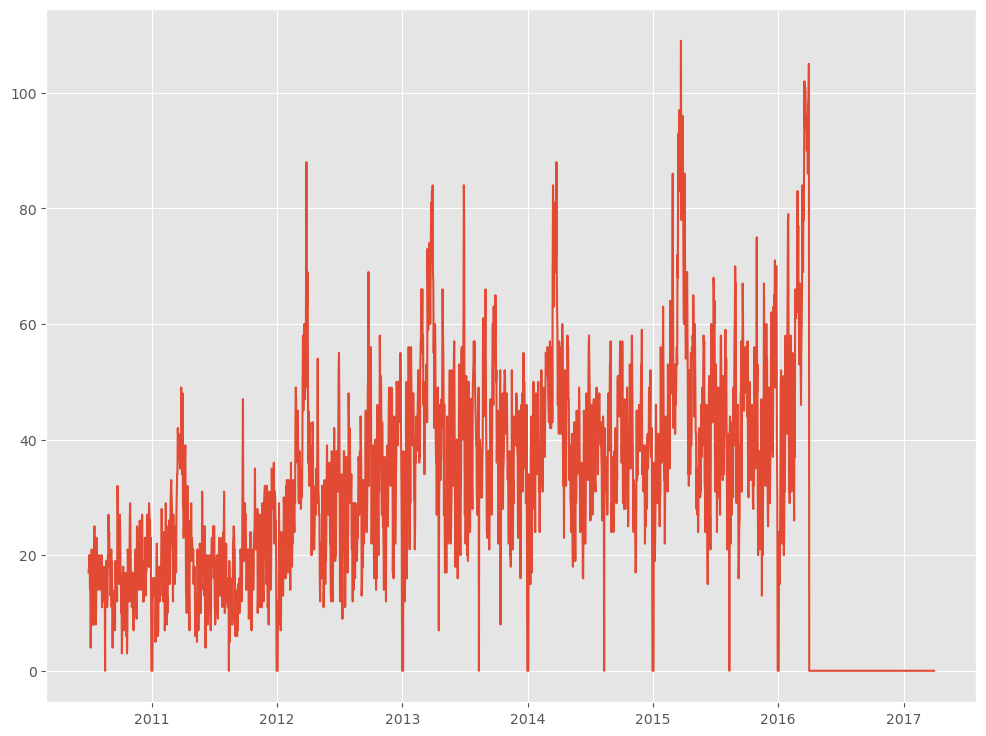

In [15]:
plt.plot(df['y'])

In [16]:
from sklearn.model_selection import KFold
import optuna.integration.lightgbm as lgb_op
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

[LightGBM] [Warning] Unknown parameter: veerbosity
[LightGBM] [Warning] Unknown parameter: veerbosity
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 1709, number of used features: 8
[LightGBM] [Warning] Unknown parameter: veerbosity
[LightGBM] [Info] Start training from score 31.836161
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[78]	valid_0's l2: 97.4573


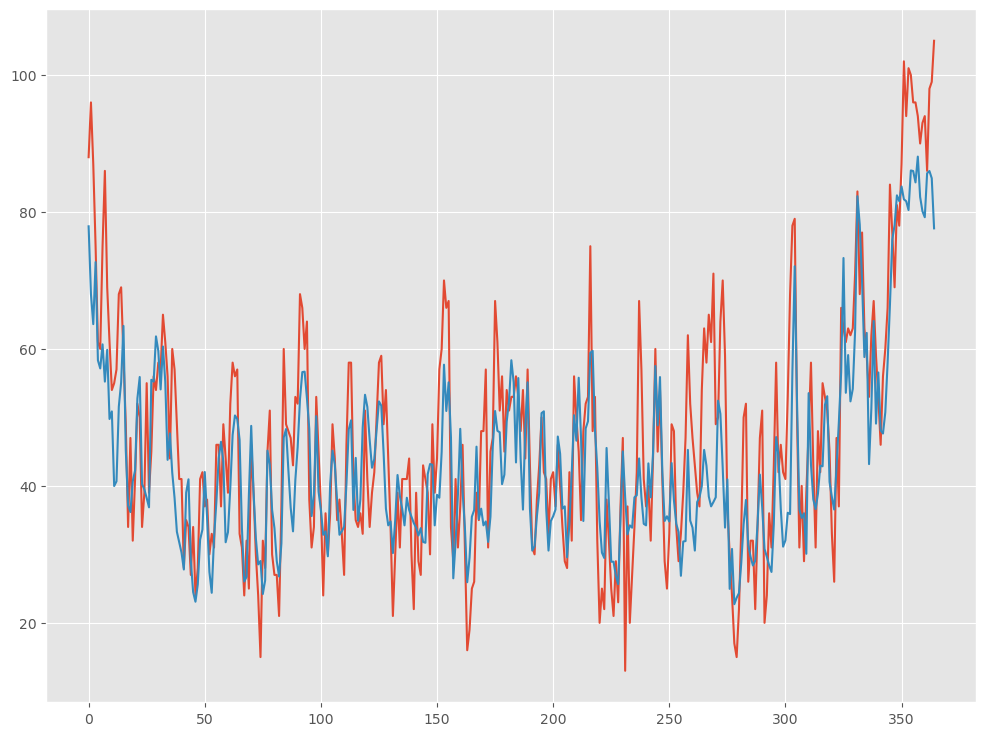

In [17]:
# 訓練データと検証データに分ける

TRAIN_DATA = train_open
N = 365

train = TRAIN_DATA 

X_train = train.drop(['y'], axis=1)[:-N]
y_train = train['y'][:-N]

X_valid_open = train_data.drop(['y'], axis=1)[-N:]
X_valid = train.drop(['y'], axis=1)[-N:]
y_valid = train['y'][-N:]

lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid)

params = {'objective' : 'regression',
          'metrics' : 'mse',
          'num_leaves' : 7,
          'early_stopping_rounds' : 30,
          'veerbosity' : -1}

model = lgb.train(params, lgb_train, valid_sets=lgb_valid)

valid_pred = model.predict(X_valid)

pred_df = pd.concat([y_valid.reset_index(drop=True), pd.Series(valid_pred)], axis=1)
pred_df.columns = ['true', 'pred']
    
plt.plot(pred_df)

In [18]:
mse = mean_squared_error(y_valid, valid_pred)
print('MSE:',round(mse,3))

MSE: 97.457


([<matplotlib.axis.XTick at 0x13ff1ec90>,
 [Text(0, 0, 'y_lag_365'),
  Text(1, 0, 'year'),
  Text(2, 0, 'price_am'),
  Text(3, 0, 'price'),
  Text(4, 0, 'month'),
  Text(5, 0, 'weekday'),
  Text(6, 0, 'price_pm'),
  Text(7, 0, 'client')])

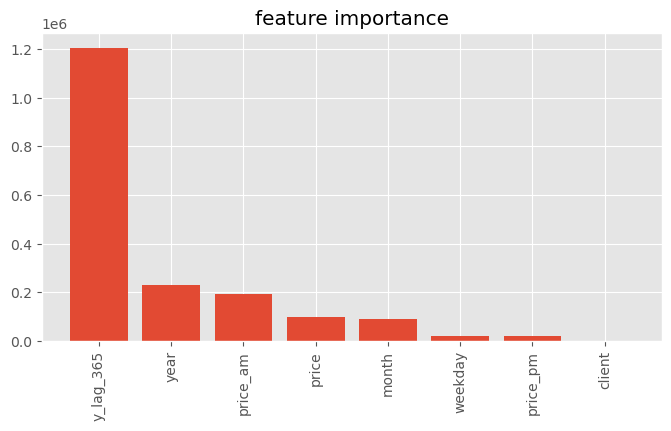

In [19]:
importances = model.feature_importance(importance_type='gain')
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,4))
plt.title('feature importance')
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X_train.columns[indices], rotation=90)

In [20]:
# oputunaによるハイパーパラメータのチューニング
import optuna

In [21]:
x_tr = X_train
x_va = X_valid
y_tr = y_train
y_va = y_valid

In [22]:
# 固定値のハイパーパラメータ
params_base = {
    'objective' : 'mse',
    'metrics' : 'mse',
    'random_seed' : 123,    
    'learnig_rate' : 0.05,  # １回のブースティングで加算する重みの比率
    'min_data_in_bin' : 3,  # ヒストグラムの１つのbinに含まれる最小のレコード数
    'bagging_freq' : 0,
    'verbose' : -1,
}


# ハイパーパラメータの探索範囲
def objective(trial):
    params_turning = {
        'num_leaves' : trial.suggest_int('num_leaves', 50, 200),
        'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 2, 30),
        'max_bins' : trial.suggest_int('max_bin', 200, 400),
        'bagging_fraction' : trial.suggest_float('bagging_fraction', 0.8, 0.95),
        'feature_fraction' : trial.suggest_float('eature_fraction', 0.35, 0.65),
        'min_gain_to_split' : trial.suggest_float('min_gain_to_split', 0.01, 1, log=True),
        'lambda_11' : trial.suggest_float('lambda_11', 0.01, 1, log=True),
        'lambda_12' : trial.suggest_float('lambda_12', 0.01, 1, log=True),
    }
    
    # 探索用ハイパーパラメータの設定
    params_turning.update(params_base)
    lgb_train = lgb.Dataset(x_tr, y_tr)
    lgb_eval = lgb.Dataset(x_va, y_va)

    #探索用ハイパーパラメータで学習
    model = lgb.train(params_turning,
                      lgb_train,
                      num_boost_round=10000,
                      valid_sets=[lgb_train, lgb_eval],
                      valid_names=['train', 'valid'],
                      callbacks=[lgb.early_stopping(100),
                                 lgb.log_evaluation(500)])
    y_va_pred = model.predict(x_va,
                              num_iteration=model.best_iteration)
    score = mean_absolute_error(y_va, y_va_pred)
    print('')
    return score

In [23]:
# ハイパーパラメータの最適化の実行
study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=0), direction='minimize')
study.optimize(objective, n_trials=1000)

[I 2024-09-09 14:56:28,649] A new study created in memory with name: no-name-b82a6d4c-002a-4378-847c-3b5a3daa0be0
[I 2024-09-09 14:56:28,762] Trial 0 finished with value: 8.075713880063466 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 22, 'max_bin': 321, 'bagging_fraction': 0.8817324774495345, 'eature_fraction': 0.47709643980167143, 'min_gain_to_split': 0.19578897201212997, 'lambda_11': 0.07501954443620121, 'lambda_12': 0.6074996073425692}. Best is trial 0 with value: 8.075713880063466.
[I 2024-09-09 14:56:28,850] Trial 1 finished with value: 7.97556468243419 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 13, 'max_bin': 359, 'bagging_fraction': 0.8793342379629356, 'eature_fraction': 0.5204133683281797, 'min_gain_to_split': 0.70989362574059, 'lambda_11': 0.013869861245357327, 'lambda_12': 0.014936835544198456}. Best is trial 1 with value: 7.97556468243419.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	train's l2: 31.4244	valid's l2: 102.602

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	train's l2: 29.8341	valid's l2: 101.665

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:28,941] Trial 2 finished with value: 8.038086922940089 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 26, 'max_bin': 356, 'bagging_fraction': 0.9305018222370228, 'eature_fraction': 0.6435855026698292, 'min_gain_to_split': 0.3965675081771009, 'lambda_11': 0.08374496868436809, 'lambda_12': 0.36396393567863894}. Best is trial 1 with value: 7.97556468243419.
[I 2024-09-09 14:56:29,040] Trial 3 finished with value: 8.146464211536177 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 20, 'max_bin': 228, 'bagging_fraction': 0.9417003375574375, 'eature_fraction': 0.5065544965250215, 'min_gain_to_split': 0.06750312521595925, 'lambda_11': 0.0338151426782029, 'lambda_12': 0.35356346291488117}. Best is trial 1 with value: 7.97556468243419.
[I 2024-09-09 14:56:29,121] Trial 4 finished with value: 8.050797804045198 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 18, 'max_bin': 203, 'bagging_fraction': 0.8926453245613816, 'eature_fraction': 0.5336287168167264, 

Early stopping, best iteration is:
[62]	train's l2: 32.5166	valid's l2: 103.896

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	train's l2: 30.4271	valid's l2: 102.431

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	train's l2: 31.5569	valid's l2: 102.025

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:29,227] Trial 5 finished with value: 8.06815163879103 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 14, 'max_bin': 340, 'bagging_fraction': 0.8090338207443906, 'eature_fraction': 0.5500300146337003, 'min_gain_to_split': 0.21941976179005757, 'lambda_11': 0.02634905974115613, 'lambda_12': 0.018107254066631072}. Best is trial 1 with value: 7.97556468243419.
[I 2024-09-09 14:56:29,340] Trial 6 finished with value: 7.929503520976221 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 12, 'max_bin': 314, 'bagging_fraction': 0.865790227019348, 'eature_fraction': 0.6465121514177679, 'min_gain_to_split': 0.015998881492631498, 'lambda_11': 0.02616697456085447, 'lambda_12': 0.021019338091154416}. Best is trial 6 with value: 7.929503520976221.


Early stopping, best iteration is:
[59]	train's l2: 29.7253	valid's l2: 102.681

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.8893	valid's l2: 100.191

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:29,468] Trial 7 finished with value: 7.9193648927574944 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 9, 'max_bin': 293, 'bagging_fraction': 0.8366638388002404, 'eature_fraction': 0.3976908750936559, 'min_gain_to_split': 0.016624564693643644, 'lambda_11': 0.2054277828628595, 'lambda_12': 0.018895826938026012}. Best is trial 7 with value: 7.9193648927574944.
[I 2024-09-09 14:56:29,572] Trial 8 finished with value: 7.900214887129504 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 12, 'max_bin': 365, 'bagging_fraction': 0.8145651913689592, 'eature_fraction': 0.6013834722496412, 'min_gain_to_split': 0.015566709318481201, 'lambda_11': 0.8972612866432508, 'lambda_12': 0.08655704137361815}. Best is trial 8 with value: 7.900214887129504.
[I 2024-09-09 14:56:29,663] Trial 9 finished with value: 8.007525318894231 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 19, 'max_bin': 348, 'bagging_fraction': 0.8058781688381481, 'eature_fraction': 0.43484208877

Early stopping, best iteration is:
[52]	train's l2: 28.5079	valid's l2: 98.8997

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.2425	valid's l2: 99.995

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	train's l2: 31.456	valid's l2: 101.627



[I 2024-09-09 14:56:29,786] Trial 10 finished with value: 8.255198593760632 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 3, 'max_bin': 391, 'bagging_fraction': 0.8357161822219233, 'eature_fraction': 0.5842248758067577, 'min_gain_to_split': 0.05360980835049379, 'lambda_11': 0.5572928896695891, 'lambda_12': 0.06472055193755138}. Best is trial 8 with value: 7.900214887129504.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 19.1458	valid's l2: 107.207

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:29,986] Trial 11 finished with value: 7.867038218723844 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 7, 'max_bin': 271, 'bagging_fraction': 0.8400604334849749, 'eature_fraction': 0.3702931711227331, 'min_gain_to_split': 0.032062265878001546, 'lambda_11': 0.3016537048744994, 'lambda_12': 0.05907326681175834}. Best is trial 11 with value: 7.867038218723844.


Early stopping, best iteration is:
[58]	train's l2: 25.394	valid's l2: 98.1289

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:30,216] Trial 12 finished with value: 8.045653404809032 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 5, 'max_bin': 268, 'bagging_fraction': 0.8382611573184544, 'eature_fraction': 0.3521869944744055, 'min_gain_to_split': 0.033800084385923475, 'lambda_11': 0.31211954149297433, 'lambda_12': 0.06547706532104232}. Best is trial 11 with value: 7.867038218723844.


Early stopping, best iteration is:
[51]	train's l2: 22.909	valid's l2: 103.598

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:30,456] Trial 13 finished with value: 8.021369733664516 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 7, 'max_bin': 265, 'bagging_fraction': 0.8564231977681228, 'eature_fraction': 0.5886828660487489, 'min_gain_to_split': 0.0364503204952722, 'lambda_11': 0.2633516485762686, 'lambda_12': 0.11671665964764748}. Best is trial 11 with value: 7.867038218723844.
[I 2024-09-09 14:56:30,611] Trial 14 finished with value: 7.905403705749295 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 11, 'max_bin': 395, 'bagging_fraction': 0.8192093791790404, 'eature_fraction': 0.4136261246624405, 'min_gain_to_split': 0.0105836180641712, 'lambda_11': 0.8971456385673019, 'lambda_12': 0.04523402150462411}. Best is trial 11 with value: 7.867038218723844.


Early stopping, best iteration is:
[36]	train's l2: 22.4871	valid's l2: 102.052

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l2: 30.4112	valid's l2: 98.4471

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:30,894] Trial 15 finished with value: 8.540831965203026 and parameters: {'num_leaves': 174, 'min_data_in_leaf': 2, 'max_bin': 279, 'bagging_fraction': 0.909858095848757, 'eature_fraction': 0.45563569045224656, 'min_gain_to_split': 0.03635597663833884, 'lambda_11': 0.44881662936629313, 'lambda_12': 0.14573577212625521}. Best is trial 11 with value: 7.867038218723844.
[I 2024-09-09 14:56:31,018] Trial 16 finished with value: 7.869750282925303 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 8, 'max_bin': 239, 'bagging_fraction': 0.8511461130794798, 'eature_fraction': 0.371478566739736, 'min_gain_to_split': 0.09882042395684293, 'lambda_11': 0.13484081892961958, 'lambda_12': 0.03616006467893494}. Best is trial 11 with value: 7.867038218723844.


Early stopping, best iteration is:
[38]	train's l2: 19.2028	valid's l2: 112.158

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 28.5309	valid's l2: 98.1327

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:31,172] Trial 17 finished with value: 7.8605729343393715 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 7, 'max_bin': 240, 'bagging_fraction': 0.8505362690076109, 'eature_fraction': 0.3509222810944048, 'min_gain_to_split': 0.10383329406625993, 'lambda_11': 0.14859223260293633, 'lambda_12': 0.03471286997513019}. Best is trial 17 with value: 7.8605729343393715.
[I 2024-09-09 14:56:31,279] Trial 18 finished with value: 8.001719236528077 and parameters: {'num_leaves': 151, 'min_data_in_leaf': 29, 'max_bin': 242, 'bagging_fraction': 0.8998789571116395, 'eature_fraction': 0.3872447026594887, 'min_gain_to_split': 0.10535752232713108, 'lambda_11': 0.13886363379611885, 'lambda_12': 0.01024389781171324}. Best is trial 17 with value: 7.8605729343393715.


Early stopping, best iteration is:
[52]	train's l2: 26.1703	valid's l2: 98.4504

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	train's l2: 35.156	valid's l2: 101.336

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:31,490] Trial 19 finished with value: 8.077466629281684 and parameters: {'num_leaves': 177, 'min_data_in_leaf': 5, 'max_bin': 202, 'bagging_fraction': 0.8501974406610715, 'eature_fraction': 0.3505934005618106, 'min_gain_to_split': 0.0827546816060195, 'lambda_11': 0.06258309444415151, 'lambda_12': 0.03454796848614663}. Best is trial 17 with value: 7.8605729343393715.
[I 2024-09-09 14:56:31,612] Trial 20 finished with value: 8.055964397828438 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 254, 'bagging_fraction': 0.8227430705903036, 'eature_fraction': 0.4275332678852896, 'min_gain_to_split': 0.3162672194091347, 'lambda_11': 0.16766608498682914, 'lambda_12': 0.03028802689121551}. Best is trial 17 with value: 7.8605729343393715.


Early stopping, best iteration is:
[51]	train's l2: 23.0106	valid's l2: 104.632

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	train's l2: 30.0898	valid's l2: 102.961

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:31,773] Trial 21 finished with value: 7.912830578818157 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 9, 'max_bin': 227, 'bagging_fraction': 0.8591855507060284, 'eature_fraction': 0.37702040417911575, 'min_gain_to_split': 0.1046748936467444, 'lambda_11': 0.11726159573535465, 'lambda_12': 0.04304452077845166}. Best is trial 17 with value: 7.8605729343393715.
[I 2024-09-09 14:56:31,872] Trial 22 finished with value: 7.853727720119096 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 8, 'max_bin': 237, 'bagging_fraction': 0.8478773596858082, 'eature_fraction': 0.3779504155870464, 'min_gain_to_split': 0.14410216981561924, 'lambda_11': 0.3887655776576607, 'lambda_12': 0.06225441724184518}. Best is trial 22 with value: 7.853727720119096.


Early stopping, best iteration is:
[52]	train's l2: 28.7703	valid's l2: 98.533

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 30.9424	valid's l2: 96.9395

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:32,027] Trial 23 finished with value: 8.0147784365167 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 5, 'max_bin': 286, 'bagging_fraction': 0.8295675393200439, 'eature_fraction': 0.4060465146924332, 'min_gain_to_split': 0.14849273907535357, 'lambda_11': 0.3935039310675757, 'lambda_12': 0.06280634344598703}. Best is trial 22 with value: 7.853727720119096.
[I 2024-09-09 14:56:32,203] Trial 24 finished with value: 8.13157785088919 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 7, 'max_bin': 220, 'bagging_fraction': 0.8438641294565877, 'eature_fraction': 0.45992916753297375, 'min_gain_to_split': 0.05319864534847035, 'lambda_11': 0.24315409800905696, 'lambda_12': 0.16652673222831504}. Best is trial 22 with value: 7.853727720119096.


Early stopping, best iteration is:
[54]	train's l2: 24.7411	valid's l2: 102.17

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l2: 26.7225	valid's l2: 102.878

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:32,360] Trial 25 finished with value: 7.9718353281333405 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 10, 'max_bin': 250, 'bagging_fraction': 0.8693021587873428, 'eature_fraction': 0.3699899084323995, 'min_gain_to_split': 0.31575027018599633, 'lambda_11': 0.5761609381748946, 'lambda_12': 0.08988456421335242}. Best is trial 22 with value: 7.853727720119096.
[I 2024-09-09 14:56:32,510] Trial 26 finished with value: 7.995164204346739 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.828413622506829, 'eature_fraction': 0.3519353265916288, 'min_gain_to_split': 0.1394414951381835, 'lambda_11': 0.3644548649160263, 'lambda_12': 0.05428746773945822}. Best is trial 22 with value: 7.853727720119096.


Early stopping, best iteration is:
[57]	train's l2: 29.0738	valid's l2: 99.3802

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	train's l2: 29.3315	valid's l2: 102.233

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:32,703] Trial 27 finished with value: 8.162148795853422 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 4, 'max_bin': 267, 'bagging_fraction': 0.8627046673467081, 'eature_fraction': 0.42906779190544825, 'min_gain_to_split': 0.02828911720606478, 'lambda_11': 0.2054323539133988, 'lambda_12': 0.09264291203385663}. Best is trial 22 with value: 7.853727720119096.
[I 2024-09-09 14:56:32,807] Trial 28 finished with value: 7.901860565699243 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 7, 'max_bin': 215, 'bagging_fraction': 0.8447096187373708, 'eature_fraction': 0.39123180066527025, 'min_gain_to_split': 0.9557420908649134, 'lambda_11': 0.5773731283345542, 'lambda_12': 0.02660687850437875}. Best is trial 22 with value: 7.853727720119096.


Early stopping, best iteration is:
[49]	train's l2: 23.6362	valid's l2: 106.071

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 31.2378	valid's l2: 98.8189

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:32,930] Trial 29 finished with value: 8.149002537892677 and parameters: {'num_leaves': 155, 'min_data_in_leaf': 24, 'max_bin': 239, 'bagging_fraction': 0.8863128765829076, 'eature_fraction': 0.47447273988302097, 'min_gain_to_split': 0.23952360957411128, 'lambda_11': 0.057037782525956, 'lambda_12': 0.19623996580391037}. Best is trial 22 with value: 7.853727720119096.


Early stopping, best iteration is:
[97]	train's l2: 31.5469	valid's l2: 104.851

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:33,145] Trial 30 finished with value: 8.366054561798611 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 2, 'max_bin': 326, 'bagging_fraction': 0.8005224018381539, 'eature_fraction': 0.41359997108345303, 'min_gain_to_split': 0.053543209374799026, 'lambda_11': 0.10040625570342875, 'lambda_12': 0.12489672054970362}. Best is trial 22 with value: 7.853727720119096.
[I 2024-09-09 14:56:33,299] Trial 31 finished with value: 7.884539031931236 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 8, 'max_bin': 238, 'bagging_fraction': 0.852866308907654, 'eature_fraction': 0.37415223922662766, 'min_gain_to_split': 0.12244942428051867, 'lambda_11': 0.1583329134577814, 'lambda_12': 0.03687488781216018}. Best is trial 22 with value: 7.853727720119096.


Early stopping, best iteration is:
[51]	train's l2: 20.3596	valid's l2: 110.97

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 29.889	valid's l2: 98.1395

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:33,421] Trial 32 finished with value: 7.8922432112253516 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 6, 'max_bin': 256, 'bagging_fraction': 0.8726414826951138, 'eature_fraction': 0.3652057894608498, 'min_gain_to_split': 0.07499075335460764, 'lambda_11': 0.28571141888033785, 'lambda_12': 0.02849505946400259}. Best is trial 22 with value: 7.853727720119096.
[I 2024-09-09 14:56:33,553] Trial 33 finished with value: 7.909819507152649 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 10, 'max_bin': 277, 'bagging_fraction': 0.8478864800212428, 'eature_fraction': 0.3844963772732779, 'min_gain_to_split': 0.19388373314342827, 'lambda_11': 0.1160009975590676, 'lambda_12': 0.048609249174166064}. Best is trial 22 with value: 7.853727720119096.


Early stopping, best iteration is:
[54]	train's l2: 28.519	valid's l2: 99.3419

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 29.4941	valid's l2: 98.8154

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:33,656] Trial 34 finished with value: 7.959430931725534 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 13, 'max_bin': 231, 'bagging_fraction': 0.877941568573159, 'eature_fraction': 0.36318027450265283, 'min_gain_to_split': 0.47064938884114627, 'lambda_11': 0.08369737198894253, 'lambda_12': 0.012925117728552716}. Best is trial 22 with value: 7.853727720119096.
[I 2024-09-09 14:56:33,777] Trial 35 finished with value: 8.045926224188504 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 8, 'max_bin': 215, 'bagging_fraction': 0.8283227363138924, 'eature_fraction': 0.44524857433129916, 'min_gain_to_split': 0.08519313072302702, 'lambda_11': 0.19992140996165245, 'lambda_12': 0.6480358601192391}. Best is trial 22 with value: 7.853727720119096.


Early stopping, best iteration is:
[58]	train's l2: 32.5101	valid's l2: 102.104

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 28.2592	valid's l2: 100.914

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:33,883] Trial 36 finished with value: 7.991699095219689 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 17, 'max_bin': 248, 'bagging_fraction': 0.8392437731569596, 'eature_fraction': 0.49222625645241275, 'min_gain_to_split': 0.023109328297940126, 'lambda_11': 0.13582829014808312, 'lambda_12': 0.023659369082813318}. Best is trial 22 with value: 7.853727720119096.
[I 2024-09-09 14:56:34,014] Trial 37 finished with value: 7.89419731840611 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 11, 'max_bin': 259, 'bagging_fraction': 0.8578507686404245, 'eature_fraction': 0.4054241193198187, 'min_gain_to_split': 0.05875464644839682, 'lambda_11': 0.47232850813842436, 'lambda_12': 0.36299139803687386}. Best is trial 22 with value: 7.853727720119096.


Early stopping, best iteration is:
[53]	train's l2: 32.5147	valid's l2: 101.471

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l2: 30.2829	valid's l2: 98.6791

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:34,122] Trial 38 finished with value: 8.013087519212217 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 21, 'max_bin': 300, 'bagging_fraction': 0.8872469217269839, 'eature_fraction': 0.38382324671148466, 'min_gain_to_split': 0.26201176834857803, 'lambda_11': 0.01739180481071622, 'lambda_12': 0.07209335947716182}. Best is trial 22 with value: 7.853727720119096.
[I 2024-09-09 14:56:34,222] Trial 39 finished with value: 8.104747305370616 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 232, 'bagging_fraction': 0.8684135924078247, 'eature_fraction': 0.5403606181781992, 'min_gain_to_split': 0.45044583716347286, 'lambda_11': 0.3282623891284856, 'lambda_12': 0.03512318950845194}. Best is trial 22 with value: 7.853727720119096.


Early stopping, best iteration is:
[92]	train's l2: 32.3583	valid's l2: 101.524

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	train's l2: 29.7757	valid's l2: 104.068

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:34,343] Trial 40 finished with value: 8.130712967616473 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 4, 'max_bin': 210, 'bagging_fraction': 0.8508698113645897, 'eature_fraction': 0.42054786797535937, 'min_gain_to_split': 0.15549612941782565, 'lambda_11': 0.06714512580370882, 'lambda_12': 0.2531233362355415}. Best is trial 22 with value: 7.853727720119096.
[I 2024-09-09 14:56:34,449] Trial 41 finished with value: 7.847151828611839 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 8, 'max_bin': 235, 'bagging_fraction': 0.8552825250301981, 'eature_fraction': 0.3713313457490793, 'min_gain_to_split': 0.12681029265654137, 'lambda_11': 0.1523369485022828, 'lambda_12': 0.04122523283991384}. Best is trial 41 with value: 7.847151828611839.


Early stopping, best iteration is:
[51]	train's l2: 28.1734	valid's l2: 105.251

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 29.5516	valid's l2: 97.2966

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:34,562] Trial 42 finished with value: 7.936068547695676 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 9, 'max_bin': 225, 'bagging_fraction': 0.8632994077786115, 'eature_fraction': 0.365761200809335, 'min_gain_to_split': 0.12130746965262156, 'lambda_11': 0.18370531477235028, 'lambda_12': 0.04114804783945073}. Best is trial 41 with value: 7.847151828611839.
[I 2024-09-09 14:56:34,704] Trial 43 finished with value: 7.9526186962094645 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 6, 'max_bin': 244, 'bagging_fraction': 0.8426128659849068, 'eature_fraction': 0.39752723294199405, 'min_gain_to_split': 0.04388003775224661, 'lambda_11': 0.24614753158811442, 'lambda_12': 0.05323698973281433}. Best is trial 41 with value: 7.847151828611839.


Early stopping, best iteration is:
[51]	train's l2: 29.9362	valid's l2: 99.4798

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 26.3956	valid's l2: 100.388

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:34,813] Trial 44 finished with value: 7.884090124127883 and parameters: {'num_leaves': 51, 'min_data_in_leaf': 12, 'max_bin': 276, 'bagging_fraction': 0.8325382834435757, 'eature_fraction': 0.3667402499844962, 'min_gain_to_split': 0.1710196746470158, 'lambda_11': 0.04902626385502241, 'lambda_12': 0.07780119683175027}. Best is trial 41 with value: 7.847151828611839.
[I 2024-09-09 14:56:34,968] Trial 45 finished with value: 7.92723778274002 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 236, 'bagging_fraction': 0.9242967248111742, 'eature_fraction': 0.39044062301698046, 'min_gain_to_split': 0.08739594125174394, 'lambda_11': 0.09754296888477436, 'lambda_12': 0.958077028791698}. Best is trial 41 with value: 7.847151828611839.


Early stopping, best iteration is:
[54]	train's l2: 32.3736	valid's l2: 98.2261

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 29.782	valid's l2: 98.3259

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:35,190] Trial 46 finished with value: 8.183615970172886 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 10, 'max_bin': 209, 'bagging_fraction': 0.8208199244900745, 'eature_fraction': 0.5148342628116283, 'min_gain_to_split': 0.06357718316695667, 'lambda_11': 0.725551074994126, 'lambda_12': 0.1083718707497855}. Best is trial 41 with value: 7.847151828611839.


Early stopping, best iteration is:
[71]	train's l2: 24.7519	valid's l2: 105.567

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:35,431] Trial 47 finished with value: 8.135464425978036 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 4, 'max_bin': 263, 'bagging_fraction': 0.8554858507139851, 'eature_fraction': 0.35285306114797077, 'min_gain_to_split': 0.1983984411654842, 'lambda_11': 0.14469776370651352, 'lambda_12': 0.018683670100396944}. Best is trial 41 with value: 7.847151828611839.
[I 2024-09-09 14:56:35,570] Trial 48 finished with value: 7.920282025880955 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 6, 'max_bin': 288, 'bagging_fraction': 0.8757321498692022, 'eature_fraction': 0.4010607517787734, 'min_gain_to_split': 0.1178715277497852, 'lambda_11': 0.21726819084838728, 'lambda_12': 0.05727075190160493}. Best is trial 41 with value: 7.847151828611839.


Early stopping, best iteration is:
[44]	train's l2: 24.7929	valid's l2: 105.256

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l2: 27.3316	valid's l2: 100.34

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:35,847] Trial 49 finished with value: 8.43739779184043 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 3, 'max_bin': 248, 'bagging_fraction': 0.8115713737723786, 'eature_fraction': 0.5620636601279838, 'min_gain_to_split': 0.07081607982995115, 'lambda_11': 0.0840443616461951, 'lambda_12': 0.02327964187216257}. Best is trial 41 with value: 7.847151828611839.


Early stopping, best iteration is:
[35]	train's l2: 22.0379	valid's l2: 110.244

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:36,056] Trial 50 finished with value: 8.07532931347449 and parameters: {'num_leaves': 177, 'min_data_in_leaf': 11, 'max_bin': 272, 'bagging_fraction': 0.8374776628641958, 'eature_fraction': 0.43864238612019074, 'min_gain_to_split': 0.012749650196685005, 'lambda_11': 0.29987570384702245, 'lambda_12': 0.03113702794503884}. Best is trial 41 with value: 7.847151828611839.
[I 2024-09-09 14:56:36,173] Trial 51 finished with value: 7.859874394730565 and parameters: {'num_leaves': 51, 'min_data_in_leaf': 12, 'max_bin': 276, 'bagging_fraction': 0.8325158520153969, 'eature_fraction': 0.3766240940121428, 'min_gain_to_split': 0.1794640744701513, 'lambda_11': 0.049200542729958316, 'lambda_12': 0.07399978998125707}. Best is trial 41 with value: 7.847151828611839.


Early stopping, best iteration is:
[59]	train's l2: 26.7167	valid's l2: 103.628

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l2: 32.2736	valid's l2: 98.1407

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:36,295] Trial 52 finished with value: 7.977389494111572 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 9, 'max_bin': 259, 'bagging_fraction': 0.8480544833007184, 'eature_fraction': 0.38076257424378945, 'min_gain_to_split': 0.3145974656860559, 'lambda_11': 0.0469241727338056, 'lambda_12': 0.07630028213584476}. Best is trial 41 with value: 7.847151828611839.
[I 2024-09-09 14:56:36,408] Trial 53 finished with value: 7.963394368152712 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 13, 'max_bin': 294, 'bagging_fraction': 0.8256553894551397, 'eature_fraction': 0.3586195679717425, 'min_gain_to_split': 0.1819560246532178, 'lambda_11': 0.024369341327438634, 'lambda_12': 0.04576055889608062}. Best is trial 41 with value: 7.847151828611839.


Early stopping, best iteration is:
[52]	train's l2: 31.0814	valid's l2: 100.13

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 32.9928	valid's l2: 101.928

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:36,510] Trial 54 finished with value: 7.813248274186325 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 221, 'bagging_fraction': 0.8330225328813823, 'eature_fraction': 0.6331187932076927, 'min_gain_to_split': 0.10089659697982459, 'lambda_11': 0.0104542225329604, 'lambda_12': 0.03971017268790196}. Best is trial 54 with value: 7.813248274186325.
[I 2024-09-09 14:56:36,639] Trial 55 finished with value: 7.813365802356257 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 221, 'bagging_fraction': 0.8164477501344728, 'eature_fraction': 0.6219154475319294, 'min_gain_to_split': 0.14233791079541722, 'lambda_11': 0.014717941115235311, 'lambda_12': 0.0619222279782584}. Best is trial 54 with value: 7.813248274186325.


Early stopping, best iteration is:
[43]	train's l2: 27.4828	valid's l2: 98.3706

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 26.5861	valid's l2: 98.3392

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:36,747] Trial 56 finished with value: 7.97530064963827 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 6, 'max_bin': 222, 'bagging_fraction': 0.8161030454017297, 'eature_fraction': 0.6274465373236747, 'min_gain_to_split': 0.13755998018494017, 'lambda_11': 0.01216771602931744, 'lambda_12': 0.12850704145800768}. Best is trial 54 with value: 7.813248274186325.
[I 2024-09-09 14:56:36,839] Trial 57 finished with value: 7.907875113785226 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 12, 'max_bin': 206, 'bagging_fraction': 0.806995776410921, 'eature_fraction': 0.6288962265390584, 'min_gain_to_split': 0.09991012373325187, 'lambda_11': 0.015602733283819685, 'lambda_12': 0.06758666354446756}. Best is trial 54 with value: 7.813248274186325.
[I 2024-09-09 14:56:36,940] Trial 58 finished with value: 7.847780282142839 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 7, 'max_bin': 215, 'bagging_fraction': 0.8329626583485935, 'eature_fraction': 0.6082598999710

Early stopping, best iteration is:
[38]	train's l2: 28.4808	valid's l2: 101.789

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l2: 29.2929	valid's l2: 99.6981

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 25.0952	valid's l2: 99.1638



[I 2024-09-09 14:56:37,055] Trial 59 finished with value: 7.911023121047049 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 10, 'max_bin': 217, 'bagging_fraction': 0.8330902419086491, 'eature_fraction': 0.6077054214829523, 'min_gain_to_split': 0.2526888074655584, 'lambda_11': 0.011090935142143713, 'lambda_12': 0.09706476599110092}. Best is trial 54 with value: 7.813248274186325.
[I 2024-09-09 14:56:37,143] Trial 60 finished with value: 8.077848511430211 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 5, 'max_bin': 230, 'bagging_fraction': 0.8228798821786318, 'eature_fraction': 0.6338453158028202, 'min_gain_to_split': 0.22794260306359757, 'lambda_11': 0.021110938552120713, 'lambda_12': 0.0407317011173324}. Best is trial 54 with value: 7.813248274186325.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	train's l2: 21.8728	valid's l2: 100.637

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 25.7084	valid's l2: 103.874



[I 2024-09-09 14:56:37,252] Trial 61 finished with value: 7.814427752193702 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 7, 'max_bin': 200, 'bagging_fraction': 0.8167392479336677, 'eature_fraction': 0.6127399818175293, 'min_gain_to_split': 0.16407312017000425, 'lambda_11': 0.03316673422012176, 'lambda_12': 0.0547896337187706}. Best is trial 54 with value: 7.813248274186325.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 23.5285	valid's l2: 97.6133

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:37,365] Trial 62 finished with value: 7.822170538461727 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 8, 'max_bin': 203, 'bagging_fraction': 0.8151884010598246, 'eature_fraction': 0.6134348473416936, 'min_gain_to_split': 0.1616240197938148, 'lambda_11': 0.03463002212905465, 'lambda_12': 0.05101939786173281}. Best is trial 54 with value: 7.813248274186325.
[I 2024-09-09 14:56:37,527] Trial 63 finished with value: 7.88738018029714 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8016295003856536, 'eature_fraction': 0.6136809804741208, 'min_gain_to_split': 0.15611835458960807, 'lambda_11': 0.03316468276280066, 'lambda_12': 0.05270832933702093}. Best is trial 54 with value: 7.813248274186325.


Early stopping, best iteration is:
[45]	train's l2: 24.8698	valid's l2: 98.462

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.2351	valid's l2: 98.8131

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:37,701] Trial 64 finished with value: 8.16414447198794 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 3, 'max_bin': 209, 'bagging_fraction': 0.815823949317406, 'eature_fraction': 0.5874433449842626, 'min_gain_to_split': 0.12784693689297277, 'lambda_11': 0.013422217265335639, 'lambda_12': 0.060919024719470985}. Best is trial 54 with value: 7.813248274186325.
[I 2024-09-09 14:56:37,822] Trial 65 finished with value: 7.945515715223509 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 7, 'max_bin': 200, 'bagging_fraction': 0.8143042208047669, 'eature_fraction': 0.6498378532720712, 'min_gain_to_split': 0.37527585776349276, 'lambda_11': 0.016222700915759922, 'lambda_12': 0.040185161490035044}. Best is trial 54 with value: 7.813248274186325.


Early stopping, best iteration is:
[46]	train's l2: 19.1654	valid's l2: 105.667

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 24.3607	valid's l2: 100.396

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:37,979] Trial 66 finished with value: 7.9687366408887925 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 9, 'max_bin': 214, 'bagging_fraction': 0.8077176809832128, 'eature_fraction': 0.5653188552297049, 'min_gain_to_split': 0.2100052922164996, 'lambda_11': 0.03360608079686389, 'lambda_12': 0.08274112487165224}. Best is trial 54 with value: 7.813248274186325.
[I 2024-09-09 14:56:38,102] Trial 67 finished with value: 8.166256298267257 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 5, 'max_bin': 219, 'bagging_fraction': 0.823784979695418, 'eature_fraction': 0.6168446928055441, 'min_gain_to_split': 0.2796202353837823, 'lambda_11': 0.02231473197932439, 'lambda_12': 0.04860881116410942}. Best is trial 54 with value: 7.813248274186325.


Early stopping, best iteration is:
[50]	train's l2: 24.7663	valid's l2: 102.015

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 23.1638	valid's l2: 105.301

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:38,221] Trial 68 finished with value: 8.025417320685518 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 6, 'max_bin': 379, 'bagging_fraction': 0.8192218871034275, 'eature_fraction': 0.5779467247764106, 'min_gain_to_split': 0.16343741132853173, 'lambda_11': 0.010314560501713683, 'lambda_12': 0.02990391977167975}. Best is trial 54 with value: 7.813248274186325.
[I 2024-09-09 14:56:38,371] Trial 69 finished with value: 7.869241143738806 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 8, 'max_bin': 227, 'bagging_fraction': 0.8129860714026611, 'eature_fraction': 0.6409540532076897, 'min_gain_to_split': 0.09091209572054179, 'lambda_11': 0.028542893053645116, 'lambda_12': 0.06234586531649897}. Best is trial 54 with value: 7.813248274186325.


Early stopping, best iteration is:
[38]	train's l2: 27.4788	valid's l2: 102.82

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 23.6942	valid's l2: 98.8453

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:38,517] Trial 70 finished with value: 7.834896348547152 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 7, 'max_bin': 206, 'bagging_fraction': 0.8270497491228136, 'eature_fraction': 0.6001216657595506, 'min_gain_to_split': 0.1131931764422941, 'lambda_11': 0.0194945783329873, 'lambda_12': 0.023057872237782936}. Best is trial 54 with value: 7.813248274186325.
[I 2024-09-09 14:56:38,642] Trial 71 finished with value: 7.844304462695387 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 206, 'bagging_fraction': 0.8272818617398762, 'eature_fraction': 0.5972527733552646, 'min_gain_to_split': 0.11362041617769005, 'lambda_11': 0.019241762893264916, 'lambda_12': 0.01588073478071464}. Best is trial 54 with value: 7.813248274186325.


Early stopping, best iteration is:
[45]	train's l2: 24.6686	valid's l2: 98.0024

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.4698	valid's l2: 100.158

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:38,748] Trial 72 finished with value: 7.802472600073992 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 205, 'bagging_fraction': 0.8267388283309296, 'eature_fraction': 0.6011453334734669, 'min_gain_to_split': 0.11156362708985403, 'lambda_11': 0.018778965767269257, 'lambda_12': 0.015967714394169375}. Best is trial 72 with value: 7.802472600073992.
[I 2024-09-09 14:56:38,913] Trial 73 finished with value: 7.956031855099441 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 29, 'max_bin': 205, 'bagging_fraction': 0.8252172157495112, 'eature_fraction': 0.5980411592182301, 'min_gain_to_split': 0.10703108840004918, 'lambda_11': 0.017395143098871586, 'lambda_12': 0.014606965860444594}. Best is trial 72 with value: 7.802472600073992.


Early stopping, best iteration is:
[45]	train's l2: 24.4986	valid's l2: 97.8829

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[142]	train's l2: 26.3419	valid's l2: 100.084

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:39,103] Trial 74 finished with value: 8.162927912109446 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 5, 'max_bin': 210, 'bagging_fraction': 0.8038324822973306, 'eature_fraction': 0.5969208245594017, 'min_gain_to_split': 0.07704587559626185, 'lambda_11': 0.020028249435588844, 'lambda_12': 0.011413200602569498}. Best is trial 72 with value: 7.802472600073992.
[I 2024-09-09 14:56:39,263] Trial 75 finished with value: 8.177785001893453 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 4, 'max_bin': 223, 'bagging_fraction': 0.8105335353538095, 'eature_fraction': 0.6198095925381902, 'min_gain_to_split': 0.11318524975809298, 'lambda_11': 0.014164335442205734, 'lambda_12': 0.016030803707184817}. Best is trial 72 with value: 7.802472600073992.


Early stopping, best iteration is:
[41]	train's l2: 21.0582	valid's l2: 104.697

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 19.5194	valid's l2: 105.678

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:39,383] Trial 76 finished with value: 7.9394912819043535 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 9, 'max_bin': 205, 'bagging_fraction': 0.8179312907291506, 'eature_fraction': 0.5726135626987003, 'min_gain_to_split': 0.09070871050866366, 'lambda_11': 0.027514974568441524, 'lambda_12': 0.020959640918775908}. Best is trial 72 with value: 7.802472600073992.
[I 2024-09-09 14:56:39,517] Trial 77 finished with value: 7.840883202317858 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 200, 'bagging_fraction': 0.8280051199135736, 'eature_fraction': 0.6379970365070011, 'min_gain_to_split': 0.13449527114233525, 'lambda_11': 0.01867470151509414, 'lambda_12': 0.025667655062535318}. Best is trial 72 with value: 7.802472600073992.


Early stopping, best iteration is:
[44]	train's l2: 24.7578	valid's l2: 101.718

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.9482	valid's l2: 98.3335

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:39,632] Trial 78 finished with value: 7.979548748322446 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 6, 'max_bin': 200, 'bagging_fraction': 0.8290239474717156, 'eature_fraction': 0.6424987053619136, 'min_gain_to_split': 0.14027239948045747, 'lambda_11': 0.018357036471433847, 'lambda_12': 0.025184555311994632}. Best is trial 72 with value: 7.802472600073992.
[I 2024-09-09 14:56:39,745] Trial 79 finished with value: 7.766250276031877 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 211, 'bagging_fraction': 0.8207752178226481, 'eature_fraction': 0.6235623914546203, 'min_gain_to_split': 0.1020453648311953, 'lambda_11': 0.03956282494279762, 'lambda_12': 0.020948372034017938}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[38]	train's l2: 27.7096	valid's l2: 101.837

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.1424	valid's l2: 98.7622

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:39,893] Trial 80 finished with value: 7.8837942668452365 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 11, 'max_bin': 211, 'bagging_fraction': 0.8209495601249198, 'eature_fraction': 0.6246557182026629, 'min_gain_to_split': 0.044761149892257976, 'lambda_11': 0.04015891768503682, 'lambda_12': 0.019162540384001385}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:40,040] Trial 81 finished with value: 7.766250276031877 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 205, 'bagging_fraction': 0.8279275087730446, 'eature_fraction': 0.6042202186546769, 'min_gain_to_split': 0.09991223067624178, 'lambda_11': 0.024427148870976724, 'lambda_12': 0.013704956179910608}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[57]	train's l2: 25.7407	valid's l2: 101.466

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.1424	valid's l2: 98.7622

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:40,188] Trial 82 finished with value: 7.829031090014615 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 7, 'max_bin': 220, 'bagging_fraction': 0.8357308493476875, 'eature_fraction': 0.6374441038532924, 'min_gain_to_split': 0.08014287978899287, 'lambda_11': 0.02461670460601588, 'lambda_12': 0.013964036022346938}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:40,356] Trial 83 finished with value: 8.21019644879835 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 3, 'max_bin': 220, 'bagging_fraction': 0.9462343054811185, 'eature_fraction': 0.6077858158343883, 'min_gain_to_split': 0.0959031928834806, 'lambda_11': 0.030144842402293977, 'lambda_12': 0.013657162034177717}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[46]	train's l2: 24.1759	valid's l2: 97.1031

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 21.6098	valid's l2: 106.958

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:40,487] Trial 84 finished with value: 7.90845192262688 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 213, 'bagging_fraction': 0.8399475337339763, 'eature_fraction': 0.6332195648185575, 'min_gain_to_split': 0.08048118228066974, 'lambda_11': 0.04002177436232096, 'lambda_12': 0.011010625924170831}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:40,609] Trial 85 finished with value: 8.055524134061294 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 6, 'max_bin': 224, 'bagging_fraction': 0.8348498596885737, 'eature_fraction': 0.6204698079249464, 'min_gain_to_split': 0.06381836637545482, 'lambda_11': 0.02428858732764145, 'lambda_12': 0.012865539942506544}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[47]	train's l2: 25.5658	valid's l2: 101.626

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l2: 23.6213	valid's l2: 103.033

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:40,752] Trial 86 finished with value: 7.948168890559948 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 10, 'max_bin': 341, 'bagging_fraction': 0.8187060042503955, 'eature_fraction': 0.6032589663262597, 'min_gain_to_split': 0.07160891781389253, 'lambda_11': 0.013981402999957752, 'lambda_12': 0.021301991481808367}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:40,864] Trial 87 finished with value: 8.009882400489 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 5, 'max_bin': 219, 'bagging_fraction': 0.8109689114765766, 'eature_fraction': 0.5893683892806016, 'min_gain_to_split': 0.10559655631725536, 'lambda_11': 0.02363537901666977, 'lambda_12': 0.01763492857420134}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[45]	train's l2: 26.3147	valid's l2: 101.516

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.0347	valid's l2: 102.618

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:41,020] Trial 88 finished with value: 8.329106152350764 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 2, 'max_bin': 206, 'bagging_fraction': 0.8438506928912622, 'eature_fraction': 0.6116712635046303, 'min_gain_to_split': 0.0571067848480998, 'lambda_11': 0.03771510044576264, 'lambda_12': 0.010402122401120508}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:41,149] Trial 89 finished with value: 7.905122929062121 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 232, 'bagging_fraction': 0.8233060740823545, 'eature_fraction': 0.6232384049153314, 'min_gain_to_split': 0.15420069806944872, 'lambda_11': 0.012325984550562143, 'lambda_12': 0.01610049593522837}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[38]	train's l2: 22.5811	valid's l2: 109.035

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 27.8765	valid's l2: 101.013

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:41,350] Trial 90 finished with value: 8.177145906361837 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 4, 'max_bin': 212, 'bagging_fraction': 0.8047207352973347, 'eature_fraction': 0.5910857542345012, 'min_gain_to_split': 0.08533860437258994, 'lambda_11': 0.030797157535399383, 'lambda_12': 0.03199069491727226}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:41,497] Trial 91 finished with value: 7.83986643075804 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 203, 'bagging_fraction': 0.8308215141952211, 'eature_fraction': 0.6361358419852143, 'min_gain_to_split': 0.1292277019467253, 'lambda_11': 0.01564277751238649, 'lambda_12': 0.02643654722836422}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[38]	train's l2: 19.9047	valid's l2: 105.201

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 23.2765	valid's l2: 98.2046

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:41,600] Trial 92 finished with value: 7.908440494800564 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 27, 'max_bin': 205, 'bagging_fraction': 0.8305357301550541, 'eature_fraction': 0.6329449939185049, 'min_gain_to_split': 0.12342474581648284, 'lambda_11': 0.015909891678033954, 'lambda_12': 0.02097239582980956}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:41,737] Trial 93 finished with value: 7.938210653079161 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 8, 'max_bin': 218, 'bagging_fraction': 0.8367075396675667, 'eature_fraction': 0.6451152039417476, 'min_gain_to_split': 0.09900639764414171, 'lambda_11': 0.0263299284710335, 'lambda_12': 0.011714690260898409}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[66]	train's l2: 32.3982	valid's l2: 99.9176

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 24.8572	valid's l2: 101.113

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:41,847] Trial 94 finished with value: 7.965513943580698 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 6, 'max_bin': 227, 'bagging_fraction': 0.8158215688534358, 'eature_fraction': 0.6148227753041391, 'min_gain_to_split': 0.1830837881534895, 'lambda_11': 0.021173373250703086, 'lambda_12': 0.02793120339991761}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:41,937] Trial 95 finished with value: 7.88956258766293 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 9, 'max_bin': 209, 'bagging_fraction': 0.90279042412306, 'eature_fraction': 0.5774034517371123, 'min_gain_to_split': 0.1658970245807286, 'lambda_11': 0.01295691158094791, 'lambda_12': 0.01408738060501306}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[49]	train's l2: 23.1263	valid's l2: 101.182

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 26.3294	valid's l2: 101.227

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:42,089] Trial 96 finished with value: 7.9117090018197915 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8408560354466191, 'eature_fraction': 0.6282077317206701, 'min_gain_to_split': 0.11769514251259175, 'lambda_11': 0.015089803867877307, 'lambda_12': 0.02286767677815953}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:42,233] Trial 97 finished with value: 7.905122929062121 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 215, 'bagging_fraction': 0.8307143558264453, 'eature_fraction': 0.6385537242953168, 'min_gain_to_split': 0.14825770690579748, 'lambda_11': 0.022461804092989666, 'lambda_12': 0.018146916375707735}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[40]	train's l2: 26.076	valid's l2: 99.9975

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 27.8765	valid's l2: 101.013

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:42,405] Trial 98 finished with value: 7.982733028616501 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 10, 'max_bin': 326, 'bagging_fraction': 0.8208855046655258, 'eature_fraction': 0.6042421478761444, 'min_gain_to_split': 0.07948177277392961, 'lambda_11': 0.05686615053631107, 'lambda_12': 0.03329353830960853}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:42,541] Trial 99 finished with value: 7.922273009786129 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 23, 'max_bin': 221, 'bagging_fraction': 0.82491110191897, 'eature_fraction': 0.6498316142657594, 'min_gain_to_split': 0.06593043712858933, 'lambda_11': 0.03571083695730804, 'lambda_12': 0.012440421006667677}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[47]	train's l2: 25.0677	valid's l2: 102.627

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	train's l2: 28.8065	valid's l2: 100.288

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:42,683] Trial 100 finished with value: 8.037090571485352 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 6, 'max_bin': 209, 'bagging_fraction': 0.8349637325845464, 'eature_fraction': 0.6178843467795175, 'min_gain_to_split': 0.19373515331573501, 'lambda_11': 0.017021640239031768, 'lambda_12': 0.04695041371078212}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:42,847] Trial 101 finished with value: 7.850840638516645 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 19, 'max_bin': 203, 'bagging_fraction': 0.8276765580328038, 'eature_fraction': 0.637304172680684, 'min_gain_to_split': 0.14439872029593284, 'lambda_11': 0.020045315702432637, 'lambda_12': 0.025754720608938696}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[40]	train's l2: 23.4137	valid's l2: 102.852

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 29.7535	valid's l2: 99.6168

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:42,992] Trial 102 finished with value: 7.802456921507415 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 200, 'bagging_fraction': 0.813009562043406, 'eature_fraction': 0.6283790048158023, 'min_gain_to_split': 0.09769769090784516, 'lambda_11': 0.04490714800627085, 'lambda_12': 0.036761542472957424}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:43,115] Trial 103 finished with value: 7.8240720477803 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 8, 'max_bin': 214, 'bagging_fraction': 0.807808853685744, 'eature_fraction': 0.6283919977031891, 'min_gain_to_split': 0.09406197793107231, 'lambda_11': 0.03078691110041207, 'lambda_12': 0.02009245668296014}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[45]	train's l2: 24.4986	valid's l2: 97.8825

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.0637	valid's l2: 97.8098

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:43,263] Trial 104 finished with value: 7.9914276381420395 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 6, 'max_bin': 215, 'bagging_fraction': 0.8096600539875155, 'eature_fraction': 0.6269713491261903, 'min_gain_to_split': 0.09407101639692794, 'lambda_11': 0.044171083492368986, 'lambda_12': 0.03732822390326329}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:43,397] Trial 105 finished with value: 7.872743060890816 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 7, 'max_bin': 228, 'bagging_fraction': 0.8135106377982954, 'eature_fraction': 0.6102579000043991, 'min_gain_to_split': 0.10477420061327977, 'lambda_11': 0.0336484457537989, 'lambda_12': 0.01961580598255519}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[38]	train's l2: 25.8604	valid's l2: 101.094

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.5436	valid's l2: 100.057

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:43,547] Trial 106 finished with value: 8.104766809043015 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 5, 'max_bin': 211, 'bagging_fraction': 0.8075114450378327, 'eature_fraction': 0.5989460612216776, 'min_gain_to_split': 0.04949800792164973, 'lambda_11': 0.030941135618306647, 'lambda_12': 0.015720071076530038}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:43,653] Trial 107 finished with value: 7.802977456169044 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 8, 'max_bin': 223, 'bagging_fraction': 0.8007309442333017, 'eature_fraction': 0.583022638042384, 'min_gain_to_split': 0.07295289039469602, 'lambda_11': 0.04420109594752219, 'lambda_12': 0.054500289659971654}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[48]	train's l2: 21.2685	valid's l2: 103.401

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.6643	valid's l2: 98.3115

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:43,763] Trial 108 finished with value: 7.904589375810986 and parameters: {'num_leaves': 51, 'min_data_in_leaf': 8, 'max_bin': 234, 'bagging_fraction': 0.8000944446430259, 'eature_fraction': 0.5808032466887667, 'min_gain_to_split': 0.07115353201169757, 'lambda_11': 0.05443244242368706, 'lambda_12': 0.0703016606358229}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:43,854] Trial 109 finished with value: 8.05433112190897 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 11, 'max_bin': 222, 'bagging_fraction': 0.8051382624376004, 'eature_fraction': 0.5471580389601715, 'min_gain_to_split': 0.06069836099518204, 'lambda_11': 0.04356771696309421, 'lambda_12': 0.0525628919180957}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[57]	train's l2: 25.0317	valid's l2: 100.309

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 32.6188	valid's l2: 103.048

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:43,967] Trial 110 finished with value: 7.9180943293926225 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 10, 'max_bin': 242, 'bagging_fraction': 0.8034140754705504, 'eature_fraction': 0.6220766697431918, 'min_gain_to_split': 0.08245757161343054, 'lambda_11': 0.06968277782855066, 'lambda_12': 0.0451893474244257}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:44,079] Trial 111 finished with value: 7.937936236800707 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 9, 'max_bin': 208, 'bagging_fraction': 0.8165090348610987, 'eature_fraction': 0.5926208462714202, 'min_gain_to_split': 0.11042742578558117, 'lambda_11': 0.026231972159033227, 'lambda_12': 0.05162417826594084}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[46]	train's l2: 25.3572	valid's l2: 101.33

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 23.241	valid's l2: 102.179

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:44,176] Trial 112 finished with value: 7.847382734222191 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 216, 'bagging_fraction': 0.812101907768849, 'eature_fraction': 0.6043627178599433, 'min_gain_to_split': 0.09447871123840701, 'lambda_11': 0.03746545668653778, 'lambda_12': 0.057874571449054106}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:44,262] Trial 113 finished with value: 7.803986890084436 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 200, 'bagging_fraction': 0.8206744965302298, 'eature_fraction': 0.615046478265716, 'min_gain_to_split': 0.08849231744445869, 'lambda_11': 0.05228851840802841, 'lambda_12': 0.03598554751718801}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:44,357] Trial 114 finished with value: 7.955932334546296 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 6, 'max_bin': 213, 'bagging_fraction': 0.8092497823276995, 'eature_fraction': 0.63044188105

Early stopping, best iteration is:
[47]	train's l2: 25.0265	valid's l2: 99.297

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.27	valid's l2: 97.3454

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2152	valid's l2: 101.014

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:44,464] Trial 115 finished with value: 7.884143465410938 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 9, 'max_bin': 200, 'bagging_fraction': 0.8181186870985004, 'eature_fraction': 0.6154697545760448, 'min_gain_to_split': 0.08539041252982947, 'lambda_11': 0.04667816282236548, 'lambda_12': 0.08588199254814292}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:44,571] Trial 116 finished with value: 7.993912538777118 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 224, 'bagging_fraction': 0.8225129305121163, 'eature_fraction': 0.5245910479621954, 'min_gain_to_split': 0.06827400647550126, 'lambda_11': 0.0609798956165028, 'lambda_12': 0.04307087951426762}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[47]	train's l2: 26.5931	valid's l2: 101.094

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 30.3766	valid's l2: 99.0116

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:44,726] Trial 117 finished with value: 8.058712394107163 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 5, 'max_bin': 218, 'bagging_fraction': 0.81477106026335, 'eature_fraction': 0.6121480966815412, 'min_gain_to_split': 0.13362998410736698, 'lambda_11': 0.04231710007533263, 'lambda_12': 0.03510586583443854}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:44,832] Trial 118 finished with value: 8.128421052272804 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 4, 'max_bin': 203, 'bagging_fraction': 0.9330395605778317, 'eature_fraction': 0.6427628723063532, 'min_gain_to_split': 0.10111591392745538, 'lambda_11': 0.029845496840645976, 'lambda_12': 0.06651675107590302}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:44,924] Trial 119 finished with value: 7.848449153336895 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 212, 'bagging_fraction': 0.8070704886504368, 'eature_fraction': 0.6237376208

Early stopping, best iteration is:
[52]	train's l2: 16.5965	valid's l2: 103.965

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 21.547	valid's l2: 104.738

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.8699	valid's l2: 98.2222



[I 2024-09-09 14:56:45,033] Trial 120 finished with value: 7.849580893077132 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 229, 'bagging_fraction': 0.8029102742001677, 'eature_fraction': 0.6184817206670704, 'min_gain_to_split': 0.12069243762119188, 'lambda_11': 0.027871034351116562, 'lambda_12': 0.029597553177137293}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:45,131] Trial 121 finished with value: 7.834896348547152 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 7, 'max_bin': 206, 'bagging_fraction': 0.8207711771304638, 'eature_fraction': 0.5944727558628342, 'min_gain_to_split': 0.1120375398211616, 'lambda_11': 0.024152224511420267, 'lambda_12': 0.023283129189552478}. Best is trial 79 with value: 7.766250276031877.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	train's l2: 24.022	valid's l2: 98.4723

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 24.6686	valid's l2: 98.0024



[I 2024-09-09 14:56:45,246] Trial 122 finished with value: 7.927401306345618 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 6, 'max_bin': 210, 'bagging_fraction': 0.824816493668534, 'eature_fraction': 0.5854941226876137, 'min_gain_to_split': 0.0771420579177376, 'lambda_11': 0.0350670635886455, 'lambda_12': 0.021377023220501678}. Best is trial 79 with value: 7.766250276031877.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	train's l2: 25.5105	valid's l2: 100.774

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:45,359] Trial 123 finished with value: 7.880893229604978 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 7, 'max_bin': 309, 'bagging_fraction': 0.8124794717534426, 'eature_fraction': 0.6009695229989995, 'min_gain_to_split': 0.1002850728423779, 'lambda_11': 0.03169052278944982, 'lambda_12': 0.014528398401087569}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:45,452] Trial 124 finished with value: 7.820373178808511 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8177220106732743, 'eature_fraction': 0.6066342392892979, 'min_gain_to_split': 0.16230998746186776, 'lambda_11': 0.011128530248704704, 'lambda_12': 0.017546322418769432}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:45,550] Trial 125 finished with value: 7.901764756572261 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 9, 'max_bin': 360, 'bagging_fraction': 0.8207056314646626, 'eature_fraction': 0.63100871

Early stopping, best iteration is:
[47]	train's l2: 22.8907	valid's l2: 99.5282

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.6971	valid's l2: 97.3561

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	train's l2: 24.2485	valid's l2: 101.095



[I 2024-09-09 14:56:45,647] Trial 126 finished with value: 8.06134658962016 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8183727051616475, 'eature_fraction': 0.49504213125514984, 'min_gain_to_split': 0.15578242521586344, 'lambda_11': 0.010468099944614982, 'lambda_12': 0.013515601601531644}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:45,726] Trial 127 finished with value: 7.922448735519179 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 5, 'max_bin': 218, 'bagging_fraction': 0.8101890347060255, 'eature_fraction': 0.6075886311326298, 'min_gain_to_split': 0.17492002184294247, 'lambda_11': 0.01152606562543275, 'lambda_12': 0.010090792155404541}. Best is trial 79 with value: 7.766250276031877.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 30.5332	valid's l2: 100.812

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.0326	valid's l2: 100.438

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:45,819] Trial 128 finished with value: 7.853574970860705 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 207, 'bagging_fraction': 0.8149162314345331, 'eature_fraction': 0.6238922418218495, 'min_gain_to_split': 0.12922848360115222, 'lambda_11': 0.014291019329538097, 'lambda_12': 0.04847435184797148}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:45,922] Trial 129 finished with value: 7.938765472237019 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 9, 'max_bin': 200, 'bagging_fraction': 0.8064157378374596, 'eature_fraction': 0.6121067309357614, 'min_gain_to_split': 0.08794780242463313, 'lambda_11': 0.03984681454447276, 'lambda_12': 0.017157431016305798}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[46]	train's l2: 25.323	valid's l2: 99.2284

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.9936	valid's l2: 101.453

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 24.7251	valid's l2: 101.51


[I 2024-09-09 14:56:46,019] Trial 130 finished with value: 7.989843000389571 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 6, 'max_bin': 225, 'bagging_fraction': 0.817614528324779, 'eature_fraction': 0.6438678808430172, 'min_gain_to_split': 0.14200950474077248, 'lambda_11': 0.04686965391756928, 'lambda_12': 0.019898573139361553}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:46,122] Trial 131 finished with value: 7.802472600073992 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 204, 'bagging_fraction': 0.8253417932205845, 'eature_fraction': 0.6044090640251515, 'min_gain_to_split': 0.11196507406573115, 'lambda_11': 0.010187530684530646, 'lambda_12': 0.015267166583588862}. Best is trial 79 with value: 7.766250276031877.



Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 24.4986	valid's l2: 97.8829

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:46,228] Trial 132 finished with value: 7.844304462695387 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 213, 'bagging_fraction': 0.8237335232609969, 'eature_fraction': 0.6177658092086998, 'min_gain_to_split': 0.11002026110794885, 'lambda_11': 0.010366645190712839, 'lambda_12': 0.012436417352455414}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:46,332] Trial 133 finished with value: 7.9975733709712475 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 6, 'max_bin': 204, 'bagging_fraction': 0.8256428025525654, 'eature_fraction': 0.6051623928339476, 'min_gain_to_split': 0.1211257522258294, 'lambda_11': 0.012783642763803844, 'lambda_12': 0.014363087002305777}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[48]	train's l2: 24.4698	valid's l2: 100.158

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 25.578	valid's l2: 102.013

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:46,438] Trial 134 finished with value: 7.899676926539438 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 8, 'max_bin': 208, 'bagging_fraction': 0.813538063128844, 'eature_fraction': 0.6280491959555368, 'min_gain_to_split': 0.09417928347657176, 'lambda_11': 0.01161304038687425, 'lambda_12': 0.015299664417663611}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:46,526] Trial 135 finished with value: 7.8308084965903975 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 7, 'max_bin': 216, 'bagging_fraction': 0.8216155053051827, 'eature_fraction': 0.6361166893531801, 'min_gain_to_split': 0.1635142043969283, 'lambda_11': 0.027827230174449005, 'lambda_12': 0.0174030005683033}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:46,613] Trial 136 finished with value: 7.922448735519179 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 5, 'max_bin': 221, 'bagging_fraction': 0.832054687295202, 'eature_fraction': 0.57027303844

Early stopping, best iteration is:
[47]	train's l2: 24.8885	valid's l2: 100.758

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.4871	valid's l2: 98.9799

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.0326	valid's l2: 100.438

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:46,720] Trial 137 finished with value: 7.949690449110658 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 10, 'max_bin': 203, 'bagging_fraction': 0.8284298231788654, 'eature_fraction': 0.6117228065884462, 'min_gain_to_split': 0.07676998926764825, 'lambda_11': 0.01023849923336466, 'lambda_12': 0.012293658700596838}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:46,836] Trial 138 finished with value: 7.905228722814403 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 9, 'max_bin': 211, 'bagging_fraction': 0.8169943772835307, 'eature_fraction': 0.6211824261633607, 'min_gain_to_split': 0.13745759861859877, 'lambda_11': 0.02229074864358067, 'lambda_12': 0.043593859919876105}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[58]	train's l2: 25.0027	valid's l2: 101.389

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.086	valid's l2: 100.843

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:46,925] Trial 139 finished with value: 7.864440228107276 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 7, 'max_bin': 208, 'bagging_fraction': 0.8092759246392264, 'eature_fraction': 0.5927628353863201, 'min_gain_to_split': 0.5895399207729167, 'lambda_11': 0.017587186547168218, 'lambda_12': 0.4378691559575439}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:47,035] Trial 140 finished with value: 7.814525854071019 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8366176266679671, 'eature_fraction': 0.6011447206105318, 'min_gain_to_split': 0.08353079149083392, 'lambda_11': 0.07857660144006803, 'lambda_12': 0.01883077260310198}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[54]	train's l2: 21.4351	valid's l2: 98.5998

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.2428	valid's l2: 97.9092

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:47,138] Trial 141 finished with value: 8.013180700795424 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8366783025449627, 'eature_fraction': 0.47907637684472687, 'min_gain_to_split': 0.08156432117449085, 'lambda_11': 0.07432059477533572, 'lambda_12': 0.019214487038775055}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:47,252] Trial 142 finished with value: 7.9332500701731785 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 6, 'max_bin': 205, 'bagging_fraction': 0.8466832341892653, 'eature_fraction': 0.6048862740713354, 'min_gain_to_split': 0.06858154235836315, 'lambda_11': 0.11025315352513892, 'lambda_12': 0.017088533023822714}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[43]	train's l2: 30.1091	valid's l2: 100.501

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 25.6032	valid's l2: 100.736

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:47,364] Trial 143 finished with value: 7.852142016866088 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 16, 'max_bin': 213, 'bagging_fraction': 0.8344109383998232, 'eature_fraction': 0.6004391907482022, 'min_gain_to_split': 0.10139808361692423, 'lambda_11': 0.050526268559025145, 'lambda_12': 0.015285411154285763}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:47,456] Trial 144 finished with value: 7.883542821029254 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 203, 'bagging_fraction': 0.8199510746521731, 'eature_fraction': 0.5840892748042986, 'min_gain_to_split': 0.11932994986789076, 'lambda_11': 0.07979455885184931, 'lambda_12': 0.01139157671956559}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:47,560] Trial 145 finished with value: 7.791104172095807 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 209, 'bagging_fraction': 0.8385693080589981, 'eature_fraction': 0.6169127

Early stopping, best iteration is:
[59]	train's l2: 27.0067	valid's l2: 100.472

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.8182	valid's l2: 99.5385

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 24.3483	valid's l2: 97.7132



[I 2024-09-09 14:56:47,658] Trial 146 finished with value: 7.8348427184924265 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 207, 'bagging_fraction': 0.8392657781962337, 'eature_fraction': 0.6156118616533716, 'min_gain_to_split': 0.08893337188755308, 'lambda_11': 0.04171600215220644, 'lambda_12': 0.037914050293714405}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:47,748] Trial 147 finished with value: 7.864160649735853 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 200, 'bagging_fraction': 0.8296247656775941, 'eature_fraction': 0.6093357194234685, 'min_gain_to_split': 0.10068023835546112, 'lambda_11': 0.05682356378266816, 'lambda_12': 0.032236302769604125}. Best is trial 79 with value: 7.766250276031877.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.3214	valid's l2: 98.123

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 26.684	valid's l2: 100.339

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:47,866] Trial 148 finished with value: 7.9611484004328625 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 10, 'max_bin': 209, 'bagging_fraction': 0.8004786120658138, 'eature_fraction': 0.6258112241637459, 'min_gain_to_split': 0.05920428459692519, 'lambda_11': 0.06654145186389943, 'lambda_12': 0.027517066571366645}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:47,959] Trial 149 finished with value: 7.854101417984035 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 216, 'bagging_fraction': 0.824690108835603, 'eature_fraction': 0.5975883151241728, 'min_gain_to_split': 0.13008427668102662, 'lambda_11': 0.03302684188947363, 'lambda_12': 0.049980433333027895}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:48,063] Trial 150 finished with value: 7.897497111686152 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 6, 'max_bin': 205, 'bagging_fraction': 0.8130224490368874, 'eature_fraction': 0.6188336

Early stopping, best iteration is:
[56]	train's l2: 23.7874	valid's l2: 101.597

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.5552	valid's l2: 98.0197

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 23.5494	valid's l2: 98.7366



[I 2024-09-09 14:56:48,171] Trial 151 finished with value: 7.7901767729617335 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 7, 'max_bin': 220, 'bagging_fraction': 0.8415820839626474, 'eature_fraction': 0.6344365568730782, 'min_gain_to_split': 0.08316871535678629, 'lambda_11': 0.06105144206802271, 'lambda_12': 0.038969553263571564}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:48,271] Trial 152 finished with value: 7.7901767729617335 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 7, 'max_bin': 212, 'bagging_fraction': 0.8273720919222052, 'eature_fraction': 0.6321715824580451, 'min_gain_to_split': 0.08632538997064511, 'lambda_11': 0.0657192201699265, 'lambda_12': 0.04040089217932622}. Best is trial 79 with value: 7.766250276031877.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 24.1906	valid's l2: 97.3134

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 24.1906	valid's l2: 97.3134



[I 2024-09-09 14:56:48,380] Trial 153 finished with value: 7.946142032313111 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 7, 'max_bin': 211, 'bagging_fraction': 0.8434349689336031, 'eature_fraction': 0.6323980649904997, 'min_gain_to_split': 0.0737809917568673, 'lambda_11': 0.09295517441624435, 'lambda_12': 0.03960426445953764}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:48,489] Trial 154 finished with value: 7.992469345340714 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 6, 'max_bin': 203, 'bagging_fraction': 0.8329460837482333, 'eature_fraction': 0.6115091357868214, 'min_gain_to_split': 0.08709442158924739, 'lambda_11': 0.06052226252066604, 'lambda_12': 0.044856481914373504}. Best is trial 79 with value: 7.766250276031877.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 23.8256	valid's l2: 101.571

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 25.8604	valid's l2: 101.106



[I 2024-09-09 14:56:48,654] Trial 155 finished with value: 7.976382319241638 and parameters: {'num_leaves': 170, 'min_data_in_leaf': 9, 'max_bin': 208, 'bagging_fraction': 0.8270362221152608, 'eature_fraction': 0.6202045201658429, 'min_gain_to_split': 0.06510575512464153, 'lambda_11': 0.05316102744194248, 'lambda_12': 0.031004754674252073}. Best is trial 79 with value: 7.766250276031877.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 21.6278	valid's l2: 102.143

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:48,760] Trial 156 finished with value: 7.912101515229128 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 218, 'bagging_fraction': 0.8383022746193299, 'eature_fraction': 0.5907359377230033, 'min_gain_to_split': 0.1479164068475395, 'lambda_11': 0.07217645245450517, 'lambda_12': 0.053820790471444696}. Best is trial 79 with value: 7.766250276031877.
[I 2024-09-09 14:56:48,901] Trial 157 finished with value: 7.871702558974625 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 7, 'max_bin': 223, 'bagging_fraction': 0.830345531127407, 'eature_fraction': 0.6032246297689454, 'min_gain_to_split': 0.05371539609979254, 'lambda_11': 0.044110007319888386, 'lambda_12': 0.039476676776505994}. Best is trial 79 with value: 7.766250276031877.


Early stopping, best iteration is:
[57]	train's l2: 22.9827	valid's l2: 101

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 20.3698	valid's l2: 100.017

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:49,006] Trial 158 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 203, 'bagging_fraction': 0.8413309958583262, 'eature_fraction': 0.6337986881533441, 'min_gain_to_split': 0.08338847035805577, 'lambda_11': 0.06485614201743456, 'lambda_12': 0.042910991238785584}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:49,091] Trial 159 finished with value: 7.973778656173038 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 6, 'max_bin': 212, 'bagging_fraction': 0.8522722663319957, 'eature_fraction': 0.648741670446275, 'min_gain_to_split': 0.08222877922015392, 'lambda_11': 0.06351340866576483, 'lambda_12': 0.037240961451051074}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:49,185] Trial 160 finished with value: 8.068760567189592 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 5, 'max_bin': 200, 'bagging_fraction': 0.840566283084318, 'eature_fraction': 0.63786726

Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 28.4808	valid's l2: 101.757

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 26.81	valid's l2: 103.369

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:49,275] Trial 161 finished with value: 7.854101417984035 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8461660164255216, 'eature_fraction': 0.6251311150649329, 'min_gain_to_split': 0.11284525391195233, 'lambda_11': 0.07868512095313823, 'lambda_12': 0.0436395098005298}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:49,370] Trial 162 finished with value: 7.783376535376758 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 207, 'bagging_fraction': 0.8214275679674221, 'eature_fraction': 0.6303882453301904, 'min_gain_to_split': 0.09243848848182197, 'lambda_11': 0.061529281596973205, 'lambda_12': 0.03472675189556141}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:49,458] Trial 163 finished with value: 7.787426728123029 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 207, 'bagging_fraction': 0.8235793908989312, 'eature_fraction': 0.63037552

Early stopping, best iteration is:
[49]	train's l2: 25.5552	valid's l2: 98.0197

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.784

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.813



[I 2024-09-09 14:56:49,564] Trial 164 finished with value: 7.898982732561036 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 215, 'bagging_fraction': 0.8227424006769029, 'eature_fraction': 0.6438945089341559, 'min_gain_to_split': 0.09342859351579876, 'lambda_11': 0.06038012276176307, 'lambda_12': 0.03307802467486445}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:49,658] Trial 165 finished with value: 7.802997653158872 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 208, 'bagging_fraction': 0.8268940530933427, 'eature_fraction': 0.6296041949320599, 'min_gain_to_split': 0.08490299871960497, 'lambda_11': 0.06794196313160199, 'lambda_12': 0.03508858249605027}. Best is trial 158 with value: 7.753926512070263.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 24.9448	valid's l2: 100.673

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.27	valid's l2: 97.3312

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:49,750] Trial 166 finished with value: 7.9559863314298935 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 6, 'max_bin': 208, 'bagging_fraction': 0.829018661954857, 'eature_fraction': 0.6336110875819061, 'min_gain_to_split': 0.10184392487711416, 'lambda_11': 0.06470345691810113, 'lambda_12': 0.028946441909529108}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:49,832] Trial 167 finished with value: 7.803986890084436 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 218, 'bagging_fraction': 0.8263763050395173, 'eature_fraction': 0.6406655643796514, 'min_gain_to_split': 0.08900262798029, 'lambda_11': 0.05280923894496876, 'lambda_12': 0.03497547994933915}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:49,920] Trial 168 finished with value: 7.803986890084436 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 229, 'bagging_fraction': 0.8260731397009972, 'eature_fraction': 0.6405477740

Early stopping, best iteration is:
[47]	train's l2: 25.5773	valid's l2: 100.931

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.27	valid's l2: 97.3454

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.27	valid's l2: 97.3454

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:50,009] Trial 169 finished with value: 7.855547662875658 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 231, 'bagging_fraction': 0.8270561709322055, 'eature_fraction': 0.6391051953346863, 'min_gain_to_split': 0.07032306387437791, 'lambda_11': 0.05113508051316767, 'lambda_12': 0.03539103330677397}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:50,107] Trial 170 finished with value: 7.849493242887298 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 219, 'bagging_fraction': 0.8317926553818598, 'eature_fraction': 0.6428463192177912, 'min_gain_to_split': 0.08755946821068847, 'lambda_11': 0.0556610656093329, 'lambda_12': 0.03169752446572137}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:50,203] Trial 171 finished with value: 7.847764263425311 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 225, 'bagging_fraction': 0.8255955412091229, 'eature_fraction': 0.631582221

Early stopping, best iteration is:
[40]	train's l2: 27.7056	valid's l2: 98.5668

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 24.353	valid's l2: 98.8266

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.8699	valid's l2: 98.2149



[I 2024-09-09 14:56:50,288] Trial 172 finished with value: 8.02491517183193 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 5, 'max_bin': 227, 'bagging_fraction': 0.823020873645341, 'eature_fraction': 0.6304536450775146, 'min_gain_to_split': 0.08100415063559704, 'lambda_11': 0.07144923456708133, 'lambda_12': 0.036286923566373856}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:50,381] Trial 173 finished with value: 7.933271286972712 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 6, 'max_bin': 222, 'bagging_fraction': 0.8340119086341753, 'eature_fraction': 0.6468689062545415, 'min_gain_to_split': 0.0988316384158926, 'lambda_11': 0.06053890531110094, 'lambda_12': 0.02874132613007577}. Best is trial 158 with value: 7.753926512070263.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 26.3573	valid's l2: 102.791

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.5735	valid's l2: 100.844

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:50,483] Trial 174 finished with value: 7.84747868443493 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 215, 'bagging_fraction': 0.8213573717114313, 'eature_fraction': 0.6365453076203734, 'min_gain_to_split': 0.10849062275027131, 'lambda_11': 0.047398109721049644, 'lambda_12': 0.039999962275310934}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:50,571] Trial 175 finished with value: 7.813248274186325 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 236, 'bagging_fraction': 0.826883219975786, 'eature_fraction': 0.6256512761185135, 'min_gain_to_split': 0.07771914555834443, 'lambda_11': 0.0541303354733137, 'lambda_12': 0.04766613613097714}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:50,666] Trial 176 finished with value: 7.879047803642245 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 211, 'bagging_fraction': 0.8271653043613844, 'eature_fraction': 0.628990485

Early stopping, best iteration is:
[48]	train's l2: 25.4901	valid's l2: 98.9381

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 27.4828	valid's l2: 98.3706

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.3204	valid's l2: 100.146



[I 2024-09-09 14:56:50,754] Trial 177 finished with value: 7.921397368743882 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 6, 'max_bin': 231, 'bagging_fraction': 0.830412608170335, 'eature_fraction': 0.6241097500206562, 'min_gain_to_split': 0.07461675817211802, 'lambda_11': 0.06623632065323458, 'lambda_12': 0.04612337530788731}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:50,858] Trial 178 finished with value: 7.8348427184924265 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 235, 'bagging_fraction': 0.8240329257421193, 'eature_fraction': 0.6407360101348011, 'min_gain_to_split': 0.0878764382602732, 'lambda_11': 0.058401369716729934, 'lambda_12': 0.03079774723138988}. Best is trial 158 with value: 7.753926512070263.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 28.252	valid's l2: 100.536

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.3214	valid's l2: 98.123

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:50,949] Trial 179 finished with value: 7.81563320463521 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 218, 'bagging_fraction': 0.8339194157912552, 'eature_fraction': 0.6347143264140782, 'min_gain_to_split': 0.07856442179988721, 'lambda_11': 0.047085075695604356, 'lambda_12': 0.03902536147765435}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:51,039] Trial 180 finished with value: 7.977868451980177 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 6, 'max_bin': 211, 'bagging_fraction': 0.8274631405592705, 'eature_fraction': 0.6271311403747394, 'min_gain_to_split': 0.09491666427907129, 'lambda_11': 0.06829850607514347, 'lambda_12': 0.025029776670034184}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:51,126] Trial 181 finished with value: 7.810664836531843 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 221, 'bagging_fraction': 0.8206815814417431, 'eature_fraction': 0.6197122

Early stopping, best iteration is:
[47]	train's l2: 26.1226	valid's l2: 98.4298

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 27.5211	valid's l2: 101.668

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 27.4828	valid's l2: 98.3008

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:51,227] Trial 182 finished with value: 7.838279898608522 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 7, 'max_bin': 224, 'bagging_fraction': 0.8206907836133501, 'eature_fraction': 0.6185209793743812, 'min_gain_to_split': 0.10579791789827026, 'lambda_11': 0.05269110041481941, 'lambda_12': 0.04272687428858187}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:51,319] Trial 183 finished with value: 7.882017935529399 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 207, 'bagging_fraction': 0.8261055619017552, 'eature_fraction': 0.6401756838280411, 'min_gain_to_split': 0.08483643747287146, 'lambda_11': 0.04445909039572473, 'lambda_12': 0.03706678724110703}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:51,419] Trial 184 finished with value: 7.877594439468576 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 9, 'max_bin': 215, 'bagging_fraction': 0.8306127492572168, 'eature_fraction': 0.64957843

Early stopping, best iteration is:
[43]	train's l2: 27.0516	valid's l2: 98.209

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.8697	valid's l2: 99.331

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.8444	valid's l2: 100.667



[I 2024-09-09 14:56:51,532] Trial 185 finished with value: 7.966184385876353 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 8, 'max_bin': 240, 'bagging_fraction': 0.8237371495969925, 'eature_fraction': 0.6327704422129233, 'min_gain_to_split': 0.06253877980979743, 'lambda_11': 0.056686212737232844, 'lambda_12': 0.03486350903834507}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:51,623] Trial 186 finished with value: 7.93327128697271 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 6, 'max_bin': 219, 'bagging_fraction': 0.8201704179861314, 'eature_fraction': 0.6232258038428093, 'min_gain_to_split': 0.11644567608505126, 'lambda_11': 0.05104042683550428, 'lambda_12': 0.04152437862726445}. Best is trial 158 with value: 7.753926512070263.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 23.0096	valid's l2: 101.446

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.5735	valid's l2: 100.852



[I 2024-09-09 14:56:51,711] Trial 187 finished with value: 7.813248274186325 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 208, 'bagging_fraction': 0.8841261780253473, 'eature_fraction': 0.6276712395452975, 'min_gain_to_split': 0.09119088767847446, 'lambda_11': 0.06260505267552262, 'lambda_12': 0.03195193099779674}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:51,811] Trial 188 finished with value: 7.783376535376758 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 213, 'bagging_fraction': 0.8285947532316574, 'eature_fraction': 0.6179973693689228, 'min_gain_to_split': 0.07658563064205413, 'lambda_11': 0.042827465940555795, 'lambda_12': 0.04701412306221936}. Best is trial 158 with value: 7.753926512070263.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 27.4828	valid's l2: 98.3706

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.784

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:51,917] Trial 189 finished with value: 7.898982732561036 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 214, 'bagging_fraction': 0.8427156440230928, 'eature_fraction': 0.6168836846179676, 'min_gain_to_split': 0.0960926000600373, 'lambda_11': 0.04343143463991957, 'lambda_12': 0.038465203869665475}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:52,013] Trial 190 finished with value: 7.784750787122952 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 206, 'bagging_fraction': 0.8366834776186471, 'eature_fraction': 0.6355851401868575, 'min_gain_to_split': 0.08337903784251272, 'lambda_11': 0.041019854066983004, 'lambda_12': 0.02693547228776997}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:52,110] Trial 191 finished with value: 7.783376535376758 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 206, 'bagging_fraction': 0.8369932731893657, 'eature_fraction': 0.6350398

Early stopping, best iteration is:
[52]	train's l2: 24.9448	valid's l2: 100.673

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.7913

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.784



[I 2024-09-09 14:56:52,218] Trial 192 finished with value: 7.787426728123029 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.838066968299833, 'eature_fraction': 0.6428847795028493, 'min_gain_to_split': 0.08313952724945806, 'lambda_11': 0.03984933235559979, 'lambda_12': 0.026155500476778986}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:52,319] Trial 193 finished with value: 7.906813197592895 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 9, 'max_bin': 205, 'bagging_fraction': 0.8383205375873598, 'eature_fraction': 0.64288717814731, 'min_gain_to_split': 0.0712827493947092, 'lambda_11': 0.03901445284251734, 'lambda_12': 0.027786207420172154}. Best is trial 158 with value: 7.753926512070263.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.813

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.2903	valid's l2: 100.053



[I 2024-09-09 14:56:52,418] Trial 194 finished with value: 7.787426728123029 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 205, 'bagging_fraction': 0.8414704054528086, 'eature_fraction': 0.6357557037275344, 'min_gain_to_split': 0.07965112291093218, 'lambda_11': 0.04287251146208141, 'lambda_12': 0.029464270961388612}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:52,516] Trial 195 finished with value: 7.885027475643559 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 205, 'bagging_fraction': 0.8486006063941782, 'eature_fraction': 0.6357908518049973, 'min_gain_to_split': 0.08160236118373311, 'lambda_11': 0.0406345003778263, 'lambda_12': 0.023882557193004656}. Best is trial 158 with value: 7.753926512070263.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.813

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.2684	valid's l2: 99.4076

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:52,618] Trial 196 finished with value: 7.878539645924813 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 9, 'max_bin': 208, 'bagging_fraction': 0.8371183081024871, 'eature_fraction': 0.6325520780641687, 'min_gain_to_split': 0.07335419668604858, 'lambda_11': 0.04423951027422279, 'lambda_12': 0.026611237570800923}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:52,726] Trial 197 finished with value: 7.846663850075355 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 8, 'max_bin': 211, 'bagging_fraction': 0.8400645585265817, 'eature_fraction': 0.6459729778131447, 'min_gain_to_split': 0.06287471946448808, 'lambda_11': 0.036634323578519576, 'lambda_12': 0.030782732472074727}. Best is trial 158 with value: 7.753926512070263.


Early stopping, best iteration is:
[46]	train's l2: 25.6579	valid's l2: 100.082

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 25.1997	valid's l2: 97.7173

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:52,828] Trial 198 finished with value: 7.787426728123029 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8412093970231491, 'eature_fraction': 0.6355488063417208, 'min_gain_to_split': 0.08266570438915559, 'lambda_11': 0.039976712767903606, 'lambda_12': 0.029289566237343915}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:52,937] Trial 199 finished with value: 7.938765472237019 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 9, 'max_bin': 203, 'bagging_fraction': 0.8442486878535816, 'eature_fraction': 0.6291691637545206, 'min_gain_to_split': 0.07969595515036329, 'lambda_11': 0.03976811469507293, 'lambda_12': 0.02592117386709928}. Best is trial 158 with value: 7.753926512070263.


Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.813

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.9936	valid's l2: 101.453

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:53,040] Trial 200 finished with value: 7.78419952863463 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 206, 'bagging_fraction': 0.8424512109364947, 'eature_fraction': 0.615348001270456, 'min_gain_to_split': 0.06880577468172865, 'lambda_11': 0.03694812039629559, 'lambda_12': 0.028155964179670867}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:53,141] Trial 201 finished with value: 7.783382603776694 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8473062125020713, 'eature_fraction': 0.6143498960782429, 'min_gain_to_split': 0.06721911296185272, 'lambda_11': 0.034888876605258634, 'lambda_12': 0.028278927285487053}. Best is trial 158 with value: 7.753926512070263.


Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.7898

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.7841

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:53,259] Trial 202 finished with value: 7.917723133534975 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 10, 'max_bin': 206, 'bagging_fraction': 0.8402236847793517, 'eature_fraction': 0.6225089878663751, 'min_gain_to_split': 0.05900762611048998, 'lambda_11': 0.03513807114560972, 'lambda_12': 0.022511827731651925}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:53,362] Trial 203 finished with value: 7.828472540013235 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 210, 'bagging_fraction': 0.8426213502912783, 'eature_fraction': 0.6351561278408748, 'min_gain_to_split': 0.06920038695136004, 'lambda_11': 0.036531136417623164, 'lambda_12': 0.028756338105173026}. Best is trial 158 with value: 7.753926512070263.


Early stopping, best iteration is:
[57]	train's l2: 24.8003	valid's l2: 101.042

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.5845	valid's l2: 98.6797

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:53,464] Trial 204 finished with value: 7.874197601246519 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8434077086415961, 'eature_fraction': 0.6146417378067158, 'min_gain_to_split': 0.06625342440325711, 'lambda_11': 0.04034807622777448, 'lambda_12': 0.025894263821360036}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:53,567] Trial 205 finished with value: 7.917723133534975 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 10, 'max_bin': 210, 'bagging_fraction': 0.8497339905119624, 'eature_fraction': 0.6238123820739396, 'min_gain_to_split': 0.056407062161091565, 'lambda_11': 0.033699139828752986, 'lambda_12': 0.028345091262132055}. Best is trial 158 with value: 7.753926512070263.


Early stopping, best iteration is:
[39]	train's l2: 27.2698	valid's l2: 98.7365

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 24.8003	valid's l2: 101.042

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:53,675] Trial 206 finished with value: 8.037433930606733 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 8, 'max_bin': 205, 'bagging_fraction': 0.840249932971107, 'eature_fraction': 0.5079558958291849, 'min_gain_to_split': 0.0729626411565296, 'lambda_11': 0.04224129599288934, 'lambda_12': 0.0301864084450386}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:53,810] Trial 207 finished with value: 8.191547520581684 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 9, 'max_bin': 208, 'bagging_fraction': 0.8472980948294901, 'eature_fraction': 0.5562467471566165, 'min_gain_to_split': 0.05075993669173304, 'lambda_11': 0.039658926701686775, 'lambda_12': 0.02258661197294272}. Best is trial 158 with value: 7.753926512070263.


Early stopping, best iteration is:
[43]	train's l2: 29.9479	valid's l2: 101.124

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l2: 29.3356	valid's l2: 106.343

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:53,909] Trial 208 finished with value: 7.784750787122952 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 203, 'bagging_fraction': 0.8356897478511737, 'eature_fraction': 0.609691883971001, 'min_gain_to_split': 0.0796748023518256, 'lambda_11': 0.04600449805788539, 'lambda_12': 0.024218593721038982}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:54,019] Trial 209 finished with value: 7.868834868653303 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 9, 'max_bin': 204, 'bagging_fraction': 0.836105627163812, 'eature_fraction': 0.6094759849308397, 'min_gain_to_split': 0.07620941224148052, 'lambda_11': 0.04591998463553449, 'lambda_12': 0.025481783339204287}. Best is trial 158 with value: 7.753926512070263.


Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.7913

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 25.7949	valid's l2: 100.697

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:54,124] Trial 210 finished with value: 7.819587445558651 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 203, 'bagging_fraction': 0.835500764393639, 'eature_fraction': 0.6141862257534741, 'min_gain_to_split': 0.08076348614319331, 'lambda_11': 0.03762710941362209, 'lambda_12': 0.021771031600966884}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:54,244] Trial 211 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 212, 'bagging_fraction': 0.8422188537285389, 'eature_fraction': 0.6278610829991638, 'min_gain_to_split': 0.0835459483032753, 'lambda_11': 0.04646683296009502, 'lambda_12': 0.024175019222325168}. Best is trial 158 with value: 7.753926512070263.


Early stopping, best iteration is:
[49]	train's l2: 24.7076	valid's l2: 99.0695

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:54,338] Trial 212 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 213, 'bagging_fraction': 0.8448497805300926, 'eature_fraction': 0.6205755795563296, 'min_gain_to_split': 0.06763000389366923, 'lambda_11': 0.04556086672158497, 'lambda_12': 0.02358581692408681}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:54,426] Trial 213 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 212, 'bagging_fraction': 0.8448262975021474, 'eature_fraction': 0.620389316634516, 'min_gain_to_split': 0.06462244168121845, 'lambda_11': 0.04742762655406772, 'lambda_12': 0.02364546832075663}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:54,529] Trial 214 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 213, 'bagging_fraction': 0.8465842366130033, 'eature_fraction': 0.622590856

Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687



[I 2024-09-09 14:56:54,625] Trial 215 finished with value: 7.930788912255235 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 9, 'max_bin': 213, 'bagging_fraction': 0.8536723659526145, 'eature_fraction': 0.6201537183981772, 'min_gain_to_split': 0.06500062492401414, 'lambda_11': 0.0409270151082541, 'lambda_12': 0.02379167757538416}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:54,721] Trial 216 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 213, 'bagging_fraction': 0.8451891072579201, 'eature_fraction': 0.6298592646308037, 'min_gain_to_split': 0.05903786722812053, 'lambda_11': 0.04733208875024844, 'lambda_12': 0.02406849121004986}. Best is trial 158 with value: 7.753926512070263.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 26.5271	valid's l2: 102.381

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:54,809] Trial 217 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 213, 'bagging_fraction': 0.8460408558898259, 'eature_fraction': 0.6340135236899632, 'min_gain_to_split': 0.05801916960485867, 'lambda_11': 0.04796630427387975, 'lambda_12': 0.024234266297840784}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:54,903] Trial 218 finished with value: 7.895557023458104 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 215, 'bagging_fraction': 0.8462654818275108, 'eature_fraction': 0.6363756870712908, 'min_gain_to_split': 0.04724526671842366, 'lambda_11': 0.04791800330538264, 'lambda_12': 0.024239679626132465}. Best is trial 158 with value: 7.753926512070263.


Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 26.0831	valid's l2: 100.819

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:55,013] Trial 219 finished with value: 7.88389108809631 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 14, 'max_bin': 213, 'bagging_fraction': 0.8455904059782614, 'eature_fraction': 0.6320028909943246, 'min_gain_to_split': 0.0587196050733013, 'lambda_11': 0.046755977548839533, 'lambda_12': 0.02126952159241916}. Best is trial 158 with value: 7.753926512070263.
[I 2024-09-09 14:56:55,114] Trial 220 finished with value: 7.746211754102107 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 212, 'bagging_fraction': 0.8503577376685866, 'eature_fraction': 0.6255241385263819, 'min_gain_to_split': 0.040296184868131475, 'lambda_11': 0.04734304384417697, 'lambda_12': 0.027294632887972212}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[68]	train's l2: 24.7884	valid's l2: 100.175

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l2: 24.9265	valid's l2: 95.9904

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:55,227] Trial 221 finished with value: 7.746211754102107 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.8609721194132749, 'eature_fraction': 0.624330163258736, 'min_gain_to_split': 0.03884244112152065, 'lambda_11': 0.04486563281913068, 'lambda_12': 0.026257154621858958}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:55,321] Trial 222 finished with value: 7.779224398185857 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 396, 'bagging_fraction': 0.8598331948880731, 'eature_fraction': 0.6246492593265851, 'min_gain_to_split': 0.03576964231214293, 'lambda_11': 0.04715926887317673, 'lambda_12': 0.02617517866995287}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:55,416] Trial 223 finished with value: 7.779224398185857 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 399, 'bagging_fraction': 0.8660045492402395, 'eature_fraction': 0.62245543

Early stopping, best iteration is:
[50]	train's l2: 24.9265	valid's l2: 95.9904

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0522

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0522



[I 2024-09-09 14:56:55,511] Trial 224 finished with value: 7.8972362069075555 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 400, 'bagging_fraction': 0.8617408335855458, 'eature_fraction': 0.623530192101517, 'min_gain_to_split': 0.04481569999175317, 'lambda_11': 0.048479523836960116, 'lambda_12': 0.02482279634245296}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:55,606] Trial 225 finished with value: 7.779224398185857 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 395, 'bagging_fraction': 0.8669420950927469, 'eature_fraction': 0.6244812943143848, 'min_gain_to_split': 0.0378283624058577, 'lambda_11': 0.044732244883507036, 'lambda_12': 0.026439956063828454}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 26.0831	valid's l2: 100.837

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0522

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:55,708] Trial 226 finished with value: 7.7773426474563765 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 387, 'bagging_fraction': 0.8661398214131656, 'eature_fraction': 0.6208285703273432, 'min_gain_to_split': 0.03856043592502528, 'lambda_11': 0.04664170054238768, 'lambda_12': 0.0267060099010902}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:55,807] Trial 227 finished with value: 7.8972362069075555 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 392, 'bagging_fraction': 0.8653366407573037, 'eature_fraction': 0.622511112815052, 'min_gain_to_split': 0.03978211852410973, 'lambda_11': 0.04859738113177557, 'lambda_12': 0.02360335767050853}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:55,905] Trial 228 finished with value: 7.7773426474563765 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 387, 'bagging_fraction': 0.8669009936895249, 'eature_fraction': 0.6170503

Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0032

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 26.0831	valid's l2: 100.837

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0032



[I 2024-09-09 14:56:56,092] Trial 229 finished with value: 7.980916055771487 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 10, 'max_bin': 384, 'bagging_fraction': 0.871703582212206, 'eature_fraction': 0.6149391410993678, 'min_gain_to_split': 0.02787644247463974, 'lambda_11': 0.04513541380663473, 'lambda_12': 0.02075034933271351}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[74]	train's l2: 18.8197	valid's l2: 102.026

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:56,189] Trial 230 finished with value: 7.7773426474563765 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.8601791719482377, 'eature_fraction': 0.6093340683958915, 'min_gain_to_split': 0.03382450048193054, 'lambda_11': 0.047917641076415926, 'lambda_12': 0.022553709366063233}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:56,289] Trial 231 finished with value: 7.805045363371321 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 396, 'bagging_fraction': 0.8680206117673244, 'eature_fraction': 0.6107842271370034, 'min_gain_to_split': 0.034199233961556885, 'lambda_11': 0.04828162885011269, 'lambda_12': 0.022591965496373302}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:56,386] Trial 232 finished with value: 7.895557023458104 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 385, 'bagging_fraction': 0.8606962955684863, 'eature_fraction': 0.617

Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0032

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l2: 24.6665	valid's l2: 97.4834

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 26.0831	valid's l2: 100.819



[I 2024-09-09 14:56:56,490] Trial 233 finished with value: 7.86397127054349 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 398, 'bagging_fraction': 0.8565308618801554, 'eature_fraction': 0.6207083314907522, 'min_gain_to_split': 0.029324954267894165, 'lambda_11': 0.048688700827568605, 'lambda_12': 0.024310176893017094}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:56,584] Trial 234 finished with value: 7.8806228837871135 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 392, 'bagging_fraction': 0.8646488461578817, 'eature_fraction': 0.60899297056627, 'min_gain_to_split': 0.03079332339823668, 'lambda_11': 0.04338666178950062, 'lambda_12': 0.022401705404982774}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 27.4102	valid's l2: 98.3383

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.2317	valid's l2: 100.809

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:56,685] Trial 235 finished with value: 7.86397127054349 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 389, 'bagging_fraction': 0.858486913058764, 'eature_fraction': 0.6250961003060129, 'min_gain_to_split': 0.036535701618470466, 'lambda_11': 0.036517872391950215, 'lambda_12': 0.020733205548016456}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:56,789] Trial 236 finished with value: 7.8240463742906075 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 395, 'bagging_fraction': 0.8674299293903767, 'eature_fraction': 0.6154415083117059, 'min_gain_to_split': 0.04047795418375894, 'lambda_11': 0.04625868265513641, 'lambda_12': 0.02715495200738851}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[40]	train's l2: 27.4102	valid's l2: 98.3383

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	train's l2: 23.4123	valid's l2: 97.549

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:56,892] Trial 237 finished with value: 7.896481828066731 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 378, 'bagging_fraction': 0.8722083109350067, 'eature_fraction': 0.6246409018834798, 'min_gain_to_split': 0.026220338592423457, 'lambda_11': 0.04949579305320262, 'lambda_12': 0.024912136386443504}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:56,991] Trial 238 finished with value: 7.779224398185857 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 399, 'bagging_fraction': 0.851395917528775, 'eature_fraction': 0.6188455310385335, 'min_gain_to_split': 0.03326276716452353, 'lambda_11': 0.04232461316490448, 'lambda_12': 0.01948363395445102}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:57,090] Trial 239 finished with value: 7.803328764382186 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 399, 'bagging_fraction': 0.8537933064953666, 'eature_fraction': 0.6203794

Early stopping, best iteration is:
[47]	train's l2: 25.6416	valid's l2: 100.942

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0522

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l2: 24.6665	valid's l2: 97.4634



[I 2024-09-09 14:56:57,275] Trial 240 finished with value: 7.902706881591431 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 8, 'max_bin': 393, 'bagging_fraction': 0.8515844595734804, 'eature_fraction': 0.6257709916230028, 'min_gain_to_split': 0.03616495378294777, 'lambda_11': 0.04178263072681041, 'lambda_12': 0.018694068023376652}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 22.2269	valid's l2: 99.5557

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:57,376] Trial 241 finished with value: 7.915020273359264 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 21, 'max_bin': 387, 'bagging_fraction': 0.8562652028980361, 'eature_fraction': 0.6108461412932404, 'min_gain_to_split': 0.041394654338688705, 'lambda_11': 0.04497169421052452, 'lambda_12': 0.023689530189039736}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:57,473] Trial 242 finished with value: 7.86397127054349 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.8615025411013092, 'eature_fraction': 0.6163086633779309, 'min_gain_to_split': 0.03502319430599793, 'lambda_11': 0.05096593904212512, 'lambda_12': 0.02722320839882791}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:57,570] Trial 243 finished with value: 7.839215497687555 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 395, 'bagging_fraction': 0.8757838342533061, 'eature_fraction': 0.627512

Early stopping, best iteration is:
[62]	train's l2: 30.4176	valid's l2: 101.152

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 27.4102	valid's l2: 98.3383

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 25.075	valid's l2: 97.7279



[I 2024-09-09 14:56:57,746] Trial 244 finished with value: 8.00628687996694 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 9, 'max_bin': 397, 'bagging_fraction': 0.8639534804995296, 'eature_fraction': 0.6175354225345014, 'min_gain_to_split': 0.043310047569802765, 'lambda_11': 0.05598747879420575, 'lambda_12': 0.027091937696867546}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 20.9522	valid's l2: 102.637

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:57,926] Trial 245 finished with value: 7.8844978399263805 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 8, 'max_bin': 380, 'bagging_fraction': 0.8497944169409624, 'eature_fraction': 0.6075728289994876, 'min_gain_to_split': 0.036554748597760985, 'lambda_11': 0.04642728249115609, 'lambda_12': 0.02421704143164499}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:58,033] Trial 246 finished with value: 7.831344661133913 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 390, 'bagging_fraction': 0.868020273086532, 'eature_fraction': 0.6213952517370915, 'min_gain_to_split': 0.024507048089082994, 'lambda_11': 0.03516736265477586, 'lambda_12': 0.022120479095574647}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[48]	train's l2: 20.2498	valid's l2: 99.1469

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.6398	valid's l2: 98.0921

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:58,135] Trial 247 finished with value: 7.854872517957737 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 9, 'max_bin': 394, 'bagging_fraction': 0.8596010542230984, 'eature_fraction': 0.6268931064251281, 'min_gain_to_split': 0.03214971565690326, 'lambda_11': 0.03874876227759359, 'lambda_12': 0.025471257385906998}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:58,241] Trial 248 finished with value: 7.898335319810324 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 10, 'max_bin': 397, 'bagging_fraction': 0.8483191941386584, 'eature_fraction': 0.6144430345770137, 'min_gain_to_split': 0.03777919287194522, 'lambda_11': 0.05178016843808068, 'lambda_12': 0.020109800943406177}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[58]	train's l2: 24.7536	valid's l2: 100.255

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 24.4665	valid's l2: 100.397

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:58,339] Trial 249 finished with value: 7.895519573226125 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 400, 'bagging_fraction': 0.8455934616659608, 'eature_fraction': 0.620896094403203, 'min_gain_to_split': 0.053463046047754446, 'lambda_11': 0.0431812004105273, 'lambda_12': 0.027922555281103777}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:58,441] Trial 250 finished with value: 8.02910306213178 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 388, 'bagging_fraction': 0.8702420921121563, 'eature_fraction': 0.45075739007603705, 'min_gain_to_split': 0.04705149600923521, 'lambda_11': 0.03236185942321329, 'lambda_12': 0.023137505706541984}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:58,536] Trial 251 finished with value: 7.8428619342511725 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 25, 'max_bin': 383, 'bagging_fraction': 0.8520046478316547, 'eature_fraction': 0.62635

Early stopping, best iteration is:
[47]	train's l2: 26.4474	valid's l2: 100.839

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 30.1536	valid's l2: 100.315

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	train's l2: 30.9938	valid's l2: 98.3577



[I 2024-09-09 14:56:58,642] Trial 252 finished with value: 7.869079052784566 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 18, 'max_bin': 391, 'bagging_fraction': 0.8574767201797556, 'eature_fraction': 0.6116170971023992, 'min_gain_to_split': 0.042794798788689095, 'lambda_11': 0.04024226571517362, 'lambda_12': 0.01930013452731879}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:58,742] Trial 253 finished with value: 7.7773426474563765 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.8497425262300081, 'eature_fraction': 0.6273076152414792, 'min_gain_to_split': 0.03301998642581693, 'lambda_11': 0.05460704450507002, 'lambda_12': 0.02821372898670114}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[69]	train's l2: 26.8942	valid's l2: 99.2782

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0032



[I 2024-09-09 14:56:58,839] Trial 254 finished with value: 7.905498839650896 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 330, 'bagging_fraction': 0.8499836759217257, 'eature_fraction': 0.631037335361145, 'min_gain_to_split': 0.032169675814703036, 'lambda_11': 0.05643227606742981, 'lambda_12': 0.029106345504768733}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:58,947] Trial 255 finished with value: 7.9687319032416735 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 400, 'bagging_fraction': 0.8649964577441845, 'eature_fraction': 0.6280456594923731, 'min_gain_to_split': 0.03418930938600942, 'lambda_11': 0.055587314970794235, 'lambda_12': 0.026617800162449766}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.4435	valid's l2: 99.9193

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	train's l2: 23.021	valid's l2: 101.763



[I 2024-09-09 14:56:59,042] Trial 256 finished with value: 7.771108257990907 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 394, 'bagging_fraction': 0.8454194075327162, 'eature_fraction': 0.6197151121349352, 'min_gain_to_split': 0.02668593192528477, 'lambda_11': 0.051105621793972184, 'lambda_12': 0.029831054071271516}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:59,135] Trial 257 finished with value: 7.78373439703137 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 370, 'bagging_fraction': 0.8466165145014382, 'eature_fraction': 0.6194780990267343, 'min_gain_to_split': 0.02134346057307449, 'lambda_11': 0.0509204648309809, 'lambda_12': 0.030743827872819894}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.1232	valid's l2: 96.8742

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.227	valid's l2: 97.1806

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:59,244] Trial 258 finished with value: 7.841285668556323 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 372, 'bagging_fraction': 0.8544065942362788, 'eature_fraction': 0.6216057892587056, 'min_gain_to_split': 0.01999401198428053, 'lambda_11': 0.052533572527264885, 'lambda_12': 0.030108869677894796}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:59,365] Trial 259 finished with value: 7.886095924748437 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 30, 'max_bin': 395, 'bagging_fraction': 0.8483768542529229, 'eature_fraction': 0.6215742028159147, 'min_gain_to_split': 0.014436542482853728, 'lambda_11': 0.05788281491190137, 'lambda_12': 0.021312104694847293}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[49]	train's l2: 25.3505	valid's l2: 98.5794

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[159]	train's l2: 25.9097	valid's l2: 98.1071

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:59,462] Trial 260 finished with value: 7.891132660772878 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 10, 'max_bin': 352, 'bagging_fraction': 0.8470031808099197, 'eature_fraction': 0.628027421598677, 'min_gain_to_split': 0.02005066626185939, 'lambda_11': 0.050876991360164346, 'lambda_12': 0.030462482032948313}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:59,554] Trial 261 finished with value: 7.818873676652327 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 391, 'bagging_fraction': 0.8618011624335703, 'eature_fraction': 0.619664379182768, 'min_gain_to_split': 0.030090189545612253, 'lambda_11': 0.04809500141669158, 'lambda_12': 0.022716300480855694}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:59,649] Trial 262 finished with value: 7.830177122322954 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 7, 'max_bin': 374, 'bagging_fraction': 0.8449106361262956, 'eature_fraction': 0.62864

Early stopping, best iteration is:
[56]	train's l2: 25.846	valid's l2: 100.437

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.7356	valid's l2: 97.5583

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	train's l2: 24.7019	valid's l2: 97.8305



[I 2024-09-09 14:56:59,748] Trial 263 finished with value: 7.868302279447069 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 395, 'bagging_fraction': 0.8493530927986522, 'eature_fraction': 0.6165492696557807, 'min_gain_to_split': 0.026895563501949694, 'lambda_11': 0.04529598731111438, 'lambda_12': 0.02485557484791642}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:56:59,850] Trial 264 finished with value: 7.832281041363885 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 283, 'bagging_fraction': 0.8544291328015, 'eature_fraction': 0.6240159175219501, 'min_gain_to_split': 0.02040231695763698, 'lambda_11': 0.051610105405464804, 'lambda_12': 0.018493346372711054}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.9544	valid's l2: 100.209

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.6399	valid's l2: 98.2505

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:56:59,945] Trial 265 finished with value: 7.858816761276519 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 7, 'max_bin': 400, 'bagging_fraction': 0.8522270672806439, 'eature_fraction': 0.6055418693209162, 'min_gain_to_split': 0.029019364936476152, 'lambda_11': 0.05442559187435412, 'lambda_12': 0.031158755762167978}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:00,057] Trial 266 finished with value: 7.894898040290257 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 388, 'bagging_fraction': 0.8458106439061633, 'eature_fraction': 0.6305536858659356, 'min_gain_to_split': 0.03433278558143261, 'lambda_11': 0.047763543635972266, 'lambda_12': 0.02740994821781063}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[52]	train's l2: 25.2429	valid's l2: 98.4333

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.4451	valid's l2: 100.825

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:00,156] Trial 267 finished with value: 7.879560495073599 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 394, 'bagging_fraction': 0.8580928705947016, 'eature_fraction': 0.6145657380321605, 'min_gain_to_split': 0.03708173927132825, 'lambda_11': 0.04341851316733352, 'lambda_12': 0.0209817144362642}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:00,259] Trial 268 finished with value: 7.818585616098184 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 396, 'bagging_fraction': 0.8445444246552809, 'eature_fraction': 0.619655831029323, 'min_gain_to_split': 0.050300983938299126, 'lambda_11': 0.04993059126517158, 'lambda_12': 0.023869799765795646}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[49]	train's l2: 25.0101	valid's l2: 100.277

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l2: 24.3766	valid's l2: 97.9052

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:00,365] Trial 269 finished with value: 7.88334650909006 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 15, 'max_bin': 391, 'bagging_fraction': 0.8656602322233646, 'eature_fraction': 0.6266336477698844, 'min_gain_to_split': 0.04031541783596026, 'lambda_11': 0.04412519276369158, 'lambda_12': 0.029156835345150615}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:00,467] Trial 270 finished with value: 8.002256200980119 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.850649027954957, 'eature_fraction': 0.5312821664344658, 'min_gain_to_split': 0.03345961725756817, 'lambda_11': 0.05681532229441249, 'lambda_12': 0.9606721183804573}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[75]	train's l2: 25.1345	valid's l2: 100.386

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 30.2719	valid's l2: 99.5704

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 26.7919	valid's l2: 100.221


[I 2024-09-09 14:57:00,565] Trial 271 finished with value: 7.903586579709096 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 9, 'max_bin': 384, 'bagging_fraction': 0.8477047809225732, 'eature_fraction': 0.6335023423782277, 'min_gain_to_split': 0.045915867875655804, 'lambda_11': 0.04732421445551788, 'lambda_12': 0.025144507143921618}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:00,655] Trial 272 finished with value: 7.91363946463816 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 396, 'bagging_fraction': 0.8701175238350672, 'eature_fraction': 0.610258496839282, 'min_gain_to_split': 0.022421091346443957, 'lambda_11': 0.040852865249707444, 'lambda_12': 0.022575946663905964}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:00,752] Trial 273 finished with value: 7.8713704037392445 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 342, 'bagging_fraction': 0.8751763868350614, 'eature_fraction': 0.6229


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.037	valid's l2: 100.324

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.6899	valid's l2: 99.1797



[I 2024-09-09 14:57:00,844] Trial 274 finished with value: 7.880362224311187 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 367, 'bagging_fraction': 0.8598437317616181, 'eature_fraction': 0.6169805287578054, 'min_gain_to_split': 0.05438546970785485, 'lambda_11': 0.05889494496942782, 'lambda_12': 0.03156549169501706}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:00,934] Trial 275 finished with value: 7.833125656310681 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 391, 'bagging_fraction': 0.8435307318533791, 'eature_fraction': 0.638649695766359, 'min_gain_to_split': 0.030294381822675333, 'lambda_11': 0.044663801102642946, 'lambda_12': 0.019627120528764926}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 26.7749	valid's l2: 99.8385

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.6846	valid's l2: 97.8481

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:01,032] Trial 276 finished with value: 7.939915586729866 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 10, 'max_bin': 397, 'bagging_fraction': 0.8636395495172733, 'eature_fraction': 0.6305339522611838, 'min_gain_to_split': 0.04208729259998116, 'lambda_11': 0.038531897464506526, 'lambda_12': 0.025937680405356486}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:01,135] Trial 277 finished with value: 7.962845091545181 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 388, 'bagging_fraction': 0.8519856921885058, 'eature_fraction': 0.6203608283636942, 'min_gain_to_split': 0.03632669686413778, 'lambda_11': 0.04905718215137681, 'lambda_12': 0.022544158708665066}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[48]	train's l2: 26.6195	valid's l2: 101.638

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	train's l2: 22.5465	valid's l2: 101.698

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:01,245] Trial 278 finished with value: 7.865098702481844 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 394, 'bagging_fraction': 0.8560353364542513, 'eature_fraction': 0.6127443285080613, 'min_gain_to_split': 0.05961642911691016, 'lambda_11': 0.042271996872794995, 'lambda_12': 0.028648506879002517}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:01,340] Trial 279 finished with value: 7.871069689477262 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 298, 'bagging_fraction': 0.8463449586755335, 'eature_fraction': 0.6257523599817498, 'min_gain_to_split': 0.017782559918808595, 'lambda_11': 0.05373689587437183, 'lambda_12': 0.020895265487324205}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[45]	train's l2: 26.003	valid's l2: 98.7689

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 24.4459	valid's l2: 99.1226

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:01,452] Trial 280 finished with value: 7.826612748414035 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 397, 'bagging_fraction': 0.8667970609195039, 'eature_fraction': 0.6045912574700857, 'min_gain_to_split': 0.03955449819385612, 'lambda_11': 0.04596262428780345, 'lambda_12': 0.024258885898971586}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:01,544] Trial 281 finished with value: 7.888059000113565 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 382, 'bagging_fraction': 0.8438976575335327, 'eature_fraction': 0.6319862605290315, 'min_gain_to_split': 0.03206218891514099, 'lambda_11': 0.03500306922856626, 'lambda_12': 0.03139521003521057}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:01,644] Trial 282 finished with value: 7.746211754102107 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.8493775155763744, 'eature_fraction': 0.6392568

Early stopping, best iteration is:
[56]	train's l2: 22.6659	valid's l2: 97.2048

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.0946	valid's l2: 99.5779

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l2: 24.9265	valid's l2: 95.9904



[I 2024-09-09 14:57:01,780] Trial 283 finished with value: 8.025084278920676 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 9, 'max_bin': 400, 'bagging_fraction': 0.8502721139452144, 'eature_fraction': 0.643253360214215, 'min_gain_to_split': 0.03771110689787522, 'lambda_11': 0.06077912392166296, 'lambda_12': 0.10482507759644377}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 24.4636	valid's l2: 103.211

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:01,877] Trial 284 finished with value: 7.835117026475677 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 400, 'bagging_fraction': 0.8620239993689265, 'eature_fraction': 0.6380683780738714, 'min_gain_to_split': 0.04321992027787168, 'lambda_11': 0.06161003648931249, 'lambda_12': 0.16178653006230825}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:01,977] Trial 285 finished with value: 7.86397127054349 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 393, 'bagging_fraction': 0.8519330298036017, 'eature_fraction': 0.6377180503468306, 'min_gain_to_split': 0.03410614889248851, 'lambda_11': 0.03952525560463772, 'lambda_12': 0.20957775267482381}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[49]	train's l2: 24.5294	valid's l2: 99.3197

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 27.4102	valid's l2: 98.3383

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 26.7919	valid's l2: 100.221



[I 2024-09-09 14:57:02,076] Trial 286 finished with value: 7.903586579709096 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 9, 'max_bin': 388, 'bagging_fraction': 0.8545386258322243, 'eature_fraction': 0.6319691225475546, 'min_gain_to_split': 0.051303186234781806, 'lambda_11': 0.7655607374078248, 'lambda_12': 0.13356864386547876}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:02,177] Trial 287 finished with value: 7.893662323553158 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 320, 'bagging_fraction': 0.8425216051726431, 'eature_fraction': 0.6264944835820372, 'min_gain_to_split': 0.06141442631993144, 'lambda_11': 0.1277879722271793, 'lambda_12': 0.017370801408197863}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:02,258] Trial 288 finished with value: 7.847828177631604 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 394, 'bagging_fraction': 0.9187896067658646, 'eature_fraction': 0.62376997

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.1148	valid's l2: 100.389

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.757	valid's l2: 99.0722

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:02,352] Trial 289 finished with value: 7.8806228837871135 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 397, 'bagging_fraction': 0.8691778956983478, 'eature_fraction': 0.6395994513393135, 'min_gain_to_split': 0.03884311679763523, 'lambda_11': 0.055285605386124904, 'lambda_12': 0.022426919719160762}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:02,462] Trial 290 finished with value: 7.746340201761274 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 7, 'max_bin': 391, 'bagging_fraction': 0.8483305761777058, 'eature_fraction': 0.6313338298533817, 'min_gain_to_split': 0.03135358534742965, 'lambda_11': 0.0479674309432861, 'lambda_12': 0.01963379865140732}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[48]	train's l2: 26.2317	valid's l2: 100.809

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 23.7359	valid's l2: 96.4812

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:02,577] Trial 291 finished with value: 8.169951817194415 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 6, 'max_bin': 386, 'bagging_fraction': 0.8489019765927102, 'eature_fraction': 0.4641637418179292, 'min_gain_to_split': 0.029429343089105626, 'lambda_11': 0.07264852981372134, 'lambda_12': 0.01874195824208572}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:02,679] Trial 292 finished with value: 7.875487103452393 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 7, 'max_bin': 391, 'bagging_fraction': 0.8736740684465429, 'eature_fraction': 0.6351782137325251, 'min_gain_to_split': 0.031747812847209365, 'lambda_11': 0.04896258146610739, 'lambda_12': 0.020278868502929037}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[50]	train's l2: 26.5778	valid's l2: 102.458

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 24.4104	valid's l2: 99.8509

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:02,783] Trial 293 finished with value: 7.8739922565664475 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 7, 'max_bin': 400, 'bagging_fraction': 0.8572064201259344, 'eature_fraction': 0.6297074699612318, 'min_gain_to_split': 0.02665466495292607, 'lambda_11': 0.06378802335652124, 'lambda_12': 0.11191782470311104}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:02,884] Trial 294 finished with value: 7.803328764382186 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 393, 'bagging_fraction': 0.8640750664004924, 'eature_fraction': 0.6422029863692535, 'min_gain_to_split': 0.035842067772444544, 'lambda_11': 0.055155893621089316, 'lambda_12': 0.018129022549119893}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:02,971] Trial 295 finished with value: 7.836447635036178 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 396, 'bagging_fraction': 0.8407868487753253, 'eature_fraction': 0.6329

Early stopping, best iteration is:
[43]	train's l2: 24.9733	valid's l2: 99.2245

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l2: 24.6665	valid's l2: 97.4634

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 29.1584	valid's l2: 98.7115



[I 2024-09-09 14:57:03,078] Trial 296 finished with value: 7.842547417821081 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 6, 'max_bin': 215, 'bagging_fraction': 0.8497065329152603, 'eature_fraction': 0.6479772492536001, 'min_gain_to_split': 0.030862244619605173, 'lambda_11': 0.05060695349794762, 'lambda_12': 0.17061172133729477}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:03,186] Trial 297 finished with value: 7.898824292327533 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 10, 'max_bin': 390, 'bagging_fraction': 0.8605345603738158, 'eature_fraction': 0.6250423855747366, 'min_gain_to_split': 0.03483222571844567, 'lambda_11': 0.9407541067571997, 'lambda_12': 0.0237585644544211}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 23.99	valid's l2: 98.6552

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 24.4665	valid's l2: 100.404



[I 2024-09-09 14:57:03,368] Trial 298 finished with value: 7.938559190062517 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 8, 'max_bin': 377, 'bagging_fraction': 0.8430891191624684, 'eature_fraction': 0.628496781046474, 'min_gain_to_split': 0.04171810326732609, 'lambda_11': 0.04262507260837371, 'lambda_12': 0.02031554469079024}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 21.054	valid's l2: 101.365

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:03,469] Trial 299 finished with value: 7.856398035498445 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 9, 'max_bin': 400, 'bagging_fraction': 0.8449936584955816, 'eature_fraction': 0.6195258543229025, 'min_gain_to_split': 0.028700373548183798, 'lambda_11': 0.04683507849341748, 'lambda_12': 0.12543906314690115}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:03,650] Trial 300 finished with value: 7.967493925650717 and parameters: {'num_leaves': 156, 'min_data_in_leaf': 7, 'max_bin': 395, 'bagging_fraction': 0.8533489999808248, 'eature_fraction': 0.637646399073527, 'min_gain_to_split': 0.03784873274063306, 'lambda_11': 0.05525488495872211, 'lambda_12': 0.02531140367816512}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[58]	train's l2: 24.7536	valid's l2: 100.319

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 20.2878	valid's l2: 101.601



[I 2024-09-09 14:57:03,754] Trial 301 finished with value: 7.86320969757999 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 212, 'bagging_fraction': 0.8475529213637644, 'eature_fraction': 0.6228162368873434, 'min_gain_to_split': 0.032927929995450085, 'lambda_11': 0.03917635615532548, 'lambda_12': 0.016648821482439565}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:03,847] Trial 302 finished with value: 7.853221868940454 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 6, 'max_bin': 385, 'bagging_fraction': 0.8667578089395552, 'eature_fraction': 0.630964986300546, 'min_gain_to_split': 0.04414615520371705, 'lambda_11': 0.05066708047835187, 'lambda_12': 0.023054225264841792}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.6201	valid's l2: 98.2222

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 27.2198	valid's l2: 99.5414

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:03,953] Trial 303 finished with value: 7.913112839060201 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 11, 'max_bin': 390, 'bagging_fraction': 0.8813932222484747, 'eature_fraction': 0.6150892552950693, 'min_gain_to_split': 0.034126554573156706, 'lambda_11': 0.05849674730696199, 'lambda_12': 0.025914677159753846}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:04,052] Trial 304 finished with value: 7.818318236610695 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 309, 'bagging_fraction': 0.8578087830341357, 'eature_fraction': 0.6099702391138174, 'min_gain_to_split': 0.04058912229017539, 'lambda_11': 0.04310311659924368, 'lambda_12': 0.021726615859595542}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[45]	train's l2: 26.5401	valid's l2: 101.063

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	train's l2: 24.8951	valid's l2: 97.1933

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:04,161] Trial 305 finished with value: 7.920341979406921 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 9, 'max_bin': 396, 'bagging_fraction': 0.840394544724491, 'eature_fraction': 0.634045413658888, 'min_gain_to_split': 0.02520937464933129, 'lambda_11': 0.04671329343335934, 'lambda_12': 0.019688325452651267}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:04,343] Trial 306 finished with value: 7.9253268474910366 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 7, 'max_bin': 261, 'bagging_fraction': 0.8511330271618489, 'eature_fraction': 0.6266640333401582, 'min_gain_to_split': 0.055292615387146395, 'lambda_11': 0.10185621119372519, 'lambda_12': 0.027312162636490667}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[58]	train's l2: 23.9373	valid's l2: 101.373

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l2: 18.5449	valid's l2: 100.281



[I 2024-09-09 14:57:04,448] Trial 307 finished with value: 7.803328764382186 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 216, 'bagging_fraction': 0.8623843540144073, 'eature_fraction': 0.6192367100344003, 'min_gain_to_split': 0.03659104644290291, 'lambda_11': 0.05197396780214146, 'lambda_12': 0.02386569483794512}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l2: 24.6665	valid's l2: 97.4634

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:04,572] Trial 308 finished with value: 7.927305187033318 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 9, 'max_bin': 392, 'bagging_fraction': 0.8450499576520023, 'eature_fraction': 0.6432579572766515, 'min_gain_to_split': 0.030117434059095668, 'lambda_11': 0.06420785379082342, 'lambda_12': 0.09255677957023693}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:04,670] Trial 309 finished with value: 8.048229197710006 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 400, 'bagging_fraction': 0.8552670465691212, 'eature_fraction': 0.485682549440322, 'min_gain_to_split': 0.027842844377142427, 'lambda_11': 0.037863216187966196, 'lambda_12': 0.028239444844607924}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[48]	train's l2: 25.2987	valid's l2: 101.682

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 29.2764	valid's l2: 100.843

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.8355	valid's l2: 99.282



[I 2024-09-09 14:57:04,771] Trial 310 finished with value: 7.855853201593794 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 211, 'bagging_fraction': 0.8491822646666581, 'eature_fraction': 0.6254364140281727, 'min_gain_to_split': 0.06480352898892869, 'lambda_11': 0.04582217405390051, 'lambda_12': 0.15442807742076578}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:04,872] Trial 311 finished with value: 7.87956049379755 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 387, 'bagging_fraction': 0.8719874227753955, 'eature_fraction': 0.6317280866430109, 'min_gain_to_split': 0.04949463377327872, 'lambda_11': 0.04200324010674661, 'lambda_12': 0.751975139388693}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:04,965] Trial 312 finished with value: 7.833125656310681 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 396, 'bagging_fraction': 0.8594222563408317, 'eature_fraction': 0.61676530844

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.0101	valid's l2: 100.277

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.6846	valid's l2: 97.8481

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:05,085] Trial 313 finished with value: 7.907795526885023 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 10, 'max_bin': 270, 'bagging_fraction': 0.8422273922383752, 'eature_fraction': 0.6072471147654412, 'min_gain_to_split': 0.038603798040697065, 'lambda_11': 0.05872196807935641, 'lambda_12': 0.018705643213594546}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:05,184] Trial 314 finished with value: 7.91432750912673 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 215, 'bagging_fraction': 0.8688799690613903, 'eature_fraction': 0.6378475840404444, 'min_gain_to_split': 0.042016294757574554, 'lambda_11': 0.05333507902392148, 'lambda_12': 0.021953699556319026}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[74]	train's l2: 22.1858	valid's l2: 99.9159

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.1642	valid's l2: 101.568

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:05,323] Trial 315 finished with value: 7.899909577719645 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 13, 'max_bin': 211, 'bagging_fraction': 0.8448181274684445, 'eature_fraction': 0.6225455925350971, 'min_gain_to_split': 0.03134412615419318, 'lambda_11': 0.04483556685175026, 'lambda_12': 0.026006024377450036}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:05,440] Trial 316 finished with value: 7.941892552572528 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 8, 'max_bin': 393, 'bagging_fraction': 0.8476340395144897, 'eature_fraction': 0.6287384206495956, 'min_gain_to_split': 0.03695864593427438, 'lambda_11': 0.04109480279356339, 'lambda_12': 0.4036309870254779}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[48]	train's l2: 25.9547	valid's l2: 101.953

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	train's l2: 21.9558	valid's l2: 101.594

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:05,536] Trial 317 finished with value: 7.8638231703882635 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 217, 'bagging_fraction': 0.8774013866524589, 'eature_fraction': 0.6153735070832131, 'min_gain_to_split': 0.05989780509467779, 'lambda_11': 0.06894858158055907, 'lambda_12': 0.19220876657019612}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:05,640] Trial 318 finished with value: 7.859580266788595 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 9, 'max_bin': 400, 'bagging_fraction': 0.852846791373701, 'eature_fraction': 0.6229616403720338, 'min_gain_to_split': 0.047839920538654594, 'lambda_11': 0.04864493415005304, 'lambda_12': 0.031637750809281086}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[47]	train's l2: 25.7254	valid's l2: 97.9928

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.8107	valid's l2: 100.278

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:05,740] Trial 319 finished with value: 7.795393407697491 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 389, 'bagging_fraction': 0.8391330207291613, 'eature_fraction': 0.6395557794954663, 'min_gain_to_split': 0.07141059300206823, 'lambda_11': 0.03703359110439279, 'lambda_12': 0.029090179222783473}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:05,842] Trial 320 finished with value: 7.936816634989883 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 6, 'max_bin': 396, 'bagging_fraction': 0.8637987898423908, 'eature_fraction': 0.6123646611872731, 'min_gain_to_split': 0.03495344056629577, 'lambda_11': 0.053890441806021684, 'lambda_12': 0.02507475471512036}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[45]	train's l2: 26.4358	valid's l2: 97.3041

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 22.7547	valid's l2: 100.357

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:05,951] Trial 321 finished with value: 7.812567247185119 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 211, 'bagging_fraction': 0.8505193573844513, 'eature_fraction': 0.6338249954197231, 'min_gain_to_split': 0.06413984448016449, 'lambda_11': 0.04416997946187378, 'lambda_12': 0.02060368593366278}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:06,046] Trial 322 finished with value: 7.826941036523567 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 396, 'bagging_fraction': 0.8469024326067748, 'eature_fraction': 0.6195191343750397, 'min_gain_to_split': 0.025570516058015785, 'lambda_11': 0.049760118983417534, 'lambda_12': 0.02352580756050678}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:06,142] Trial 323 finished with value: 7.91432750912673 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 335, 'bagging_fraction': 0.8658119161443415, 'eature_fraction': 0.6003942

Early stopping, best iteration is:
[52]	train's l2: 24.1944	valid's l2: 97.8257

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 25.0602	valid's l2: 98.0779

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.1642	valid's l2: 101.568



[I 2024-09-09 14:57:06,231] Trial 324 finished with value: 7.81614663210092 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 8, 'max_bin': 383, 'bagging_fraction': 0.8432512704681372, 'eature_fraction': 0.6276803977147225, 'min_gain_to_split': 0.05512957071197799, 'lambda_11': 0.059665593903235156, 'lambda_12': 0.03275320182937425}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:06,336] Trial 325 finished with value: 7.770827887305802 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 392, 'bagging_fraction': 0.8982468515829857, 'eature_fraction': 0.6483031176883366, 'min_gain_to_split': 0.03194015780369334, 'lambda_11': 0.04100964553199382, 'lambda_12': 0.021702508098454646}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.5882	valid's l2: 98.5307

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 25.5289	valid's l2: 97.0615

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:06,507] Trial 326 finished with value: 8.005570727318426 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 6, 'max_bin': 392, 'bagging_fraction': 0.8566486161918733, 'eature_fraction': 0.6414267425649558, 'min_gain_to_split': 0.03089508727231464, 'lambda_11': 0.046200247512808844, 'lambda_12': 0.017898552296752263}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:06,612] Trial 327 finished with value: 7.8739922565664475 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 7, 'max_bin': 389, 'bagging_fraction': 0.8601169285769291, 'eature_fraction': 0.6081080890680194, 'min_gain_to_split': 0.027394732543742, 'lambda_11': 0.055375096525254255, 'lambda_12': 0.021508971064833526}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[43]	train's l2: 19.3263	valid's l2: 102.259

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 24.9733	valid's l2: 99.2245

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:06,722] Trial 328 finished with value: 7.809037406211112 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 7, 'max_bin': 392, 'bagging_fraction': 0.8542965533854716, 'eature_fraction': 0.6434026714557161, 'min_gain_to_split': 0.03346742399213751, 'lambda_11': 0.04288988692681107, 'lambda_12': 0.019666965617403595}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:06,812] Trial 329 finished with value: 7.888022725603538 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 27, 'max_bin': 253, 'bagging_fraction': 0.9178740614001606, 'eature_fraction': 0.6489243599350045, 'min_gain_to_split': 0.035737795839956586, 'lambda_11': 0.05092639928044257, 'lambda_12': 0.022481418503194343}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:06,911] Trial 330 finished with value: 7.91363946463816 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 289, 'bagging_fraction': 0.8937367214633342, 'eature_fraction': 0.62056

Early stopping, best iteration is:
[49]	train's l2: 23.9324	valid's l2: 97.5153

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	train's l2: 32.4125	valid's l2: 99.4876

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.037	valid's l2: 100.324



[I 2024-09-09 14:57:07,020] Trial 331 finished with value: 7.928685418298495 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 6, 'max_bin': 400, 'bagging_fraction': 0.8689329730320566, 'eature_fraction': 0.6447575855623684, 'min_gain_to_split': 0.03755808241295043, 'lambda_11': 0.07710752969528206, 'lambda_12': 0.017189771138222006}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:07,121] Trial 332 finished with value: 7.8374851400577015 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 396, 'bagging_fraction': 0.9417973535963275, 'eature_fraction': 0.6306497780081515, 'min_gain_to_split': 0.04458219380627449, 'lambda_11': 0.047077684400181605, 'lambda_12': 0.0198357117506707}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 23.8988	valid's l2: 99.4401

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.7666	valid's l2: 98.5711



[I 2024-09-09 14:57:07,222] Trial 333 finished with value: 7.890654556527714 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 9, 'max_bin': 388, 'bagging_fraction': 0.9037392901786861, 'eature_fraction': 0.6131678061700551, 'min_gain_to_split': 0.0322357377187303, 'lambda_11': 0.06107173292257556, 'lambda_12': 0.022186716730552145}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:07,320] Trial 334 finished with value: 7.905498839650896 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 382, 'bagging_fraction': 0.9102791248361806, 'eature_fraction': 0.6248747630727777, 'min_gain_to_split': 0.039846453393433394, 'lambda_11': 0.053832728811312645, 'lambda_12': 0.0159699348120238}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 25.0107	valid's l2: 100.583

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.4435	valid's l2: 99.9193

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:07,428] Trial 335 finished with value: 7.877006212049882 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 8, 'max_bin': 219, 'bagging_fraction': 0.852577638454574, 'eature_fraction': 0.6360810454959729, 'min_gain_to_split': 0.028449960726886464, 'lambda_11': 0.036654384695784976, 'lambda_12': 0.02502638575636323}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:07,535] Trial 336 finished with value: 7.897084236682496 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 9, 'max_bin': 393, 'bagging_fraction': 0.8968684064909486, 'eature_fraction': 0.6155588720931572, 'min_gain_to_split': 0.03576513018467231, 'lambda_11': 0.042298165669800276, 'lambda_12': 0.021023226821964704}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[40]	train's l2: 26.2438	valid's l2: 98.8442

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 24.055	valid's l2: 101.002

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:07,636] Trial 337 finished with value: 7.909849122141641 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 6, 'max_bin': 397, 'bagging_fraction': 0.9288808835300502, 'eature_fraction': 0.6286247184678517, 'min_gain_to_split': 0.03252467557483743, 'lambda_11': 0.04816467988083839, 'lambda_12': 0.026464719832494498}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:07,732] Trial 338 finished with value: 7.881356496899642 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.8480103227796084, 'eature_fraction': 0.6477567567413856, 'min_gain_to_split': 0.04354482145903076, 'lambda_11': 0.04507503420268608, 'lambda_12': 0.02349372066160521}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[37]	train's l2: 26.5606	valid's l2: 100.123

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 25.9686	valid's l2: 99.3933

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:07,843] Trial 339 finished with value: 7.927123508140211 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 7, 'max_bin': 386, 'bagging_fraction': 0.8618013661718096, 'eature_fraction': 0.6210668366642658, 'min_gain_to_split': 0.05018445732604216, 'lambda_11': 0.029271189540736466, 'lambda_12': 0.030037825546290368}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:07,941] Trial 340 finished with value: 7.843564861645218 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 214, 'bagging_fraction': 0.849660666237996, 'eature_fraction': 0.604831560620629, 'min_gain_to_split': 0.023390491934493825, 'lambda_11': 0.06577092909435961, 'lambda_12': 0.13785051258500539}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[54]	train's l2: 23.4448	valid's l2: 101.074

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.8826	valid's l2: 99.151

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:08,049] Trial 341 finished with value: 7.869903029131879 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 394, 'bagging_fraction': 0.8664510887654178, 'eature_fraction': 0.6348428132570849, 'min_gain_to_split': 0.07006932963229776, 'lambda_11': 0.055051372858659534, 'lambda_12': 0.018921883584499952}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:08,125] Trial 342 finished with value: 7.84780104244548 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 210, 'bagging_fraction': 0.8721588633731859, 'eature_fraction': 0.624616581890439, 'min_gain_to_split': 0.8101281490326128, 'lambda_11': 0.05042339902142722, 'lambda_12': 0.026449555921621782}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:08,225] Trial 343 finished with value: 7.818873676652327 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 391, 'bagging_fraction': 0.8902596936571774, 'eature_fraction': 0.61808680

Early stopping, best iteration is:
[56]	train's l2: 23.7492	valid's l2: 99.2604

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 26.8437	valid's l2: 100.207

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.7356	valid's l2: 97.5583

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:08,381] Trial 344 finished with value: 7.959726336170221 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 10, 'max_bin': 218, 'bagging_fraction': 0.8556609457424875, 'eature_fraction': 0.6113973288727497, 'min_gain_to_split': 0.03801336961956716, 'lambda_11': 0.04428245763870619, 'lambda_12': 0.021167380567936333}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:08,489] Trial 345 finished with value: 7.831217205263161 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 7, 'max_bin': 400, 'bagging_fraction': 0.8446316272725752, 'eature_fraction': 0.6310628403550359, 'min_gain_to_split': 0.05806392975494869, 'lambda_11': 0.05720260616817737, 'lambda_12': 0.024030024767647477}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[58]	train's l2: 21.6623	valid's l2: 102.342

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 24.402	valid's l2: 98.0848

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:08,598] Trial 346 finished with value: 7.801493343578738 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 8, 'max_bin': 387, 'bagging_fraction': 0.8583831286673326, 'eature_fraction': 0.6412567682945032, 'min_gain_to_split': 0.03445930811996451, 'lambda_11': 0.050076413338787734, 'lambda_12': 0.029289125979470344}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:08,702] Trial 347 finished with value: 7.907442876464021 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 6, 'max_bin': 393, 'bagging_fraction': 0.86319110827401, 'eature_fraction': 0.6498446132236075, 'min_gain_to_split': 0.0737658783224169, 'lambda_11': 0.0380211933475995, 'lambda_12': 0.07907564151868926}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:08,796] Trial 348 finished with value: 7.826888211049169 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 358, 'bagging_fraction': 0.851007369780795, 'eature_fraction': 0.62527485622

Early stopping, best iteration is:
[43]	train's l2: 25.5268	valid's l2: 97.4489

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.369	valid's l2: 99.9912

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.6197	valid's l2: 98.4073



[I 2024-09-09 14:57:08,902] Trial 349 finished with value: 7.867321415734871 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 9, 'max_bin': 213, 'bagging_fraction': 0.8469875612675745, 'eature_fraction': 0.6180466458368697, 'min_gain_to_split': 0.04030217752964748, 'lambda_11': 0.17480307815005053, 'lambda_12': 0.026414833757304457}. Best is trial 220 with value: 7.746211754102107.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.8108	valid's l2: 101.308

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:09,022] Trial 350 finished with value: 7.969814386925313 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 10, 'max_bin': 379, 'bagging_fraction': 0.8416350103889577, 'eature_fraction': 0.6384424831010186, 'min_gain_to_split': 0.04574322781290092, 'lambda_11': 0.0340813844250884, 'lambda_12': 0.020635732923481313}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:09,128] Trial 351 finished with value: 7.803304430703521 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 7, 'max_bin': 397, 'bagging_fraction': 0.845912162194209, 'eature_fraction': 0.629966946813822, 'min_gain_to_split': 0.02671196251952488, 'lambda_11': 0.040999806799137, 'lambda_12': 0.023715158691932234}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[75]	train's l2: 22.5679	valid's l2: 102.302

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 24.4183	valid's l2: 97.4267

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:09,234] Trial 352 finished with value: 7.839983556860471 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 9, 'max_bin': 208, 'bagging_fraction': 0.8545527094124933, 'eature_fraction': 0.6088010149124086, 'min_gain_to_split': 0.029341101633080652, 'lambda_11': 0.052301080467457996, 'lambda_12': 0.032378470620504494}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:09,334] Trial 353 finished with value: 8.039530288891303 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 396, 'bagging_fraction': 0.8492352358742224, 'eature_fraction': 0.544990215976032, 'min_gain_to_split': 0.03464231480036551, 'lambda_11': 0.06536223541837004, 'lambda_12': 0.02751616305820173}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[48]	train's l2: 25.6586	valid's l2: 99.6934

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 30.9738	valid's l2: 100.409

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:09,544] Trial 354 finished with value: 8.045009526479333 and parameters: {'num_leaves': 176, 'min_data_in_leaf': 7, 'max_bin': 391, 'bagging_fraction': 0.879596418376182, 'eature_fraction': 0.622680575624944, 'min_gain_to_split': 0.03923698604703494, 'lambda_11': 0.04319272703749026, 'lambda_12': 0.0245577674239374}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:09,659] Trial 355 finished with value: 7.881811985050033 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 8, 'max_bin': 265, 'bagging_fraction': 0.8399093650190983, 'eature_fraction': 0.6343528024974533, 'min_gain_to_split': 0.03269136730904325, 'lambda_11': 0.06076274679936543, 'lambda_12': 0.02210433257630621}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[56]	train's l2: 17.1863	valid's l2: 102.746

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 23.8061	valid's l2: 99.8447

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:09,760] Trial 356 finished with value: 7.899324427713804 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 9, 'max_bin': 216, 'bagging_fraction': 0.8697158339990474, 'eature_fraction': 0.5971304696090746, 'min_gain_to_split': 0.05464266983213017, 'lambda_11': 0.04741521752400582, 'lambda_12': 0.02904888385859768}. Best is trial 220 with value: 7.746211754102107.
[I 2024-09-09 14:57:09,864] Trial 357 finished with value: 7.8499021231850135 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 221, 'bagging_fraction': 0.865887901450607, 'eature_fraction': 0.6141979746684585, 'min_gain_to_split': 0.06855074139899767, 'lambda_11': 0.07141889280955269, 'lambda_12': 0.01288599484891263}. Best is trial 220 with value: 7.746211754102107.


Early stopping, best iteration is:
[57]	train's l2: 25.336	valid's l2: 101.441

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.2938	valid's l2: 99.4184

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:09,965] Trial 358 finished with value: 7.728573522898836 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 385, 'bagging_fraction': 0.843427160038946, 'eature_fraction': 0.6276028352636797, 'min_gain_to_split': 0.010229561465157955, 'lambda_11': 0.4590073742964874, 'lambda_12': 0.03315104126584021}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:10,074] Trial 359 finished with value: 7.868475480901117 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 8, 'max_bin': 384, 'bagging_fraction': 0.8434999173385407, 'eature_fraction': 0.629079937340571, 'min_gain_to_split': 0.01607409709624376, 'lambda_11': 0.3369721933457684, 'lambda_12': 0.03467552340322384}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.5768	valid's l2: 95.7254

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.8652	valid's l2: 99.4744

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:10,176] Trial 360 finished with value: 7.994539934123069 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 386, 'bagging_fraction': 0.8462813768383762, 'eature_fraction': 0.4319992837736857, 'min_gain_to_split': 0.04970066798849982, 'lambda_11': 0.05600504332068344, 'lambda_12': 0.03151786146839343}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:10,274] Trial 361 finished with value: 7.965779463777872 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 7, 'max_bin': 380, 'bagging_fraction': 0.8421546613789972, 'eature_fraction': 0.41974677467612603, 'min_gain_to_split': 0.01097242098626393, 'lambda_11': 0.05031671088571088, 'lambda_12': 0.014568453152256635}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 31.2373	valid's l2: 100.117

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 30.6431	valid's l2: 99.6927

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:10,440] Trial 362 finished with value: 7.976344058023637 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 6, 'max_bin': 247, 'bagging_fraction': 0.8514906324291769, 'eature_fraction': 0.6349053979245357, 'min_gain_to_split': 0.014531367175800912, 'lambda_11': 0.057315599248353326, 'lambda_12': 0.016529651288894394}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:10,531] Trial 363 finished with value: 7.838697521772195 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 8, 'max_bin': 391, 'bagging_fraction': 0.8584115610809206, 'eature_fraction': 0.6252507524177024, 'min_gain_to_split': 0.010840311109754593, 'lambda_11': 0.05177501392137161, 'lambda_12': 0.026470333815446823}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:10,630] Trial 364 finished with value: 7.870106287060898 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 396, 'bagging_fraction': 0.8475020509473962, 'eature_fraction': 0.63

Early stopping, best iteration is:
[47]	train's l2: 18.6901	valid's l2: 102.46

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.8674	valid's l2: 99.127

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.9578	valid's l2: 100.569



[I 2024-09-09 14:57:10,733] Trial 365 finished with value: 7.9980164885540495 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 389, 'bagging_fraction': 0.8451271366274155, 'eature_fraction': 0.6441341555407061, 'min_gain_to_split': 0.04313628432518131, 'lambda_11': 0.045397772212485296, 'lambda_12': 0.029528344214544304}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:10,830] Trial 366 finished with value: 7.833211388648905 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.8395683317564967, 'eature_fraction': 0.6293384940475658, 'min_gain_to_split': 0.03814916156815883, 'lambda_11': 0.15259152166574022, 'lambda_12': 0.02469811049673139}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.4815	valid's l2: 102.375

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.956	valid's l2: 97.8779

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:10,939] Trial 367 finished with value: 7.746340201761274 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 7, 'max_bin': 393, 'bagging_fraction': 0.8630144982359526, 'eature_fraction': 0.6209457524040846, 'min_gain_to_split': 0.036130565722964955, 'lambda_11': 0.5086939709728296, 'lambda_12': 0.02201998232817801}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:11,038] Trial 368 finished with value: 8.090034543774175 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 5, 'max_bin': 387, 'bagging_fraction': 0.8626283456017708, 'eature_fraction': 0.6203174946152324, 'min_gain_to_split': 0.03612515791337448, 'lambda_11': 0.037662116393056, 'lambda_12': 0.021124784691211682}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 23.7359	valid's l2: 96.4812

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	train's l2: 25.7432	valid's l2: 103.828

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:11,224] Trial 369 finished with value: 8.078727342054178 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 6, 'max_bin': 394, 'bagging_fraction': 0.8657844265586395, 'eature_fraction': 0.6037998668607112, 'min_gain_to_split': 0.03267718203531142, 'lambda_11': 0.37715345691294044, 'lambda_12': 0.018256875813018845}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:11,412] Trial 370 finished with value: 7.980248148359119 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 7, 'max_bin': 382, 'bagging_fraction': 0.8600166686283502, 'eature_fraction': 0.6127377150382853, 'min_gain_to_split': 0.041700439731747016, 'lambda_11': 0.6102283400440376, 'lambda_12': 0.02236497592480867}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[42]	train's l2: 18.4577	valid's l2: 104.038

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.6819	valid's l2: 102.153



[I 2024-09-09 14:57:11,527] Trial 371 finished with value: 7.868519102803719 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 7, 'max_bin': 393, 'bagging_fraction': 0.8567365944189047, 'eature_fraction': 0.623652867510684, 'min_gain_to_split': 0.01773867616091183, 'lambda_11': 0.6398240894411923, 'lambda_12': 0.31390752398980065}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 22.7633	valid's l2: 98.9669

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:11,642] Trial 372 finished with value: 7.849058403893778 and parameters: {'num_leaves': 181, 'min_data_in_leaf': 20, 'max_bin': 397, 'bagging_fraction': 0.8537095373797772, 'eature_fraction': 0.6183325912971998, 'min_gain_to_split': 0.04629620306738608, 'lambda_11': 0.44172579727621797, 'lambda_12': 0.01966468698901387}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:11,751] Trial 373 finished with value: 7.833774806216625 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 390, 'bagging_fraction': 0.8626795059077208, 'eature_fraction': 0.6255688315036697, 'min_gain_to_split': 0.036339970567687535, 'lambda_11': 0.646352717314574, 'lambda_12': 0.022741793746446293}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[59]	train's l2: 29.7867	valid's l2: 100.145

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l2: 23.5575	valid's l2: 97.8407

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:11,868] Trial 374 finished with value: 7.915330269469249 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 8, 'max_bin': 318, 'bagging_fraction': 0.8699291528766154, 'eature_fraction': 0.6099900355467816, 'min_gain_to_split': 0.031161348595015428, 'lambda_11': 0.4608124588987702, 'lambda_12': 0.02573323846911961}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:11,988] Trial 375 finished with value: 8.361313695999886 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 2, 'max_bin': 376, 'bagging_fraction': 0.8490758591253131, 'eature_fraction': 0.6325256246725754, 'min_gain_to_split': 0.011779979565089449, 'lambda_11': 0.04212268738356471, 'lambda_12': 0.02342668092757542}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 24.8476	valid's l2: 100.437

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	train's l2: 18.2005	valid's l2: 109.14

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:12,093] Trial 376 finished with value: 7.958243063197853 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 6, 'max_bin': 400, 'bagging_fraction': 0.8738674563156119, 'eature_fraction': 0.6184455685486876, 'min_gain_to_split': 0.03976726402186915, 'lambda_11': 0.5785261797786574, 'lambda_12': 0.11770570515099328}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:12,193] Trial 377 finished with value: 7.879560495073599 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 386, 'bagging_fraction': 0.8595795002703702, 'eature_fraction': 0.6240611635299185, 'min_gain_to_split': 0.034669863278813995, 'lambda_11': 0.5053161297847181, 'lambda_12': 0.18007495795260398}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 24.1685	valid's l2: 100.385

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.0101	valid's l2: 100.277

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:12,304] Trial 378 finished with value: 8.148473977336304 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 10, 'max_bin': 395, 'bagging_fraction': 0.8429117407175226, 'eature_fraction': 0.5162008579585367, 'min_gain_to_split': 0.052513582636634526, 'lambda_11': 0.047318708297910086, 'lambda_12': 0.017567085327046938}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:12,405] Trial 379 finished with value: 7.949867601807359 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 6, 'max_bin': 390, 'bagging_fraction': 0.867972950912804, 'eature_fraction': 0.6390679475216448, 'min_gain_to_split': 0.030618532588086507, 'lambda_11': 0.41430200384735816, 'lambda_12': 0.020886083272969737}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 29.748	valid's l2: 105.119

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 25.3134	valid's l2: 100.618

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:12,509] Trial 380 finished with value: 7.8917110248201725 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 9, 'max_bin': 394, 'bagging_fraction': 0.851211355877777, 'eature_fraction': 0.6163768394143742, 'min_gain_to_split': 0.03681780330386417, 'lambda_11': 0.5306917812082025, 'lambda_12': 0.027188983907850895}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:12,613] Trial 381 finished with value: 7.969728557230883 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 8, 'max_bin': 384, 'bagging_fraction': 0.8635032187615872, 'eature_fraction': 0.6285458388711679, 'min_gain_to_split': 0.04334691555628739, 'lambda_11': 0.488368555610307, 'lambda_12': 0.025109005665514612}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[58]	train's l2: 25.0107	valid's l2: 100.602

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 27.5636	valid's l2: 102.152

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:12,713] Trial 382 finished with value: 7.779224398185857 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 397, 'bagging_fraction': 0.8456029681440538, 'eature_fraction': 0.6335441729149035, 'min_gain_to_split': 0.03337000926029371, 'lambda_11': 0.1191276538542687, 'lambda_12': 0.021985945408495723}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:12,809] Trial 383 finished with value: 8.073931737925648 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 11, 'max_bin': 274, 'bagging_fraction': 0.8390361796494713, 'eature_fraction': 0.5012828456723919, 'min_gain_to_split': 0.038199022990122185, 'lambda_11': 0.041075977185395685, 'lambda_12': 0.01925513056660716}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0522

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 32.6611	valid's l2: 103.441

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:12,918] Trial 384 finished with value: 7.896481828066731 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 391, 'bagging_fraction': 0.8539621653298063, 'eature_fraction': 0.6069500770908499, 'min_gain_to_split': 0.028781257624393798, 'lambda_11': 0.03160440626504995, 'lambda_12': 0.024075325912742876}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:13,018] Trial 385 finished with value: 7.88174147352371 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 396, 'bagging_fraction': 0.8486686938099761, 'eature_fraction': 0.6223583755140396, 'min_gain_to_split': 0.04831408988136326, 'lambda_11': 0.04832389073401985, 'lambda_12': 0.011283950635168592}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.6416	valid's l2: 100.942

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.112	valid's l2: 99.6612

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:13,123] Trial 386 finished with value: 7.858511784554791 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 388, 'bagging_fraction': 0.843137561449993, 'eature_fraction': 0.6499156492212722, 'min_gain_to_split': 0.05981961905680253, 'lambda_11': 0.02580308291608974, 'lambda_12': 0.027713546311797125}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:13,221] Trial 387 finished with value: 7.927516297475238 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 6, 'max_bin': 398, 'bagging_fraction': 0.8657380261324993, 'eature_fraction': 0.6134890768538718, 'min_gain_to_split': 0.04048315183586358, 'lambda_11': 0.20495687335111315, 'lambda_12': 0.01593079914614343}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 24.8355	valid's l2: 99.3095

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 25.6407	valid's l2: 101.094

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:13,327] Trial 388 finished with value: 7.769282452584818 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 345, 'bagging_fraction': 0.8576486696946163, 'eature_fraction': 0.6399291982640531, 'min_gain_to_split': 0.034074896610256936, 'lambda_11': 0.035252860560194006, 'lambda_12': 0.025453964036118847}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:13,441] Trial 389 finished with value: 7.831093161300215 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 7, 'max_bin': 311, 'bagging_fraction': 0.8612447409068056, 'eature_fraction': 0.6396738973144578, 'min_gain_to_split': 0.03498197676629844, 'lambda_11': 0.033781344662381474, 'lambda_12': 0.02968183980549729}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[42]	train's l2: 25.5289	valid's l2: 97.0319

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 23.4428	valid's l2: 97.7728

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:13,551] Trial 390 finished with value: 7.821320466151188 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 7, 'max_bin': 330, 'bagging_fraction': 0.8578702521912204, 'eature_fraction': 0.6455637644572798, 'min_gain_to_split': 0.04285604703993893, 'lambda_11': 0.03638699702892648, 'lambda_12': 0.025713832693104285}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:13,668] Trial 391 finished with value: 8.118781590265609 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 5, 'max_bin': 300, 'bagging_fraction': 0.860660644569212, 'eature_fraction': 0.6372134063848732, 'min_gain_to_split': 0.024978215365867234, 'lambda_11': 0.5591615160546275, 'lambda_12': 0.027800752089698982}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 23.5237	valid's l2: 97.3056

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 22.567	valid's l2: 104.455

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:13,774] Trial 392 finished with value: 7.921090668648515 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 6, 'max_bin': 379, 'bagging_fraction': 0.8550999089598299, 'eature_fraction': 0.6437526045106938, 'min_gain_to_split': 0.06479659107277372, 'lambda_11': 0.02938429733344215, 'lambda_12': 0.02398297463953485}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:13,874] Trial 393 finished with value: 7.9176145832406215 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 23, 'max_bin': 348, 'bagging_fraction': 0.8630829173864223, 'eature_fraction': 0.6332654008645991, 'min_gain_to_split': 0.030868649329142756, 'lambda_11': 0.039180077240642444, 'lambda_12': 0.025227954463214578}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 23.928	valid's l2: 99.2758

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	train's l2: 31.1432	valid's l2: 100.39

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:13,980] Trial 394 finished with value: 7.825055448036248 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 8, 'max_bin': 383, 'bagging_fraction': 0.8666259914062828, 'eature_fraction': 0.6285804797136221, 'min_gain_to_split': 0.03810534463261066, 'lambda_11': 0.02272195029924329, 'lambda_12': 0.031872928444886574}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:14,091] Trial 395 finished with value: 7.90497077504319 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 360, 'bagging_fraction': 0.8587587593607278, 'eature_fraction': 0.6405440394620853, 'min_gain_to_split': 0.010145315184339691, 'lambda_11': 0.052155399741708526, 'lambda_12': 0.022945082926808667}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[38]	train's l2: 27.4317	valid's l2: 98.5341

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 23.1597	valid's l2: 100.007

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:14,198] Trial 396 finished with value: 7.86597101080544 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 341, 'bagging_fraction': 0.8413939989303683, 'eature_fraction': 0.6338122392572266, 'min_gain_to_split': 0.0465367955245007, 'lambda_11': 0.045640980039746745, 'lambda_12': 0.027808285919875976}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:14,306] Trial 397 finished with value: 8.001664300162679 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 6, 'max_bin': 350, 'bagging_fraction': 0.87088469623716, 'eature_fraction': 0.6280434728269485, 'min_gain_to_split': 0.055321480377976386, 'lambda_11': 0.05310287763065245, 'lambda_12': 0.021513279879245752}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 25.9438	valid's l2: 98.4657

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 22.7162	valid's l2: 101.78

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:14,410] Trial 398 finished with value: 7.851359731755559 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 211, 'bagging_fraction': 0.9081471112549582, 'eature_fraction': 0.6235440022682032, 'min_gain_to_split': 0.03615864961312766, 'lambda_11': 0.04575125725783813, 'lambda_12': 0.010168758480493789}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:14,516] Trial 399 finished with value: 8.111622202879465 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 392, 'bagging_fraction': 0.8374174523811956, 'eature_fraction': 0.5565098536826449, 'min_gain_to_split': 0.028215068922882176, 'lambda_11': 0.03816785565299287, 'lambda_12': 0.025817959564731}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 24.623	valid's l2: 98.8632

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 30.2007	valid's l2: 103.964

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:14,619] Trial 400 finished with value: 7.839215497687555 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 387, 'bagging_fraction': 0.8459919351152483, 'eature_fraction': 0.6430060414519537, 'min_gain_to_split': 0.03288771036560604, 'lambda_11': 0.04944712342915837, 'lambda_12': 0.023105774829405613}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:14,730] Trial 401 finished with value: 7.810558264656102 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.8519658597088448, 'eature_fraction': 0.6343358002132718, 'min_gain_to_split': 0.041107898883996886, 'lambda_11': 0.04293912371651447, 'lambda_12': 0.029464531556494037}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 25.075	valid's l2: 97.7279

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.4601	valid's l2: 97.7087

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:14,834] Trial 402 finished with value: 7.849901573590735 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 209, 'bagging_fraction': 0.864458322557639, 'eature_fraction': 0.6277769078400242, 'min_gain_to_split': 0.06284425965055723, 'lambda_11': 0.03503634255330184, 'lambda_12': 0.02640188262143998}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:14,937] Trial 403 finished with value: 7.850601310334396 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 9, 'max_bin': 218, 'bagging_fraction': 0.8565161795703152, 'eature_fraction': 0.6498555221664422, 'min_gain_to_split': 0.03709158241256041, 'lambda_11': 0.2686117320242977, 'lambda_12': 0.021085508925456985}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 24.7206	valid's l2: 99.1593

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	train's l2: 25.7524	valid's l2: 100.403

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:15,041] Trial 404 finished with value: 7.905498839650896 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 370, 'bagging_fraction': 0.8481881103817026, 'eature_fraction': 0.620597697116238, 'min_gain_to_split': 0.0339567980628976, 'lambda_11': 0.05740604690176298, 'lambda_12': 0.023614484772477035}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:15,154] Trial 405 finished with value: 7.801697416580747 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 8, 'max_bin': 393, 'bagging_fraction': 0.8868279104511982, 'eature_fraction': 0.637415713259215, 'min_gain_to_split': 0.029729713078256226, 'lambda_11': 0.04074865655225805, 'lambda_12': 0.14464950021097717}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.4435	valid's l2: 99.9193

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 23.7132	valid's l2: 97.9192

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:15,273] Trial 406 finished with value: 7.869193719336541 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 10, 'max_bin': 365, 'bagging_fraction': 0.8409279769388666, 'eature_fraction': 0.6141784466202068, 'min_gain_to_split': 0.05740195919769309, 'lambda_11': 0.0483599697388007, 'lambda_12': 0.0322779494518327}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:15,380] Trial 407 finished with value: 7.89712132558595 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 9, 'max_bin': 279, 'bagging_fraction': 0.8440612525331423, 'eature_fraction': 0.601293548932488, 'min_gain_to_split': 0.03997173722956946, 'lambda_11': 0.053052654395147926, 'lambda_12': 0.027103492991178677}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[63]	train's l2: 23.5403	valid's l2: 100.54

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.7599	valid's l2: 100.558

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:15,477] Trial 408 finished with value: 7.853221868940454 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 6, 'max_bin': 390, 'bagging_fraction': 0.8606313815481115, 'eature_fraction': 0.629725199887042, 'min_gain_to_split': 0.04476065159246562, 'lambda_11': 0.6991958536647274, 'lambda_12': 0.029868783166455446}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:15,564] Trial 409 finished with value: 7.816828341058874 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 8, 'max_bin': 213, 'bagging_fraction': 0.8675597491995063, 'eature_fraction': 0.6231866306057899, 'min_gain_to_split': 0.04989935766108031, 'lambda_11': 0.04369877502648119, 'lambda_12': 0.024262337988568448}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:15,665] Trial 410 finished with value: 7.944142692680352 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 12, 'max_bin': 394, 'bagging_fraction': 0.8494130540597822, 'eature_fraction': 0.6188721

Early stopping, best iteration is:
[38]	train's l2: 27.2198	valid's l2: 99.5414

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.5882	valid's l2: 98.5519

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 28.0045	valid's l2: 101.264



[I 2024-09-09 14:57:15,770] Trial 411 finished with value: 7.8499021231850135 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 386, 'bagging_fraction': 0.856479513236058, 'eature_fraction': 0.6394196258735511, 'min_gain_to_split': 0.07374370507864447, 'lambda_11': 0.05487520844302127, 'lambda_12': 0.09666484594714721}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:15,874] Trial 412 finished with value: 7.848639152539866 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 222, 'bagging_fraction': 0.8530690299803306, 'eature_fraction': 0.6320867763337227, 'min_gain_to_split': 0.03144174232144345, 'lambda_11': 0.04098764798514433, 'lambda_12': 0.025149718363971705}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.2938	valid's l2: 99.4184

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.623	valid's l2: 98.7868



[I 2024-09-09 14:57:15,982] Trial 413 finished with value: 7.89712132558595 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 9, 'max_bin': 397, 'bagging_fraction': 0.8456811911696132, 'eature_fraction': 0.6099730414175765, 'min_gain_to_split': 0.0351171246211965, 'lambda_11': 0.06168434909152785, 'lambda_12': 0.02788773572758245}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:16,084] Trial 414 finished with value: 7.888059000113565 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 216, 'bagging_fraction': 0.8755430697468068, 'eature_fraction': 0.6254707944226034, 'min_gain_to_split': 0.027961521135394803, 'lambda_11': 0.050888212397891534, 'lambda_12': 0.019931120661824116}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.7599	valid's l2: 100.558

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.0946	valid's l2: 99.5779



[I 2024-09-09 14:57:16,251] Trial 415 finished with value: 7.959401559064822 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 8, 'max_bin': 208, 'bagging_fraction': 0.863609155096032, 'eature_fraction': 0.6441208239015399, 'min_gain_to_split': 0.06905232530130612, 'lambda_11': 0.036850835070662495, 'lambda_12': 0.02240979266556407}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 21.7627	valid's l2: 101.618

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:16,385] Trial 416 finished with value: 7.872972708987842 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 7, 'max_bin': 380, 'bagging_fraction': 0.8435024772245888, 'eature_fraction': 0.6345672877316588, 'min_gain_to_split': 0.03862413780546511, 'lambda_11': 0.04645665085763143, 'lambda_12': 0.017630195820420084}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:16,506] Trial 417 finished with value: 7.955968076163361 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 6, 'max_bin': 389, 'bagging_fraction': 0.8482184097680344, 'eature_fraction': 0.6149655580285224, 'min_gain_to_split': 0.02601488757726602, 'lambda_11': 0.043806185564311914, 'lambda_12': 0.03217307205372841}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[51]	train's l2: 23.9478	valid's l2: 100.381

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.7651	valid's l2: 100.757

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:16,657] Trial 418 finished with value: 8.150146341997166 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 3, 'max_bin': 295, 'bagging_fraction': 0.8393446642924919, 'eature_fraction': 0.6240764372078248, 'min_gain_to_split': 0.0333474811959061, 'lambda_11': 0.050230902418699264, 'lambda_12': 0.0251298911698628}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:16,822] Trial 419 finished with value: 7.856371574387886 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 8, 'max_bin': 395, 'bagging_fraction': 0.8508147931892597, 'eature_fraction': 0.6305777880040317, 'min_gain_to_split': 0.041486132392426406, 'lambda_11': 0.05738419827150704, 'lambda_12': 0.022659672266302097}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 20.1875	valid's l2: 103.628

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 23.4658	valid's l2: 98.2478

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:16,985] Trial 420 finished with value: 7.863182723414953 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 9, 'max_bin': 213, 'bagging_fraction': 0.8595272931478561, 'eature_fraction': 0.6183563282514815, 'min_gain_to_split': 0.06024082441457484, 'lambda_11': 0.0313866938765336, 'lambda_12': 0.028973018854906853}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:17,159] Trial 421 finished with value: 7.862439537204257 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 400, 'bagging_fraction': 0.8676821766356432, 'eature_fraction': 0.6055010526090011, 'min_gain_to_split': 0.053027496337465445, 'lambda_11': 0.03988396748626715, 'lambda_12': 0.020121939067455283}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 25.9767	valid's l2: 100.061

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 26.5267	valid's l2: 99.3035

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:17,269] Trial 422 finished with value: 7.9235161155498295 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 10, 'max_bin': 209, 'bagging_fraction': 0.8713376238910613, 'eature_fraction': 0.6270631628943545, 'min_gain_to_split': 0.02248874087460437, 'lambda_11': 0.04452789345053958, 'lambda_12': 0.026703879706288042}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:17,422] Trial 423 finished with value: 7.862351783138294 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 335, 'bagging_fraction': 0.8553071301588798, 'eature_fraction': 0.6400721188348697, 'min_gain_to_split': 0.035532806080584775, 'lambda_11': 0.05327308081534432, 'lambda_12': 0.024355614689764077}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 26.8052	valid's l2: 100.873

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 24.0218	valid's l2: 99.5547

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:17,588] Trial 424 finished with value: 7.8988937627726905 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 8, 'max_bin': 375, 'bagging_fraction': 0.84496285830774, 'eature_fraction': 0.6197722627747083, 'min_gain_to_split': 0.09671590487337708, 'lambda_11': 0.019780832829752674, 'lambda_12': 0.021980124313259224}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:17,746] Trial 425 finished with value: 8.010974950063636 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 18, 'max_bin': 384, 'bagging_fraction': 0.8353966012135815, 'eature_fraction': 0.3935182901252601, 'min_gain_to_split': 0.018627505896226963, 'lambda_11': 0.047543026538396316, 'lambda_12': 0.033259240134264574}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 24.8885	valid's l2: 100.757

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	train's l2: 31.1174	valid's l2: 101.435



[I 2024-09-09 14:57:17,871] Trial 426 finished with value: 7.835117026475677 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 303, 'bagging_fraction': 0.8639998012481066, 'eature_fraction': 0.6128907977679813, 'min_gain_to_split': 0.045469816728450255, 'lambda_11': 0.4292011849894639, 'lambda_12': 0.013699415847534797}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.5294	valid's l2: 99.3197

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:18,017] Trial 427 finished with value: 7.9336050926725 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 6, 'max_bin': 393, 'bagging_fraction': 0.8414978739516626, 'eature_fraction': 0.6352046105597637, 'min_gain_to_split': 0.029987704688061806, 'lambda_11': 0.08369564322523133, 'lambda_12': 0.02984738857748188}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:18,168] Trial 428 finished with value: 7.877703072932067 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.8469937649915492, 'eature_fraction': 0.6277033600332587, 'min_gain_to_split': 0.037836290794195766, 'lambda_11': 0.03552937784058056, 'lambda_12': 0.02658812987874111}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[38]	train's l2: 27.4333	valid's l2: 100.815

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 23.722	valid's l2: 99.2906

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:18,307] Trial 429 finished with value: 7.8767767376106645 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 15, 'max_bin': 355, 'bagging_fraction': 0.8515252578364263, 'eature_fraction': 0.6449177860466272, 'min_gain_to_split': 0.06530239745529534, 'lambda_11': 0.03940937314274793, 'lambda_12': 0.018264062498100808}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:18,460] Trial 430 finished with value: 7.880265002965409 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 7, 'max_bin': 389, 'bagging_fraction': 0.8595879070420973, 'eature_fraction': 0.6232522542129427, 'min_gain_to_split': 0.03219878330617758, 'lambda_11': 0.525968043026712, 'lambda_12': 0.023425334343683324}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[59]	train's l2: 26.634	valid's l2: 100.359

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.8899	valid's l2: 99.2616

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:18,631] Trial 431 finished with value: 7.813882196043991 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 8, 'max_bin': 395, 'bagging_fraction': 0.8383349201351807, 'eature_fraction': 0.5941246459102616, 'min_gain_to_split': 0.04249652984033656, 'lambda_11': 0.8876278067016063, 'lambda_12': 0.020442395308943363}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:18,760] Trial 432 finished with value: 7.832323531619793 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 225, 'bagging_fraction': 0.86223725570747, 'eature_fraction': 0.6319207754174191, 'min_gain_to_split': 0.11894462791178818, 'lambda_11': 0.02701326334511012, 'lambda_12': 0.21718817547589808}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[44]	train's l2: 25.2424	valid's l2: 97.4947

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 25.1372	valid's l2: 98.0457

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:18,918] Trial 433 finished with value: 7.9359623350661295 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 9, 'max_bin': 219, 'bagging_fraction': 0.8539090899898478, 'eature_fraction': 0.617717408112924, 'min_gain_to_split': 0.012361690675358947, 'lambda_11': 0.043960043131271345, 'lambda_12': 0.30209039933191484}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.3925	valid's l2: 101.858

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	train's l2: 24.4386	valid's l2: 101.673



[I 2024-09-09 14:57:19,116] Trial 434 finished with value: 7.941738516862176 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 17, 'max_bin': 347, 'bagging_fraction': 0.8487138201325101, 'eature_fraction': 0.6089787733792575, 'min_gain_to_split': 0.07739655740835923, 'lambda_11': 0.0598468466526537, 'lambda_12': 0.025409060574393377}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:19,230] Trial 435 finished with value: 8.090988021200221 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 5, 'max_bin': 397, 'bagging_fraction': 0.935238234190182, 'eature_fraction': 0.6376653488716666, 'min_gain_to_split': 0.03596050881093968, 'lambda_11': 0.05079205407477905, 'lambda_12': 0.02862853415596079}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	train's l2: 26.6351	valid's l2: 104.144

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:19,398] Trial 436 finished with value: 7.859520718328274 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 7, 'max_bin': 200, 'bagging_fraction': 0.8435144612861865, 'eature_fraction': 0.6226773679787896, 'min_gain_to_split': 0.03204842562896902, 'lambda_11': 0.06586568009962158, 'lambda_12': 0.02266446384086456}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:19,565] Trial 437 finished with value: 7.9814296802692635 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 9, 'max_bin': 392, 'bagging_fraction': 0.8572230512648115, 'eature_fraction': 0.6293423673260636, 'min_gain_to_split': 0.03951817181777863, 'lambda_11': 0.047526938773675365, 'lambda_12': 0.48284151602170866}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 24.3062	valid's l2: 98.9214

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.6508	valid's l2: 102.263

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:19,685] Trial 438 finished with value: 7.927535057702986 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 8, 'max_bin': 215, 'bagging_fraction': 0.865993141306454, 'eature_fraction': 0.6160210771604289, 'min_gain_to_split': 0.0495028339444525, 'lambda_11': 0.04159363907746981, 'lambda_12': 0.019397492402421355}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:19,808] Trial 439 finished with value: 7.93441852252238 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 6, 'max_bin': 209, 'bagging_fraction': 0.8688540899030045, 'eature_fraction': 0.6250391422135838, 'min_gain_to_split': 0.03550494101797321, 'lambda_11': 0.05513793838864611, 'lambda_12': 0.03480161398990723}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 24.5308	valid's l2: 100.984

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 28.3178	valid's l2: 100.748

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:19,918] Trial 440 finished with value: 7.8248086129145955 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 400, 'bagging_fraction': 0.9172290937013359, 'eature_fraction': 0.6369207252867001, 'min_gain_to_split': 0.1094364281808149, 'lambda_11': 0.10318922315047978, 'lambda_12': 0.024956977479783673}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:20,030] Trial 441 finished with value: 8.022109956869667 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 388, 'bagging_fraction': 0.8455063186189231, 'eature_fraction': 0.4624399633688065, 'min_gain_to_split': 0.027285774169090928, 'lambda_11': 0.03769666503827975, 'lambda_12': 0.03055526958085364}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.4737	valid's l2: 97.9312

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 30.3761	valid's l2: 99.8943

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:20,134] Trial 442 finished with value: 7.951802151436442 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 9, 'max_bin': 382, 'bagging_fraction': 0.8419561245963385, 'eature_fraction': 0.5737318691041322, 'min_gain_to_split': 0.5444442123087472, 'lambda_11': 0.045641018013256325, 'lambda_12': 0.021579707719313317}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:20,236] Trial 443 finished with value: 7.855547662875658 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 326, 'bagging_fraction': 0.8509843765518745, 'eature_fraction': 0.6499009089298388, 'min_gain_to_split': 0.06905708215525128, 'lambda_11': 0.05047809471363203, 'lambda_12': 0.02714441612061022}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.4802	valid's l2: 101.791

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 27.7056	valid's l2: 98.5668

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:20,440] Trial 444 finished with value: 8.061694605113189 and parameters: {'num_leaves': 168, 'min_data_in_leaf': 8, 'max_bin': 393, 'bagging_fraction': 0.8602271087020583, 'eature_fraction': 0.5269560765791117, 'min_gain_to_split': 0.04329827623603629, 'lambda_11': 0.03295735135535475, 'lambda_12': 0.024634466797536947}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:20,583] Trial 445 finished with value: 7.8414518750929325 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 212, 'bagging_fraction': 0.8475921818283209, 'eature_fraction': 0.6111040476724915, 'min_gain_to_split': 0.030610216416890823, 'lambda_11': 0.05739959953767008, 'lambda_12': 0.01652016368851538}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[51]	train's l2: 25.0416	valid's l2: 101.658

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.8907	valid's l2: 99.1348

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:20,802] Trial 446 finished with value: 7.878627943031944 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 8, 'max_bin': 396, 'bagging_fraction': 0.8547003148946042, 'eature_fraction': 0.6309282774241255, 'min_gain_to_split': 0.05430191716386075, 'lambda_11': 0.04194415908685758, 'lambda_12': 0.023074488948939497}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:20,922] Trial 447 finished with value: 8.173652834878228 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 385, 'bagging_fraction': 0.832901244121329, 'eature_fraction': 0.47298241153445997, 'min_gain_to_split': 0.061273326629932436, 'lambda_11': 0.04926157906548725, 'lambda_12': 0.02766359050777241}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 20.4907	valid's l2: 99.3955

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 30.7957	valid's l2: 105.499

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:21,088] Trial 448 finished with value: 7.94195538151718 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 6, 'max_bin': 207, 'bagging_fraction': 0.8645431757171337, 'eature_fraction': 0.6206321792039695, 'min_gain_to_split': 0.09200275585773009, 'lambda_11': 0.044147307346376494, 'lambda_12': 0.020885166053830496}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:21,223] Trial 449 finished with value: 7.833125656310681 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 218, 'bagging_fraction': 0.8739086093708568, 'eature_fraction': 0.6028766946626601, 'min_gain_to_split': 0.03879213391898461, 'lambda_11': 0.038843875834854644, 'lambda_12': 0.018335917362297807}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 24.3104	valid's l2: 100.939

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.6846	valid's l2: 97.8481

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:21,360] Trial 450 finished with value: 7.869405475194894 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 391, 'bagging_fraction': 0.8402196560621946, 'eature_fraction': 0.6417118947090837, 'min_gain_to_split': 0.03359005024839165, 'lambda_11': 0.05361491575458314, 'lambda_12': 0.030651454853137788}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:21,493] Trial 451 finished with value: 7.832230564591308 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 396, 'bagging_fraction': 0.8834663856447876, 'eature_fraction': 0.6265645202195728, 'min_gain_to_split': 0.36449367892059914, 'lambda_11': 0.06970818847332715, 'lambda_12': 0.026265344607951182}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 24.918	valid's l2: 99.3976

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.7963	valid's l2: 98.5684

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:21,621] Trial 452 finished with value: 8.130638523069136 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 204, 'bagging_fraction': 0.8574536342880833, 'eature_fraction': 0.5398282732096343, 'min_gain_to_split': 0.024723604461809143, 'lambda_11': 0.046795107873154905, 'lambda_12': 0.014954332482063149}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:21,757] Trial 453 finished with value: 7.816828341058874 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.8499361907624751, 'eature_fraction': 0.6343346309406704, 'min_gain_to_split': 0.04738778038743488, 'lambda_11': 0.061986155800952784, 'lambda_12': 0.023386498216602908}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[59]	train's l2: 27.9391	valid's l2: 104.419

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.5882	valid's l2: 98.5519

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:21,895] Trial 454 finished with value: 7.9277373726566 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 10, 'max_bin': 215, 'bagging_fraction': 0.8442885836989257, 'eature_fraction': 0.6149633080144874, 'min_gain_to_split': 0.0742519262843809, 'lambda_11': 0.47102931945791626, 'lambda_12': 0.02110145274632227}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:22,013] Trial 455 finished with value: 7.87547788724844 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 7, 'max_bin': 388, 'bagging_fraction': 0.8623067930870573, 'eature_fraction': 0.6212506527520061, 'min_gain_to_split': 0.03627376628039484, 'lambda_11': 0.03493715334003101, 'lambda_12': 0.028091764719959136}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 27.0324	valid's l2: 100.998

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 24.4104	valid's l2: 99.8507

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:22,177] Trial 456 finished with value: 7.835804662597781 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 7, 'max_bin': 392, 'bagging_fraction': 0.8469976543765267, 'eature_fraction': 0.6292895808499516, 'min_gain_to_split': 0.1009345297170926, 'lambda_11': 0.04168034856969177, 'lambda_12': 0.024985009144882126}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:22,282] Trial 457 finished with value: 7.952671513159737 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 6, 'max_bin': 211, 'bagging_fraction': 0.8524900717841614, 'eature_fraction': 0.6436353144519679, 'min_gain_to_split': 0.02999916930263011, 'lambda_11': 0.05396494309747949, 'lambda_12': 0.03268815302374208}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 24.1501	valid's l2: 98.6284

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.7017	valid's l2: 100.656

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:22,406] Trial 458 finished with value: 8.089629396418209 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 5, 'max_bin': 257, 'bagging_fraction': 0.8701762586488827, 'eature_fraction': 0.6365254917844916, 'min_gain_to_split': 0.0388841703654824, 'lambda_11': 0.04858685973679853, 'lambda_12': 0.022959671933979697}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:22,564] Trial 459 finished with value: 8.015033945450066 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 9, 'max_bin': 222, 'bagging_fraction': 0.841706794249542, 'eature_fraction': 0.6210497293505035, 'min_gain_to_split': 0.05732533284854134, 'lambda_11': 0.04493960855453365, 'lambda_12': 0.012180438468269047}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[44]	train's l2: 25.7255	valid's l2: 104.32

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 24.862	valid's l2: 102.704

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:22,681] Trial 460 finished with value: 7.866480339053881 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 395, 'bagging_fraction': 0.8778947072029797, 'eature_fraction': 0.6083047675031213, 'min_gain_to_split': 0.03393947185211497, 'lambda_11': 0.03939714468672261, 'lambda_12': 0.01932747002089107}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:22,822] Trial 461 finished with value: 7.826611256095234 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 386, 'bagging_fraction': 0.8659971170956994, 'eature_fraction': 0.6256152859652953, 'min_gain_to_split': 0.04203498979685014, 'lambda_11': 0.3482566051394046, 'lambda_12': 0.025090712225465276}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.5264	valid's l2: 99.0149

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	train's l2: 22.666	valid's l2: 97.2048

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:22,951] Trial 462 finished with value: 7.835026498492205 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 208, 'bagging_fraction': 0.8454089121619587, 'eature_fraction': 0.6152541897143136, 'min_gain_to_split': 0.02802661700080175, 'lambda_11': 0.05099002548865542, 'lambda_12': 0.08747817672788537}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:23,141] Trial 463 finished with value: 7.903683024885023 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 363, 'bagging_fraction': 0.8495974537266184, 'eature_fraction': 0.630433905719516, 'min_gain_to_split': 0.0653552256379372, 'lambda_11': 0.05981862590653131, 'lambda_12': 0.035950228915501044}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.0998	valid's l2: 98.3547

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 23.8747	valid's l2: 100.139



[I 2024-09-09 14:57:23,278] Trial 464 finished with value: 7.932022389458529 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 10, 'max_bin': 400, 'bagging_fraction': 0.836359270342387, 'eature_fraction': 0.6388881114139259, 'min_gain_to_split': 0.07828664400942931, 'lambda_11': 0.0214784816261, 'lambda_12': 0.03014556357166812}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 26.49	valid's l2: 101.234

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:23,414] Trial 465 finished with value: 7.960891445398155 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 6, 'max_bin': 391, 'bagging_fraction': 0.8982247049354776, 'eature_fraction': 0.6206008527642619, 'min_gain_to_split': 0.03181733328205148, 'lambda_11': 0.0245905737826142, 'lambda_12': 0.021680247615863357}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:23,542] Trial 466 finished with value: 7.906874531070244 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 381, 'bagging_fraction': 0.8608807901320618, 'eature_fraction': 0.4060138396024964, 'min_gain_to_split': 0.01460761669057865, 'lambda_11': 0.04411488354401189, 'lambda_12': 0.027127166461175918}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[44]	train's l2: 24.9319	valid's l2: 100.366

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	train's l2: 31.0939	valid's l2: 97.8921

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:23,697] Trial 467 finished with value: 7.834896348547152 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 7, 'max_bin': 397, 'bagging_fraction': 0.8558397554432674, 'eature_fraction': 0.632751074579246, 'min_gain_to_split': 0.08693736061306453, 'lambda_11': 0.04851209545939227, 'lambda_12': 0.022978663807768928}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:23,867] Trial 468 finished with value: 7.850496966810803 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 8, 'max_bin': 203, 'bagging_fraction': 0.8528922981535825, 'eature_fraction': 0.6133442975245795, 'min_gain_to_split': 0.036816921183069805, 'lambda_11': 0.30459634460362983, 'lambda_12': 0.019669598219048075}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 24.6686	valid's l2: 98.0024

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 23.879	valid's l2: 98.4527

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:23,981] Trial 469 finished with value: 7.87956049379755 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 216, 'bagging_fraction': 0.8379349336988065, 'eature_fraction': 0.6260603358600233, 'min_gain_to_split': 0.04416218742973626, 'lambda_11': 0.036686436882812166, 'lambda_12': 0.028714671749902405}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:24,150] Trial 470 finished with value: 7.867321415734871 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 9, 'max_bin': 314, 'bagging_fraction': 0.8443697005567451, 'eature_fraction': 0.6457776704963046, 'min_gain_to_split': 0.0336531074445056, 'lambda_11': 0.05524651200331343, 'lambda_12': 0.025222631802520223}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.0101	valid's l2: 100.277

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.8108	valid's l2: 101.308

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:24,311] Trial 471 finished with value: 7.993979030793593 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 8, 'max_bin': 394, 'bagging_fraction': 0.8479383879544385, 'eature_fraction': 0.4450654985747814, 'min_gain_to_split': 0.04002104565758014, 'lambda_11': 0.04107759107134485, 'lambda_12': 0.11894767770431472}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:24,425] Trial 472 finished with value: 7.8278335652441955 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 212, 'bagging_fraction': 0.8677335424963015, 'eature_fraction': 0.6338045964621207, 'min_gain_to_split': 0.04701542147752362, 'lambda_11': 0.05179784207625536, 'lambda_12': 0.02192499116259918}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 29.9711	valid's l2: 99.9703

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.7913	valid's l2: 98.3559

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:24,586] Trial 473 finished with value: 7.9157706988508645 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 389, 'bagging_fraction': 0.8578012244666139, 'eature_fraction': 0.6173938383172891, 'min_gain_to_split': 0.07030271454095406, 'lambda_11': 0.04493808515908707, 'lambda_12': 0.017203681770929735}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:24,712] Trial 474 finished with value: 7.740234683692095 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8624408386374826, 'eature_fraction': 0.6256949959353546, 'min_gain_to_split': 0.02944597035459155, 'lambda_11': 0.03048483338688462, 'lambda_12': 0.02594509386425424}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.5118	valid's l2: 101.609

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.2059	valid's l2: 95.6155

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:24,815] Trial 475 finished with value: 7.830011713004441 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 205, 'bagging_fraction': 0.8623328202197171, 'eature_fraction': 0.6003032822480769, 'min_gain_to_split': 0.025774255476743897, 'lambda_11': 0.029412231880385557, 'lambda_12': 0.024099209094261116}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:24,965] Trial 476 finished with value: 7.909849122141641 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 6, 'max_bin': 200, 'bagging_fraction': 0.8583951440937885, 'eature_fraction': 0.6404002984047235, 'min_gain_to_split': 0.030747038471413198, 'lambda_11': 0.03386914817691386, 'lambda_12': 0.02013119060976327}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 25.6398	valid's l2: 98.0522

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	train's l2: 26.5606	valid's l2: 100.123

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:25,081] Trial 477 finished with value: 7.845114415746002 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 206, 'bagging_fraction': 0.8423332899778582, 'eature_fraction': 0.6274836193880563, 'min_gain_to_split': 0.02880986002846055, 'lambda_11': 0.029381516376875326, 'lambda_12': 0.03320047218021958}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:25,204] Trial 478 finished with value: 7.8806228837871135 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 201, 'bagging_fraction': 0.9029117411141665, 'eature_fraction': 0.6077597812540163, 'min_gain_to_split': 0.027772292792220495, 'lambda_11': 0.031045084308640242, 'lambda_12': 0.026265243638404122}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[50]	train's l2: 25.9738	valid's l2: 97.9144

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.2317	valid's l2: 100.809

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:25,336] Trial 479 finished with value: 7.847785349192453 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8529973707908443, 'eature_fraction': 0.6208641480965267, 'min_gain_to_split': 0.022332415554739665, 'lambda_11': 0.03388832876431041, 'lambda_12': 0.02995188530297456}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:25,465] Trial 480 finished with value: 7.810158541975365 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 208, 'bagging_fraction': 0.8608544378134444, 'eature_fraction': 0.6323579025651842, 'min_gain_to_split': 0.02492834660141596, 'lambda_11': 0.026218283459283738, 'lambda_12': 0.023547159264874752}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 25.0243	valid's l2: 98.9959

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	train's l2: 23.5203	valid's l2: 96.8194

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:25,632] Trial 481 finished with value: 7.892061843712887 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8499400969006758, 'eature_fraction': 0.6386539577777358, 'min_gain_to_split': 0.09534606533936849, 'lambda_11': 0.03635581777601184, 'lambda_12': 0.01817382132126701}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 23.8234	valid's l2: 99.9513

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:25,875] Trial 482 finished with value: 8.098106543770747 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 6, 'max_bin': 211, 'bagging_fraction': 0.9141640215428036, 'eature_fraction': 0.6247308578002262, 'min_gain_to_split': 0.060816423297531105, 'lambda_11': 0.028803552929070338, 'lambda_12': 0.027478108391061358}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:25,997] Trial 483 finished with value: 7.935655838099551 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 10, 'max_bin': 208, 'bagging_fraction': 0.8557034325395687, 'eature_fraction': 0.6136556498983707, 'min_gain_to_split': 0.03211124150645212, 'lambda_11': 0.039973202896903, 'lambda_12': 0.021153626483943682}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 17.3924	valid's l2: 104.868

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 24.403	valid's l2: 102.223

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:26,202] Trial 484 finished with value: 7.980671757285948 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 9, 'max_bin': 214, 'bagging_fraction': 0.8399578392154053, 'eature_fraction': 0.6298641424529242, 'min_gain_to_split': 0.052357834280122556, 'lambda_11': 0.025210864283996264, 'lambda_12': 0.10261647897218865}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:26,313] Trial 485 finished with value: 7.841910130357537 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 219, 'bagging_fraction': 0.8451330067403837, 'eature_fraction': 0.6187245708451453, 'min_gain_to_split': 0.029452902540508252, 'lambda_11': 0.023545307629887293, 'lambda_12': 0.07169038136342447}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 21.6874	valid's l2: 102.501

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.3177	valid's l2: 98.5851

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:26,424] Trial 486 finished with value: 7.879560495073599 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 203, 'bagging_fraction': 0.8476566476448989, 'eature_fraction': 0.6452486340711339, 'min_gain_to_split': 0.035406802253489245, 'lambda_11': 0.031322660200996805, 'lambda_12': 0.02423361719832515}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:26,571] Trial 487 finished with value: 7.8953671163562245 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 11, 'max_bin': 373, 'bagging_fraction': 0.8647958273470412, 'eature_fraction': 0.6357844101897382, 'min_gain_to_split': 0.07927006078043011, 'lambda_11': 0.0662781213588255, 'lambda_12': 0.15654967569002334}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.0101	valid's l2: 100.277

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.436	valid's l2: 101.26

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:26,772] Trial 488 finished with value: 7.9190291317657024 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 7, 'max_bin': 207, 'bagging_fraction': 0.8577812028729427, 'eature_fraction': 0.6246719410519268, 'min_gain_to_split': 0.11569405060536708, 'lambda_11': 0.03663736295586303, 'lambda_12': 0.02148452758319814}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:26,888] Trial 489 finished with value: 7.825055448036248 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 8, 'max_bin': 288, 'bagging_fraction': 0.8629113687510153, 'eature_fraction': 0.6300857482337161, 'min_gain_to_split': 0.02688499986834591, 'lambda_11': 0.059526852576805914, 'lambda_12': 0.028713328104259625}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[44]	train's l2: 20.3285	valid's l2: 100.974

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 27.4317	valid's l2: 98.5341

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:27,055] Trial 490 finished with value: 7.90845192262688 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 214, 'bagging_fraction': 0.8423796347972448, 'eature_fraction': 0.6109293855020745, 'min_gain_to_split': 0.06772789141398218, 'lambda_11': 0.05094833180025476, 'lambda_12': 0.025989709410065974}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:27,177] Trial 491 finished with value: 7.833125656310681 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.9229708024449996, 'eature_fraction': 0.6196854316861453, 'min_gain_to_split': 0.03336118611119425, 'lambda_11': 0.041923121586025916, 'lambda_12': 0.030964306018842747}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.5658	valid's l2: 101.626

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.6846	valid's l2: 97.8481

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:27,301] Trial 492 finished with value: 7.871227427462984 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 211, 'bagging_fraction': 0.9471669304421675, 'eature_fraction': 0.6381642658886005, 'min_gain_to_split': 0.12678565405399184, 'lambda_11': 0.04686926007026069, 'lambda_12': 0.02286933565507203}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:27,418] Trial 493 finished with value: 8.106972681172154 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 4, 'max_bin': 377, 'bagging_fraction': 0.8511311843597014, 'eature_fraction': 0.649967981959762, 'min_gain_to_split': 0.031045280781936448, 'lambda_11': 0.8440381025499153, 'lambda_12': 0.020184831062701285}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 25.4917	valid's l2: 100.107

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 22.2549	valid's l2: 104.841

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:27,576] Trial 494 finished with value: 7.8917808277561665 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 227, 'bagging_fraction': 0.8467680307556453, 'eature_fraction': 0.6049010363144284, 'min_gain_to_split': 0.10252208731928572, 'lambda_11': 0.05487906998740493, 'lambda_12': 0.03630786910561028}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:27,722] Trial 495 finished with value: 7.933092232157707 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 14, 'max_bin': 400, 'bagging_fraction': 0.8343580540642461, 'eature_fraction': 0.628765839188346, 'min_gain_to_split': 0.09089827712981437, 'lambda_11': 0.03842239337261581, 'lambda_12': 0.024914538528633335}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 26.3484	valid's l2: 100.444

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 27.7075	valid's l2: 100.587

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:27,904] Trial 496 finished with value: 7.972684130082146 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 6, 'max_bin': 218, 'bagging_fraction': 0.8541423991394664, 'eature_fraction': 0.615276914149941, 'min_gain_to_split': 0.057328978233240395, 'lambda_11': 0.04960724824655748, 'lambda_12': 0.019047697087844137}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:28,038] Trial 497 finished with value: 7.851359731755559 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 385, 'bagging_fraction': 0.8387309107106024, 'eature_fraction': 0.6233589993162564, 'min_gain_to_split': 0.03586196948613596, 'lambda_11': 0.0933450506154005, 'lambda_12': 0.026739598266299777}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[42]	train's l2: 25.5749	valid's l2: 100.828

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.623	valid's l2: 98.8632

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:28,133] Trial 498 finished with value: 7.824559203208976 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8451133560043697, 'eature_fraction': 0.6427752659316793, 'min_gain_to_split': 0.0729783372350121, 'lambda_11': 0.03382555464834646, 'lambda_12': 0.015345886496954217}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:28,255] Trial 499 finished with value: 7.856371574387886 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 8, 'max_bin': 392, 'bagging_fraction': 0.8615026333849076, 'eature_fraction': 0.6330485160592018, 'min_gain_to_split': 0.03915992347019802, 'lambda_11': 0.04495570046831459, 'lambda_12': 0.0222998375144113}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.5181	valid's l2: 97.8482

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 23.4658	valid's l2: 98.2478

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:28,366] Trial 500 finished with value: 7.834896348547152 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 7, 'max_bin': 396, 'bagging_fraction': 0.8493399642554663, 'eature_fraction': 0.624586785119959, 'min_gain_to_split': 0.08403740841992732, 'lambda_11': 0.0788110646126169, 'lambda_12': 0.02874903342243846}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:28,470] Trial 501 finished with value: 7.839983556860471 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 9, 'max_bin': 209, 'bagging_fraction': 0.8584268602915168, 'eature_fraction': 0.5634406514400351, 'min_gain_to_split': 0.02930567801534206, 'lambda_11': 0.22285963778136367, 'lambda_12': 0.024079375967207217}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 24.6686	valid's l2: 98.0024

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 25.6586	valid's l2: 99.6934

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:28,585] Trial 502 finished with value: 7.839215497687555 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 283, 'bagging_fraction': 0.8639980328424952, 'eature_fraction': 0.6181688025150235, 'min_gain_to_split': 0.033241235213073296, 'lambda_11': 0.04150656514190448, 'lambda_12': 0.033465063038476}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:28,709] Trial 503 finished with value: 7.925829122603896 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 10, 'max_bin': 222, 'bagging_fraction': 0.8428500670961123, 'eature_fraction': 0.6101691632930369, 'min_gain_to_split': 0.06507143992854057, 'lambda_11': 0.05800933936414858, 'lambda_12': 0.02691574406250188}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 25.075	valid's l2: 97.7279

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.2104	valid's l2: 101.919

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:28,823] Trial 504 finished with value: 7.931426939470161 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 7, 'max_bin': 397, 'bagging_fraction': 0.8535757376264235, 'eature_fraction': 0.635467562313284, 'min_gain_to_split': 0.05138810202584583, 'lambda_11': 0.13223737886152098, 'lambda_12': 0.01700578001481508}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:28,940] Trial 505 finished with value: 7.860392535566533 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 389, 'bagging_fraction': 0.8476445086884358, 'eature_fraction': 0.6292031236363123, 'min_gain_to_split': 0.023277900293968, 'lambda_11': 0.04797181212223558, 'lambda_12': 0.0224609231396431}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[63]	train's l2: 23.2634	valid's l2: 99.3419

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	train's l2: 22.751	valid's l2: 98.9896

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:29,036] Trial 506 finished with value: 7.933011938759106 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 28, 'max_bin': 214, 'bagging_fraction': 0.8600211327280499, 'eature_fraction': 0.6221302498780945, 'min_gain_to_split': 0.04253603517319871, 'lambda_11': 0.05270706927477187, 'lambda_12': 0.013412932738323276}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:29,218] Trial 507 finished with value: 7.9813006969957785 and parameters: {'num_leaves': 152, 'min_data_in_leaf': 9, 'max_bin': 400, 'bagging_fraction': 0.8693951371044036, 'eature_fraction': 0.5987350243265783, 'min_gain_to_split': 0.036131619743439175, 'lambda_11': 0.49585689589759896, 'lambda_12': 0.03088520275953138}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[87]	train's l2: 30.4081	valid's l2: 100.115

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 21.1976	valid's l2: 102.689



[I 2024-09-09 14:57:29,325] Trial 508 finished with value: 7.949867601807359 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 6, 'max_bin': 393, 'bagging_fraction': 0.8511748194606834, 'eature_fraction': 0.6419931818977723, 'min_gain_to_split': 0.030621567735170142, 'lambda_11': 0.038441600799002204, 'lambda_12': 0.020421264171411366}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:29,429] Trial 509 finished with value: 7.874954188072204 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 382, 'bagging_fraction': 0.8416171373662388, 'eature_fraction': 0.6160955049711068, 'min_gain_to_split': 0.0165823700558665, 'lambda_11': 0.043807695643971696, 'lambda_12': 0.024812351496748063}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 25.3134	valid's l2: 100.618

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	train's l2: 27.2239	valid's l2: 98.8136



[I 2024-09-09 14:57:29,544] Trial 510 finished with value: 7.870288666438565 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 7, 'max_bin': 334, 'bagging_fraction': 0.8373049982330649, 'eature_fraction': 0.6279334129331408, 'min_gain_to_split': 0.0376264560753342, 'lambda_11': 0.04745883773777806, 'lambda_12': 0.018560772208963128}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:29,640] Trial 511 finished with value: 7.837090244263199 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 205, 'bagging_fraction': 0.8934437701439729, 'eature_fraction': 0.6353814277478992, 'min_gain_to_split': 0.10671082321773762, 'lambda_11': 0.05562431765743196, 'lambda_12': 0.027538988694796325}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 23.6585	valid's l2: 99.0442

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.7183	valid's l2: 98.0007



[I 2024-09-09 14:57:29,745] Trial 512 finished with value: 7.897526344771014 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 208, 'bagging_fraction': 0.8558262732884369, 'eature_fraction': 0.6225571400488863, 'min_gain_to_split': 0.05883504076368121, 'lambda_11': 0.06405873197317659, 'lambda_12': 0.023377472720308767}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:29,860] Trial 513 finished with value: 7.998250840345297 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 6, 'max_bin': 386, 'bagging_fraction': 0.8462582321803533, 'eature_fraction': 0.6120684818941519, 'min_gain_to_split': 0.026770623283157085, 'lambda_11': 0.5656304681367217, 'lambda_12': 0.021972559329986322}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.4474	valid's l2: 100.862

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 25.5059	valid's l2: 102.036



[I 2024-09-09 14:57:29,965] Trial 514 finished with value: 8.045172006763064 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 5, 'max_bin': 345, 'bagging_fraction': 0.8892711849045292, 'eature_fraction': 0.6321272191179536, 'min_gain_to_split': 0.07503719179641867, 'lambda_11': 0.027038862305401014, 'lambda_12': 0.1815380955781211}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:30,066] Trial 515 finished with value: 7.882017935529399 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 217, 'bagging_fraction': 0.8658265889587247, 'eature_fraction': 0.6056049736587539, 'min_gain_to_split': 0.08591372613254662, 'lambda_11': 0.040578967230874126, 'lambda_12': 0.026452593510332224}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	train's l2: 26.5161	valid's l2: 102.654

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.8697	valid's l2: 99.331



[I 2024-09-09 14:57:30,161] Trial 516 finished with value: 7.828283650939501 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 25, 'max_bin': 355, 'bagging_fraction': 0.8440689274868143, 'eature_fraction': 0.6403000180009825, 'min_gain_to_split': 0.04654690142351294, 'lambda_11': 0.03183760831578162, 'lambda_12': 0.031543981369006095}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:30,252] Trial 517 finished with value: 7.888059000113565 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 396, 'bagging_fraction': 0.8167267227832133, 'eature_fraction': 0.617453542202458, 'min_gain_to_split': 0.033147916119089633, 'lambda_11': 0.4102298789841674, 'lambda_12': 0.020514083794799895}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	train's l2: 31.1903	valid's l2: 98.4778

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.0946	valid's l2: 99.5779

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:30,351] Trial 518 finished with value: 7.806733902598754 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 390, 'bagging_fraction': 0.8728023136407744, 'eature_fraction': 0.6261840897501532, 'min_gain_to_split': 0.013194045057356269, 'lambda_11': 0.07242933548920838, 'lambda_12': 0.8230682853411414}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:30,447] Trial 519 finished with value: 7.8713704037392445 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 213, 'bagging_fraction': 0.8497869293906474, 'eature_fraction': 0.6451412832254396, 'min_gain_to_split': 0.038558669282836446, 'lambda_11': 0.05143438741987587, 'lambda_12': 0.024512593527742436}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:30,550] Trial 520 finished with value: 8.007362015026306 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.8403124122437456, 'eature_fraction': 0.3597

Early stopping, best iteration is:
[49]	train's l2: 26.2411	valid's l2: 97.3002

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.6899	valid's l2: 99.1797

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	train's l2: 32.9773	valid's l2: 101.568



[I 2024-09-09 14:57:30,658] Trial 521 finished with value: 7.927764458388268 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 9, 'max_bin': 200, 'bagging_fraction': 0.8635158090339248, 'eature_fraction': 0.6345399401320725, 'min_gain_to_split': 0.03412807878632288, 'lambda_11': 0.043604045875959924, 'lambda_12': 0.029128781742138548}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:30,764] Trial 522 finished with value: 7.9980164885540495 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 400, 'bagging_fraction': 0.8603406050668875, 'eature_fraction': 0.6227830536868446, 'min_gain_to_split': 0.05297870303286699, 'lambda_11': 0.04752056519981658, 'lambda_12': 0.022861407458740764}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 25.0371	valid's l2: 100.922

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.4815	valid's l2: 102.375



[I 2024-09-09 14:57:30,856] Trial 523 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 394, 'bagging_fraction': 0.8518856592973733, 'eature_fraction': 0.6279052044994324, 'min_gain_to_split': 0.06478159133409236, 'lambda_11': 0.05976536959034594, 'lambda_12': 0.018619856670045797}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:30,957] Trial 524 finished with value: 7.860825979949578 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 7, 'max_bin': 385, 'bagging_fraction': 0.8533883940610977, 'eature_fraction': 0.6324243058246463, 'min_gain_to_split': 0.0671238655711492, 'lambda_11': 0.0637817164526475, 'lambda_12': 0.016096718860456122}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 26.6364	valid's l2: 100.37

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:31,068] Trial 525 finished with value: 7.8038236248927815 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 8, 'max_bin': 378, 'bagging_fraction': 0.8496973026576874, 'eature_fraction': 0.5866129069444442, 'min_gain_to_split': 0.06297810461165582, 'lambda_11': 0.06877079353074131, 'lambda_12': 0.01729838204442862}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:31,171] Trial 526 finished with value: 7.931210599185476 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 10, 'max_bin': 390, 'bagging_fraction': 0.8521542472980447, 'eature_fraction': 0.639126025959152, 'min_gain_to_split': 0.0577198790132236, 'lambda_11': 0.05761513820390055, 'lambda_12': 0.019013616016308098}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 24.6752	valid's l2: 97.5814

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 26.49	valid's l2: 101.225

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:31,297] Trial 527 finished with value: 7.932284722094231 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 7, 'max_bin': 393, 'bagging_fraction': 0.8555680542563739, 'eature_fraction': 0.6295348833191378, 'min_gain_to_split': 0.274677653116477, 'lambda_11': 0.059957940121774835, 'lambda_12': 0.020025214272772842}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:31,439] Trial 528 finished with value: 8.054005730835893 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 6, 'max_bin': 205, 'bagging_fraction': 0.8460309355906198, 'eature_fraction': 0.626521387372219, 'min_gain_to_split': 0.0780018098619259, 'lambda_11': 0.07260057208029629, 'lambda_12': 0.0148283444855401}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[41]	train's l2: 21.6799	valid's l2: 100.836

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 20.3558	valid's l2: 103.413

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:31,542] Trial 529 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 387, 'bagging_fraction': 0.8485482016948829, 'eature_fraction': 0.6494724012118107, 'min_gain_to_split': 0.06800586431423905, 'lambda_11': 0.05477745053826223, 'lambda_12': 0.017298608114937712}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:31,648] Trial 530 finished with value: 7.783376535376758 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 385, 'bagging_fraction': 0.8478988805630644, 'eature_fraction': 0.648524259714284, 'min_gain_to_split': 0.06976431097791173, 'lambda_11': 0.06276597346074082, 'lambda_12': 0.016458985044380533}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.784

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:31,761] Trial 531 finished with value: 7.979511781597695 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 9, 'max_bin': 383, 'bagging_fraction': 0.8522169067565919, 'eature_fraction': 0.6483881017721226, 'min_gain_to_split': 0.060796532465233956, 'lambda_11': 0.058357405308802617, 'lambda_12': 0.013814128140545211}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:31,882] Trial 532 finished with value: 7.835465568057124 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 7, 'max_bin': 377, 'bagging_fraction': 0.8481060908495452, 'eature_fraction': 0.6429890806645722, 'min_gain_to_split': 0.0733670212495367, 'lambda_11': 0.05592844298918529, 'lambda_12': 0.017933141875362355}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 25.5706	valid's l2: 102.587

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 22.8564	valid's l2: 98.0816

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:31,993] Trial 533 finished with value: 7.815482429621873 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 380, 'bagging_fraction': 0.8439768815563187, 'eature_fraction': 0.6490747666497536, 'min_gain_to_split': 0.06347887863143245, 'lambda_11': 0.053433081230522955, 'lambda_12': 0.017715273301725083}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:32,103] Trial 534 finished with value: 7.876597774458327 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 387, 'bagging_fraction': 0.8497048214226693, 'eature_fraction': 0.6427591264456322, 'min_gain_to_split': 0.07083271016829719, 'lambda_11': 0.06598864976696796, 'lambda_12': 0.014826585875887052}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 24.2184	valid's l2: 97.7806

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.0504	valid's l2: 99.9677

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:32,204] Trial 535 finished with value: 7.829860647239942 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 220, 'bagging_fraction': 0.8469029150283517, 'eature_fraction': 0.639880442529092, 'min_gain_to_split': 0.06863688675804792, 'lambda_11': 0.054153857873857084, 'lambda_12': 0.01134408545026994}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:32,316] Trial 536 finished with value: 7.898982732561036 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 212, 'bagging_fraction': 0.8513965793078849, 'eature_fraction': 0.6387319203837544, 'min_gain_to_split': 0.07842276981522063, 'lambda_11': 0.020398142437998795, 'lambda_12': 0.016099924519638178}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.6197	valid's l2: 98.4714

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 24.9448	valid's l2: 100.673

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:32,424] Trial 537 finished with value: 7.911146122960293 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 6, 'max_bin': 216, 'bagging_fraction': 0.8438745750124893, 'eature_fraction': 0.6418951352110983, 'min_gain_to_split': 0.06429633332553979, 'lambda_11': 0.05081865778708168, 'lambda_12': 0.01883408471044248}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:32,547] Trial 538 finished with value: 7.845042972351021 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 7, 'max_bin': 207, 'bagging_fraction': 0.8401743155455506, 'eature_fraction': 0.6360473801356368, 'min_gain_to_split': 0.09440588412228026, 'lambda_11': 0.0586605218222564, 'lambda_12': 0.01854513961393572}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[50]	train's l2: 23.8404	valid's l2: 99.9852

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	train's l2: 22.1846	valid's l2: 97.9337

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:32,647] Trial 539 finished with value: 7.957570460052312 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 5, 'max_bin': 389, 'bagging_fraction': 0.8317627125430983, 'eature_fraction': 0.6454305942993469, 'min_gain_to_split': 0.05917204962066119, 'lambda_11': 0.033958034450536016, 'lambda_12': 0.020519417181715852}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:32,763] Trial 540 finished with value: 7.805828625553016 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 8, 'max_bin': 325, 'bagging_fraction': 0.8549201418434199, 'eature_fraction': 0.6337736432048778, 'min_gain_to_split': 0.053060588741019765, 'lambda_11': 0.06153298260716946, 'lambda_12': 0.019439307253678505}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 25.3959	valid's l2: 101.013

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.6752	valid's l2: 97.6244

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:32,865] Trial 541 finished with value: 7.884143465410938 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 9, 'max_bin': 382, 'bagging_fraction': 0.8484810368367736, 'eature_fraction': 0.6493761366899642, 'min_gain_to_split': 0.08366167331152154, 'lambda_11': 0.08650748876980657, 'lambda_12': 0.01665277243925588}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:32,974] Trial 542 finished with value: 8.096205735512896 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 7, 'max_bin': 225, 'bagging_fraction': 0.8457578490408292, 'eature_fraction': 0.48986238095146095, 'min_gain_to_split': 0.06654873095037026, 'lambda_11': 0.19332703233892118, 'lambda_12': 0.021449791196188953}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 26.5931	valid's l2: 101.094

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 29.7881	valid's l2: 102.558

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:33,086] Trial 543 finished with value: 7.845709934899388 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 203, 'bagging_fraction': 0.8514416823087796, 'eature_fraction': 0.6179961754246326, 'min_gain_to_split': 0.07463341035044878, 'lambda_11': 0.6925436314121655, 'lambda_12': 0.02086032948273449}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:33,268] Trial 544 finished with value: 7.944667518668851 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 8, 'max_bin': 245, 'bagging_fraction': 0.8419550530190325, 'eature_fraction': 0.6299880889530913, 'min_gain_to_split': 0.05725860623369593, 'lambda_11': 0.041335723291711035, 'lambda_12': 0.018087609535561336}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[57]	train's l2: 24.3482	valid's l2: 98.2295

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 20.806	valid's l2: 101.065



[I 2024-09-09 14:57:33,385] Trial 545 finished with value: 7.94492600057675 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 210, 'bagging_fraction': 0.8456702915302526, 'eature_fraction': 0.6118946968610139, 'min_gain_to_split': 0.09070776372652473, 'lambda_11': 0.05215458543544888, 'lambda_12': 0.01324761610292401}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:33,495] Trial 546 finished with value: 7.983411438979953 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 6, 'max_bin': 392, 'bagging_fraction': 0.9058866441554151, 'eature_fraction': 0.649995572976204, 'min_gain_to_split': 0.019366117074194042, 'lambda_11': 0.044206192525409437, 'lambda_12': 0.021406243788203015}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	train's l2: 23.0546	valid's l2: 102.38

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	train's l2: 26.5141	valid's l2: 101.132



[I 2024-09-09 14:57:33,598] Trial 547 finished with value: 7.891479247930052 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 388, 'bagging_fraction': 0.8497323897435839, 'eature_fraction': 0.6363036442589627, 'min_gain_to_split': 0.06316664165923898, 'lambda_11': 0.037989190874992085, 'lambda_12': 0.12879281031007497}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:33,700] Trial 548 finished with value: 7.926099339701785 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 12, 'max_bin': 206, 'bagging_fraction': 0.854551613748701, 'eature_fraction': 0.6259730915696533, 'min_gain_to_split': 0.07977422284923905, 'lambda_11': 0.02753587382781905, 'lambda_12': 0.019122758963549716}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.1652	valid's l2: 100.315

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 27.6583	valid's l2: 100.543



[I 2024-09-09 14:57:33,805] Trial 549 finished with value: 7.874197601246519 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 216, 'bagging_fraction': 0.8361028387753104, 'eature_fraction': 0.6184246925149166, 'min_gain_to_split': 0.05413894961742696, 'lambda_11': 0.04830357421759582, 'lambda_12': 0.02266149383167908}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:33,924] Trial 550 finished with value: 7.935201620180542 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 8, 'max_bin': 370, 'bagging_fraction': 0.8441732969515084, 'eature_fraction': 0.6314562280951799, 'min_gain_to_split': 0.11094538997539027, 'lambda_11': 0.0766174380479833, 'lambda_12': 0.016126213991391945}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	train's l2: 27.2698	valid's l2: 98.7365

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 23.8899	valid's l2: 101.132



[I 2024-09-09 14:57:34,036] Trial 551 finished with value: 7.84989795401417 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 395, 'bagging_fraction': 0.8571435313581666, 'eature_fraction': 0.6417186943124288, 'min_gain_to_split': 0.0703237885284522, 'lambda_11': 0.06645926539554359, 'lambda_12': 0.0209439279529558}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:34,142] Trial 552 finished with value: 8.030800777360426 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 10, 'max_bin': 203, 'bagging_fraction': 0.8473486587905388, 'eature_fraction': 0.6073007168408746, 'min_gain_to_split': 0.10019892858784366, 'lambda_11': 0.054089128173792855, 'lambda_12': 0.023409696558275902}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 24.353	valid's l2: 98.8452

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.9263	valid's l2: 103.976

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:34,378] Trial 553 finished with value: 7.984223485081237 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 9, 'max_bin': 211, 'bagging_fraction': 0.8528436820273692, 'eature_fraction': 0.6230749253374243, 'min_gain_to_split': 0.08637262211757188, 'lambda_11': 0.04481387512898135, 'lambda_12': 0.018000723659770356}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:34,553] Trial 554 finished with value: 7.959373405730752 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 6, 'max_bin': 221, 'bagging_fraction': 0.8388303317716119, 'eature_fraction': 0.5942414352548764, 'min_gain_to_split': 0.04933712855044785, 'lambda_11': 0.048541993812115006, 'lambda_12': 0.012456166410805115}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 21.4986	valid's l2: 102.036

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 22.7215	valid's l2: 100.993



[I 2024-09-09 14:57:34,696] Trial 555 finished with value: 7.86397127054349 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 391, 'bagging_fraction': 0.8422604056896063, 'eature_fraction': 0.6377531991401536, 'min_gain_to_split': 0.024035533467939647, 'lambda_11': 0.030513924337670775, 'lambda_12': 0.02237815325101056}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 27.4102	valid's l2: 98.3383

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:34,800] Trial 556 finished with value: 7.7971922860336385 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 385, 'bagging_fraction': 0.850410044302892, 'eature_fraction': 0.6153580222259645, 'min_gain_to_split': 0.060764272528820586, 'lambda_11': 0.018257166133082335, 'lambda_12': 0.019511344161749496}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 26.5944	valid's l2: 98.125

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:35,052] Trial 557 finished with value: 7.934591672480552 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8477151897429452, 'eature_fraction': 0.6310684973736597, 'min_gain_to_split': 0.07296157244254607, 'lambda_11': 0.039999030405456756, 'lambda_12': 0.02433587936323697}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:35,184] Trial 558 finished with value: 7.8806228837871135 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 394, 'bagging_fraction': 0.8445228590285757, 'eature_fraction': 0.6265805302128685, 'min_gain_to_split': 0.02898995694359817, 'lambda_11': 0.03474212322247942, 'lambda_12': 0.03600182342794215}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[40]	train's l2: 22.4873	valid's l2: 100.782

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.2317	valid's l2: 100.809

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:35,360] Trial 559 finished with value: 7.862385335637868 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 7, 'max_bin': 209, 'bagging_fraction': 0.8560381637401763, 'eature_fraction': 0.6196397156688912, 'min_gain_to_split': 0.05658185107949128, 'lambda_11': 0.0611996408184882, 'lambda_12': 0.020664511532728854}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:35,514] Trial 560 finished with value: 7.903586579709096 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 9, 'max_bin': 216, 'bagging_fraction': 0.8524207800806498, 'eature_fraction': 0.644226814054795, 'min_gain_to_split': 0.046190825254013766, 'lambda_11': 0.05100281104955006, 'lambda_12': 0.0151819305077107}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[50]	train's l2: 21.6649	valid's l2: 99.2058

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 26.7919	valid's l2: 100.221

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:35,656] Trial 561 finished with value: 7.837288415394687 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 307, 'bagging_fraction': 0.8422718192840598, 'eature_fraction': 0.6357440313267799, 'min_gain_to_split': 0.12260597260814458, 'lambda_11': 0.04426229892901288, 'lambda_12': 0.029141258548160444}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:35,784] Trial 562 finished with value: 8.012854691517418 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 6, 'max_bin': 397, 'bagging_fraction': 0.8471514576090413, 'eature_fraction': 0.5063912845377966, 'min_gain_to_split': 0.07355819079820126, 'lambda_11': 0.05682975146078774, 'lambda_12': 0.026466708587477825}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 25.8248	valid's l2: 98.7992

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 29.8218	valid's l2: 100.422

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:35,950] Trial 563 finished with value: 7.799434540647588 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 382, 'bagging_fraction': 0.8387380233801102, 'eature_fraction': 0.6278806169040576, 'min_gain_to_split': 0.02120921762175737, 'lambda_11': 0.03769496283475191, 'lambda_12': 0.0234850048495766}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:36,097] Trial 564 finished with value: 7.740234683692095 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 388, 'bagging_fraction': 0.8501784960901814, 'eature_fraction': 0.6110603030519149, 'min_gain_to_split': 0.0263232951450585, 'lambda_11': 0.04187671573298905, 'lambda_12': 0.14839180559142442}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 25.4463	valid's l2: 98.381

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.2059	valid's l2: 95.6155

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:36,220] Trial 565 finished with value: 7.801493343578738 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 8, 'max_bin': 376, 'bagging_fraction': 0.8575585189266, 'eature_fraction': 0.6009950499531683, 'min_gain_to_split': 0.024570850621884396, 'lambda_11': 0.04005422300148936, 'lambda_12': 0.1631825406422216}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:36,336] Trial 566 finished with value: 7.773277154247485 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 380, 'bagging_fraction': 0.849838534240829, 'eature_fraction': 0.6059699865723901, 'min_gain_to_split': 0.026493204397284205, 'lambda_11': 0.03518746687304832, 'lambda_12': 0.0635355293052976}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 25.5268	valid's l2: 97.4489

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 25.3021	valid's l2: 96.8375

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:36,481] Trial 567 finished with value: 7.9350888190461975 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 6, 'max_bin': 379, 'bagging_fraction': 0.850198441166678, 'eature_fraction': 0.5981912792813671, 'min_gain_to_split': 0.023125351299544104, 'lambda_11': 0.031466154638980476, 'lambda_12': 0.050175208052772514}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:36,618] Trial 568 finished with value: 8.117385154903747 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 5, 'max_bin': 382, 'bagging_fraction': 0.8449686239088976, 'eature_fraction': 0.6059620187714988, 'min_gain_to_split': 0.020793090483157126, 'lambda_11': 0.03422946195466344, 'lambda_12': 0.05693760442906902}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 23.7568	valid's l2: 100.473

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 23.3081	valid's l2: 104.513

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:36,737] Trial 569 finished with value: 7.773277154247485 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 386, 'bagging_fraction': 0.8489469742513589, 'eature_fraction': 0.6115033105942603, 'min_gain_to_split': 0.026092886100722006, 'lambda_11': 0.03518330647481225, 'lambda_12': 0.16760554020073923}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:36,856] Trial 570 finished with value: 7.965627730146998 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 6, 'max_bin': 385, 'bagging_fraction': 0.8512881036567059, 'eature_fraction': 0.6018556417356747, 'min_gain_to_split': 0.02464570052457063, 'lambda_11': 0.03468732091372574, 'lambda_12': 0.1433325282623642}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 25.3021	valid's l2: 96.8375

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 24.0238	valid's l2: 101.381

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:37,028] Trial 571 finished with value: 7.8160268675412325 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 7, 'max_bin': 252, 'bagging_fraction': 0.848523335460888, 'eature_fraction': 0.6063612902299141, 'min_gain_to_split': 0.021338575062433338, 'lambda_11': 0.032553010491524044, 'lambda_12': 0.1762000171399929}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:37,185] Trial 572 finished with value: 8.01579158382542 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 6, 'max_bin': 382, 'bagging_fraction': 0.8471657736779595, 'eature_fraction': 0.6120387487379273, 'min_gain_to_split': 0.02456283303013059, 'lambda_11': 0.027651947255701602, 'lambda_12': 0.1647908672601945}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 23.0333	valid's l2: 97.983

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 21.8711	valid's l2: 102.001

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:37,297] Trial 573 finished with value: 7.963245490061776 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 13, 'max_bin': 387, 'bagging_fraction': 0.8542085255081272, 'eature_fraction': 0.5948171413059232, 'min_gain_to_split': 0.026213423566648908, 'lambda_11': 0.029753671584009326, 'lambda_12': 0.04257428470134179}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:37,401] Trial 574 finished with value: 7.8739922565664475 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 7, 'max_bin': 376, 'bagging_fraction': 0.8513022612714154, 'eature_fraction': 0.5907503427067295, 'min_gain_to_split': 0.026754116319937175, 'lambda_11': 0.02324263384011774, 'lambda_12': 0.06660142822584991}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 27.5208	valid's l2: 102.247

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 24.9733	valid's l2: 99.2245

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:37,511] Trial 575 finished with value: 7.921253323279647 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 6, 'max_bin': 379, 'bagging_fraction': 0.8442961653799026, 'eature_fraction': 0.6105131095394207, 'min_gain_to_split': 0.022847622236971284, 'lambda_11': 0.036562499928474414, 'lambda_12': 0.11917641682579444}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:37,630] Trial 576 finished with value: 7.7761273648444575 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 7, 'max_bin': 387, 'bagging_fraction': 0.8489448468623166, 'eature_fraction': 0.6138944443826809, 'min_gain_to_split': 0.0257270277946018, 'lambda_11': 0.03564392865419973, 'lambda_12': 0.07002066864662318}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 24.8503	valid's l2: 99.4767

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 22.9747	valid's l2: 96.6248

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:37,779] Trial 577 finished with value: 8.073699293488762 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 4, 'max_bin': 367, 'bagging_fraction': 0.8489364999092949, 'eature_fraction': 0.6086077742614117, 'min_gain_to_split': 0.0253245084573388, 'lambda_11': 0.03250355127529127, 'lambda_12': 0.20209850458334183}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:37,916] Trial 578 finished with value: 8.112718697488335 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 5, 'max_bin': 316, 'bagging_fraction': 0.8464586351620688, 'eature_fraction': 0.6009892689818892, 'min_gain_to_split': 0.022166924913563656, 'lambda_11': 0.029309201238471305, 'lambda_12': 0.07973714364398492}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 21.1934	valid's l2: 102.731

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l2: 20.7826	valid's l2: 105.077

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:38,067] Trial 579 finished with value: 8.32762148583507 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 2, 'max_bin': 386, 'bagging_fraction': 0.8524909323417943, 'eature_fraction': 0.6033871459259965, 'min_gain_to_split': 0.025080672235498834, 'lambda_11': 0.03200830997004667, 'lambda_12': 0.07494911606610206}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:38,203] Trial 580 finished with value: 7.801571836223395 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 7, 'max_bin': 374, 'bagging_fraction': 0.8421894249106598, 'eature_fraction': 0.6145605255594527, 'min_gain_to_split': 0.02732115625948686, 'lambda_11': 0.033834193899525807, 'lambda_12': 0.1482713744186295}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 19.4114	valid's l2: 108.957

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 24.9059	valid's l2: 97.0443

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:38,330] Trial 581 finished with value: 8.017583234067029 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 6, 'max_bin': 389, 'bagging_fraction': 0.8468129250117051, 'eature_fraction': 0.6090341984838474, 'min_gain_to_split': 0.02309349233861655, 'lambda_11': 0.035642304208795175, 'lambda_12': 0.0659654941807695}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:38,477] Trial 582 finished with value: 7.773277154247485 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 213, 'bagging_fraction': 0.8506846015122344, 'eature_fraction': 0.6147343500056874, 'min_gain_to_split': 0.027863934787218887, 'lambda_11': 0.03585653168821862, 'lambda_12': 0.05967061745037814}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[38]	train's l2: 25.482	valid's l2: 102.938

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 25.3021	valid's l2: 96.8375

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:38,634] Trial 583 finished with value: 8.085158910735876 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 221, 'bagging_fraction': 0.8532696012972115, 'eature_fraction': 0.5543739218213362, 'min_gain_to_split': 0.027836037991379653, 'lambda_11': 0.16438762652171227, 'lambda_12': 0.10636763718830258}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:38,762] Trial 584 finished with value: 7.921253323279647 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 6, 'max_bin': 215, 'bagging_fraction': 0.8500368093004947, 'eature_fraction': 0.6454931372427394, 'min_gain_to_split': 0.018829884272209194, 'lambda_11': 0.02852432258490726, 'lambda_12': 0.13542717399399892}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[50]	train's l2: 27.4685	valid's l2: 101.712

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 24.8503	valid's l2: 99.4767

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:38,897] Trial 585 finished with value: 7.866611173663953 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 7, 'max_bin': 208, 'bagging_fraction': 0.8412808820421063, 'eature_fraction': 0.6178741706235192, 'min_gain_to_split': 0.02677543112320476, 'lambda_11': 0.037520399428813675, 'lambda_12': 0.15733891379180984}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:39,014] Trial 586 finished with value: 7.772297400157293 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 213, 'bagging_fraction': 0.8451896059018711, 'eature_fraction': 0.6213790714778814, 'min_gain_to_split': 0.028733134513338685, 'lambda_11': 0.02555989265700645, 'lambda_12': 0.1753590704983843}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 24.3812	valid's l2: 99.701

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 25.3021	valid's l2: 96.8278

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:39,144] Trial 587 finished with value: 7.8739922565664475 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 7, 'max_bin': 206, 'bagging_fraction': 0.8436966398568966, 'eature_fraction': 0.6374121058325172, 'min_gain_to_split': 0.02888369176692259, 'lambda_11': 0.021985940074073448, 'lambda_12': 0.14713216919801445}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:39,316] Trial 588 finished with value: 7.935816813554423 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 6, 'max_bin': 217, 'bagging_fraction': 0.837418722180511, 'eature_fraction': 0.6234044352916689, 'min_gain_to_split': 0.029154045665516954, 'lambda_11': 0.025334659619722016, 'lambda_12': 0.134072914603793}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 24.9733	valid's l2: 99.2245

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.0018	valid's l2: 99.5128



[I 2024-09-09 14:57:39,457] Trial 589 finished with value: 7.8544564412193845 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 16, 'max_bin': 211, 'bagging_fraction': 0.8453009528779811, 'eature_fraction': 0.6323674899798148, 'min_gain_to_split': 0.06483134419391007, 'lambda_11': 0.024498285147992935, 'lambda_12': 0.22510177867198197}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 27.5548	valid's l2: 100.133

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:39,581] Trial 590 finished with value: 7.835804662597781 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 7, 'max_bin': 212, 'bagging_fraction': 0.8408359111123985, 'eature_fraction': 0.6421682230707796, 'min_gain_to_split': 0.07988761636387022, 'lambda_11': 0.02655477890768094, 'lambda_12': 0.17577353629707823}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:39,727] Trial 591 finished with value: 7.872537732785411 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 7, 'max_bin': 203, 'bagging_fraction': 0.8458819995489448, 'eature_fraction': 0.6220808638661878, 'min_gain_to_split': 0.025033941808643708, 'lambda_11': 0.025409375740966994, 'lambda_12': 0.16828155181604385}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 24.1501	valid's l2: 98.6284

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 24.6839	valid's l2: 100.265

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:39,873] Trial 592 finished with value: 7.8240720477803 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 8, 'max_bin': 225, 'bagging_fraction': 0.8396759032427106, 'eature_fraction': 0.6499281508739106, 'min_gain_to_split': 0.09411498530495581, 'lambda_11': 0.3849447988846441, 'lambda_12': 0.17639481338627222}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:40,002] Trial 593 finished with value: 7.9394426750842735 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 6, 'max_bin': 208, 'bagging_fraction': 0.847421129934815, 'eature_fraction': 0.6305353605777916, 'min_gain_to_split': 0.029945195265215996, 'lambda_11': 0.027878886794069784, 'lambda_12': 0.19610957305363547}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.0637	valid's l2: 97.8098

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 25.6022	valid's l2: 100.858

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:40,178] Trial 594 finished with value: 7.7909960755650625 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 7, 'max_bin': 217, 'bagging_fraction': 0.8332948885780738, 'eature_fraction': 0.636481709553285, 'min_gain_to_split': 0.0663055156604029, 'lambda_11': 0.029234950561708432, 'lambda_12': 0.18776316701294854}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:40,312] Trial 595 finished with value: 7.852191510310403 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 7, 'max_bin': 220, 'bagging_fraction': 0.8436593457222358, 'eature_fraction': 0.622574745306825, 'min_gain_to_split': 0.10474689145211037, 'lambda_11': 0.02490227297373071, 'lambda_12': 0.1519746055292676}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 24.0236	valid's l2: 97.3585

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.244	valid's l2: 99.4959

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:40,452] Trial 596 finished with value: 7.831896543335801 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 268, 'bagging_fraction': 0.8350934894690177, 'eature_fraction': 0.6281375173762761, 'min_gain_to_split': 0.015173177736409405, 'lambda_11': 0.5195145171249627, 'lambda_12': 0.19104589226973293}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:40,625] Trial 597 finished with value: 8.031772190850548 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 5, 'max_bin': 214, 'bagging_fraction': 0.8489954168901277, 'eature_fraction': 0.4123962944397928, 'min_gain_to_split': 0.023360550490055955, 'lambda_11': 0.022443085989151304, 'lambda_12': 0.24029752438442498}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 25.6313	valid's l2: 98.0989

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l2: 28.4426	valid's l2: 101.77

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:40,769] Trial 598 finished with value: 7.850221191385166 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 20, 'max_bin': 205, 'bagging_fraction': 0.8437700771043815, 'eature_fraction': 0.6197940231204815, 'min_gain_to_split': 0.027027707625267655, 'lambda_11': 0.03139084501030417, 'lambda_12': 0.16951305603640873}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:40,893] Trial 599 finished with value: 7.861551311755994 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 212, 'bagging_fraction': 0.8535991644671999, 'eature_fraction': 0.6403032188307587, 'min_gain_to_split': 0.08020547324931152, 'lambda_11': 0.039255218154558104, 'lambda_12': 0.20546488742151314}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[78]	train's l2: 27.3839	valid's l2: 99.7838

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.3499	valid's l2: 98.4897

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:41,047] Trial 600 finished with value: 7.94513421826232 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 6, 'max_bin': 209, 'bagging_fraction': 0.8185900558841145, 'eature_fraction': 0.6348066082645129, 'min_gain_to_split': 0.011148517324033842, 'lambda_11': 0.03853058297435788, 'lambda_12': 0.1426622146425113}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:41,210] Trial 601 finished with value: 7.8808956479274155 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 7, 'max_bin': 202, 'bagging_fraction': 0.840133868490072, 'eature_fraction': 0.6264112699456718, 'min_gain_to_split': 0.02083296713696175, 'lambda_11': 0.46518740589855806, 'lambda_12': 0.13981330732750766}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[42]	train's l2: 25.3627	valid's l2: 101.014

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 22.9819	valid's l2: 98.6173

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:41,360] Trial 602 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 207, 'bagging_fraction': 0.8469715830728226, 'eature_fraction': 0.6134518605258189, 'min_gain_to_split': 0.06176024456591664, 'lambda_11': 0.022649159440621316, 'lambda_12': 0.1574122276582163}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:41,566] Trial 603 finished with value: 7.976527540475894 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 9, 'max_bin': 206, 'bagging_fraction': 0.8454334888170191, 'eature_fraction': 0.6189457208307769, 'min_gain_to_split': 0.06005745345351135, 'lambda_11': 0.021952497707164675, 'lambda_12': 0.12625702583292187}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:41,696] Trial 604 finished with value: 7.9830165715720325 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 10, 'max_bin': 200, 'bagging_fraction': 0.9269727177426315, 'eature_fraction': 0.5808790866932059, 'min_gain_to_split': 0.05699429995001348, 'lambda_11': 0.02431166081653814, 'lambda_12': 0.1132156559361266}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[40]	train's l2: 25.0001	valid's l2: 102.339

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 24.8359	valid's l2: 102.561

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:41,796] Trial 605 finished with value: 7.829860647239942 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 208, 'bagging_fraction': 0.8417758988582725, 'eature_fraction': 0.6312694560661929, 'min_gain_to_split': 0.0687937198920044, 'lambda_11': 0.020512695205646074, 'lambda_12': 0.15448199390827544}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.6197	valid's l2: 98.4714

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:42,007] Trial 606 finished with value: 7.922756687132275 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 8, 'max_bin': 215, 'bagging_fraction': 0.8133842104187381, 'eature_fraction': 0.6445062648479533, 'min_gain_to_split': 0.06215607233819722, 'lambda_11': 0.9992732102329278, 'lambda_12': 0.15056101241513972}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:42,168] Trial 607 finished with value: 7.928257831591051 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 210, 'bagging_fraction': 0.8468204197227865, 'eature_fraction': 0.622749260909321, 'min_gain_to_split': 0.052205184527577136, 'lambda_11': 0.021563689258434066, 'lambda_12': 0.1362140511479826}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[41]	train's l2: 23.0003	valid's l2: 100.522

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 24.5252	valid's l2: 101.399

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:42,322] Trial 608 finished with value: 7.8351421761033375 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 203, 'bagging_fraction': 0.8438688615190703, 'eature_fraction': 0.6386448295773008, 'min_gain_to_split': 0.053641964793588466, 'lambda_11': 0.018893875531450117, 'lambda_12': 0.15374250491247748}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:42,428] Trial 609 finished with value: 7.930788912255235 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 9, 'max_bin': 206, 'bagging_fraction': 0.8367938118610139, 'eature_fraction': 0.6153993318794857, 'min_gain_to_split': 0.06772372155055141, 'lambda_11': 0.02097796836332077, 'lambda_12': 0.037341113868194734}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[55]	train's l2: 24.6299	valid's l2: 97.9719

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 26.5271	valid's l2: 102.381

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:42,532] Trial 610 finished with value: 7.829860647239942 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 219, 'bagging_fraction': 0.8518036390054616, 'eature_fraction': 0.6293845730588069, 'min_gain_to_split': 0.0741446972543259, 'lambda_11': 0.023506054555295485, 'lambda_12': 0.039493002477915234}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:42,640] Trial 611 finished with value: 7.885027475643559 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 212, 'bagging_fraction': 0.8483325220730817, 'eature_fraction': 0.6249335154709212, 'min_gain_to_split': 0.08826185521396555, 'lambda_11': 0.024389142044779353, 'lambda_12': 0.16750591931156686}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.6197	valid's l2: 98.4714

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.2684	valid's l2: 99.4076

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:42,792] Trial 612 finished with value: 7.895433765622925 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 213, 'bagging_fraction': 0.8393588711143247, 'eature_fraction': 0.6337957076502624, 'min_gain_to_split': 0.06204420682384131, 'lambda_11': 0.04176035661871013, 'lambda_12': 0.5610121896059808}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 26.2138	valid's l2: 100.846

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:43,023] Trial 613 finished with value: 7.9943868647952785 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 8, 'max_bin': 339, 'bagging_fraction': 0.843031924702817, 'eature_fraction': 0.6443525074081763, 'min_gain_to_split': 0.057283497475535225, 'lambda_11': 0.029175499568226983, 'lambda_12': 0.12650125453258437}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:43,174] Trial 614 finished with value: 7.892674777987945 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 9, 'max_bin': 204, 'bagging_fraction': 0.8543380675592805, 'eature_fraction': 0.619256935866671, 'min_gain_to_split': 0.06680467956199113, 'lambda_11': 0.042299627551694655, 'lambda_12': 0.05002331111418608}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 20.3546	valid's l2: 101.629

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.9516	valid's l2: 101.891

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:43,333] Trial 615 finished with value: 7.926783057515154 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 30, 'max_bin': 208, 'bagging_fraction': 0.8465369356326775, 'eature_fraction': 0.6038349721032623, 'min_gain_to_split': 0.07418911423406085, 'lambda_11': 0.598802084536887, 'lambda_12': 0.18643452879181713}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:43,489] Trial 616 finished with value: 7.8499021231850135 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 222, 'bagging_fraction': 0.8308340157334725, 'eature_fraction': 0.6262970897775425, 'min_gain_to_split': 0.07959951936223822, 'lambda_11': 0.02742293190538573, 'lambda_12': 0.15750649820491447}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[133]	train's l2: 27.6464	valid's l2: 99.3233

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.2938	valid's l2: 99.4184

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:43,637] Trial 617 finished with value: 7.792894119678815 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 217, 'bagging_fraction': 0.850970872853576, 'eature_fraction': 0.6139243009858956, 'min_gain_to_split': 0.09859321589984117, 'lambda_11': 0.022382136920469864, 'lambda_12': 0.08387652510213162}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:43,757] Trial 618 finished with value: 7.849901573590735 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 211, 'bagging_fraction': 0.9340376501743678, 'eature_fraction': 0.6374838205349547, 'min_gain_to_split': 0.061549602336357034, 'lambda_11': 0.04303563018636533, 'lambda_12': 0.19966937764224196}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 24.8881	valid's l2: 97.6298

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.7206	valid's l2: 99.1593

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:43,912] Trial 619 finished with value: 7.892623488227607 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 10, 'max_bin': 205, 'bagging_fraction': 0.9390736974968228, 'eature_fraction': 0.6096114520321863, 'min_gain_to_split': 0.08513646904147193, 'lambda_11': 0.02643820344995482, 'lambda_12': 0.016632789435041456}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:44,057] Trial 620 finished with value: 7.828472540013235 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 360, 'bagging_fraction': 0.842101436968426, 'eature_fraction': 0.6329399902753569, 'min_gain_to_split': 0.0703566590298873, 'lambda_11': 0.07013615080845437, 'lambda_12': 0.03388692463600357}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[58]	train's l2: 26.1484	valid's l2: 101.195

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.5845	valid's l2: 98.6797

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:44,189] Trial 621 finished with value: 8.036062990049409 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 214, 'bagging_fraction': 0.8490928377811194, 'eature_fraction': 0.5373231613227154, 'min_gain_to_split': 0.11573600660839582, 'lambda_11': 0.01940095622937612, 'lambda_12': 0.18049626306856106}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:44,302] Trial 622 finished with value: 7.783382603776694 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 201, 'bagging_fraction': 0.8453263416336323, 'eature_fraction': 0.6499710267236524, 'min_gain_to_split': 0.055189652596138575, 'lambda_11': 0.1401392754935443, 'lambda_12': 0.1337096130764796}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[41]	train's l2: 30.8021	valid's l2: 100.925

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.7841

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:44,416] Trial 623 finished with value: 7.9980164885540495 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 200, 'bagging_fraction': 0.8546336955920365, 'eature_fraction': 0.6202757034087036, 'min_gain_to_split': 0.0504458438153503, 'lambda_11': 0.017586085362416633, 'lambda_12': 0.017842924356748512}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:44,556] Trial 624 finished with value: 7.829860647239942 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 210, 'bagging_fraction': 0.8505010191864075, 'eature_fraction': 0.6275314116956766, 'min_gain_to_split': 0.06425483889737292, 'lambda_11': 0.04074860427358126, 'lambda_12': 0.02426738767406662}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.4815	valid's l2: 102.375

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.6197	valid's l2: 98.4714

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:44,698] Trial 625 finished with value: 7.807167748319117 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 207, 'bagging_fraction': 0.8375717968621784, 'eature_fraction': 0.6434216638864227, 'min_gain_to_split': 0.13274664137806852, 'lambda_11': 0.043887740869066584, 'lambda_12': 0.21953883577115207}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:44,847] Trial 626 finished with value: 7.909849122141641 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 6, 'max_bin': 220, 'bagging_fraction': 0.8462403364944723, 'eature_fraction': 0.6168460275883504, 'min_gain_to_split': 0.030968361804694703, 'lambda_11': 0.025805239768599855, 'lambda_12': 0.09873346013759304}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 24.4038	valid's l2: 98.1382

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	train's l2: 26.5606	valid's l2: 100.123

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:44,972] Trial 627 finished with value: 7.878508327847609 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 17, 'max_bin': 215, 'bagging_fraction': 0.8433689305190045, 'eature_fraction': 0.6333485683120437, 'min_gain_to_split': 0.09476567887922949, 'lambda_11': 0.031750735296189596, 'lambda_12': 0.015032073155704786}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:45,116] Trial 628 finished with value: 7.828087890685512 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 209, 'bagging_fraction': 0.8227909953489849, 'eature_fraction': 0.6242007674079241, 'min_gain_to_split': 0.07528447856470069, 'lambda_11': 0.039290547944450714, 'lambda_12': 0.022058537035740285}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[56]	train's l2: 28.7089	valid's l2: 100.014

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l2: 25.4785	valid's l2: 97.8279

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:45,272] Trial 629 finished with value: 7.892916724237344 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 204, 'bagging_fraction': 0.8810717783502827, 'eature_fraction': 0.6062748389220682, 'min_gain_to_split': 0.01720091239907714, 'lambda_11': 0.046494125786908765, 'lambda_12': 0.04434068240231159}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:45,415] Trial 630 finished with value: 7.923448578391166 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 19, 'max_bin': 213, 'bagging_fraction': 0.8408781874165141, 'eature_fraction': 0.5954580038772054, 'min_gain_to_split': 0.06861444638535229, 'lambda_11': 0.05016915569066131, 'lambda_12': 0.09091791823293029}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[57]	train's l2: 24.6166	valid's l2: 100.064

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[74]	train's l2: 27.0162	valid's l2: 100.308

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:45,540] Trial 631 finished with value: 7.921090668648515 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 6, 'max_bin': 217, 'bagging_fraction': 0.8536044546819918, 'eature_fraction': 0.6393100647719622, 'min_gain_to_split': 0.0626012808999305, 'lambda_11': 0.04151911264906976, 'lambda_12': 0.0318549926535147}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:45,647] Trial 632 finished with value: 7.865098702481844 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 228, 'bagging_fraction': 0.8479683742389629, 'eature_fraction': 0.6293096841219639, 'min_gain_to_split': 0.05665860223703737, 'lambda_11': 0.27324431113035147, 'lambda_12': 0.019222040884814155}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 23.928	valid's l2: 99.2758

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.003	valid's l2: 98.7689

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:45,763] Trial 633 finished with value: 7.8006137929292665 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 7, 'max_bin': 391, 'bagging_fraction': 0.8506357365428184, 'eature_fraction': 0.6122067975871277, 'min_gain_to_split': 0.08520385767366782, 'lambda_11': 0.5420041684324385, 'lambda_12': 0.261753342108101}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:45,908] Trial 634 finished with value: 7.8865924668715275 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 210, 'bagging_fraction': 0.8455385608754125, 'eature_fraction': 0.6219234843585484, 'min_gain_to_split': 0.10807009242554022, 'lambda_11': 0.04593485650941233, 'lambda_12': 0.06291778045278858}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 22.8541	valid's l2: 97.604

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.2704	valid's l2: 99.4361

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:46,060] Trial 635 finished with value: 7.98539976806599 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 10, 'max_bin': 223, 'bagging_fraction': 0.8558702013534248, 'eature_fraction': 0.6385537787647055, 'min_gain_to_split': 0.02814826811213958, 'lambda_11': 0.02356018173601523, 'lambda_12': 0.14473847704024353}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:46,148] Trial 636 finished with value: 7.84780104244548 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 206, 'bagging_fraction': 0.8399943969620618, 'eature_fraction': 0.6170630569708527, 'min_gain_to_split': 0.7436595093143762, 'lambda_11': 0.03743493987553698, 'lambda_12': 0.025165951418928544}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[59]	train's l2: 25.061	valid's l2: 102.602

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 26.8437	valid's l2: 100.207

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:46,289] Trial 637 finished with value: 7.79815138748927 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 8, 'max_bin': 391, 'bagging_fraction': 0.9107495967564716, 'eature_fraction': 0.5681497136769947, 'min_gain_to_split': 0.029895330380442134, 'lambda_11': 0.08172179122208294, 'lambda_12': 0.013794968650034165}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:46,445] Trial 638 finished with value: 7.831516766447501 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 352, 'bagging_fraction': 0.9001494532098354, 'eature_fraction': 0.62991797844554, 'min_gain_to_split': 0.05077799594512764, 'lambda_11': 0.06170212945840159, 'lambda_12': 0.11165336103226704}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 24.5787	valid's l2: 97.6135

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.4663	valid's l2: 97.6023

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:46,559] Trial 639 finished with value: 7.892249535579304 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 234, 'bagging_fraction': 0.8487335247129554, 'eature_fraction': 0.6440901425623327, 'min_gain_to_split': 0.4383919457440195, 'lambda_11': 0.031388109141807535, 'lambda_12': 0.028116063680332072}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:46,690] Trial 640 finished with value: 7.8917110248201725 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 9, 'max_bin': 296, 'bagging_fraction': 0.8527179555798272, 'eature_fraction': 0.6231052865075647, 'min_gain_to_split': 0.03158021312243806, 'lambda_11': 0.05346287210727785, 'lambda_12': 0.056031912650832426}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 24.9878	valid's l2: 100.229

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 25.0107	valid's l2: 100.602

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:46,856] Trial 641 finished with value: 7.838621387768943 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 7, 'max_bin': 213, 'bagging_fraction': 0.8444864669674897, 'eature_fraction': 0.635515237459543, 'min_gain_to_split': 0.07756787907407428, 'lambda_11': 0.048221383267775454, 'lambda_12': 0.02068744129586954}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:46,984] Trial 642 finished with value: 7.921090668648515 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 6, 'max_bin': 200, 'bagging_fraction': 0.8342333723378029, 'eature_fraction': 0.6106687511320538, 'min_gain_to_split': 0.06942560509626207, 'lambda_11': 0.02683872091990635, 'lambda_12': 0.16242426503435392}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 23.6396	valid's l2: 98.6031

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 23.928	valid's l2: 99.2758

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:47,171] Trial 643 finished with value: 7.786255843551557 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 207, 'bagging_fraction': 0.8474854397435866, 'eature_fraction': 0.6269170812532922, 'min_gain_to_split': 0.06031028820618471, 'lambda_11': 0.042687349895253524, 'lambda_12': 0.022475021707011374}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:47,321] Trial 644 finished with value: 7.883683857319606 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 7, 'max_bin': 219, 'bagging_fraction': 0.8424329211908052, 'eature_fraction': 0.6193659012892475, 'min_gain_to_split': 0.08910635469063434, 'lambda_11': 0.03906789563403184, 'lambda_12': 0.02611363953739963}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.8215

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 22.8245	valid's l2: 99.5447

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:47,461] Trial 645 finished with value: 7.893703603170683 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 393, 'bagging_fraction': 0.851722348617031, 'eature_fraction': 0.6315402233794556, 'min_gain_to_split': 0.055554443877222005, 'lambda_11': 0.055664156692955276, 'lambda_12': 0.029689593322990652}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:47,630] Trial 646 finished with value: 7.91477359974346 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 8, 'max_bin': 210, 'bagging_fraction': 0.8385823338229764, 'eature_fraction': 0.6038699141723444, 'min_gain_to_split': 0.031108694084449294, 'lambda_11': 0.07422452529346359, 'lambda_12': 0.02387283952313146}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 26.059	valid's l2: 100.896

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 25.781	valid's l2: 100.247

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:47,764] Trial 647 finished with value: 8.062825847141795 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 11, 'max_bin': 216, 'bagging_fraction': 0.8560658893223552, 'eature_fraction': 0.47930387925743656, 'min_gain_to_split': 0.06411442830674009, 'lambda_11': 0.05168840735687703, 'lambda_12': 0.011043217008594975}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:47,869] Trial 648 finished with value: 7.965840110890968 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 6, 'max_bin': 390, 'bagging_fraction': 0.8447530905871037, 'eature_fraction': 0.6415227087200516, 'min_gain_to_split': 0.31323282147985015, 'lambda_11': 0.045686341788158474, 'lambda_12': 0.03821440069831992}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 32.0021	valid's l2: 103.574

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 26.2342	valid's l2: 100.97

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:48,010] Trial 649 finished with value: 7.828087890685512 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 382, 'bagging_fraction': 0.8484928355461422, 'eature_fraction': 0.6156831180611448, 'min_gain_to_split': 0.07428398512435229, 'lambda_11': 0.03269737539664052, 'lambda_12': 0.01842176560542373}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:48,176] Trial 650 finished with value: 7.846122857226397 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 7, 'max_bin': 207, 'bagging_fraction': 0.9219410638317828, 'eature_fraction': 0.6249366245826588, 'min_gain_to_split': 0.09899597515087073, 'lambda_11': 0.06453474042952353, 'lambda_12': 0.021254295881815696}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[51]	train's l2: 25.4785	valid's l2: 97.8279

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 24.5027	valid's l2: 98.4256

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:48,331] Trial 651 finished with value: 7.912810215631885 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 203, 'bagging_fraction': 0.851103695333978, 'eature_fraction': 0.6324407031008938, 'min_gain_to_split': 0.029144576641985314, 'lambda_11': 0.036814429148955434, 'lambda_12': 0.12462809268400502}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:48,487] Trial 652 finished with value: 7.8499021231850135 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 213, 'bagging_fraction': 0.8098333671000248, 'eature_fraction': 0.644828920656507, 'min_gain_to_split': 0.05930832773497224, 'lambda_11': 0.020873437130622986, 'lambda_12': 0.03425490628291058}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 26.1642	valid's l2: 101.505

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.2938	valid's l2: 99.4184

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:48,657] Trial 653 finished with value: 8.056240853589038 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 8, 'max_bin': 363, 'bagging_fraction': 0.8417766180053408, 'eature_fraction': 0.45490336652086577, 'min_gain_to_split': 0.08094055075662454, 'lambda_11': 0.04894833554081353, 'lambda_12': 0.025656725422028882}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:48,802] Trial 654 finished with value: 8.031191130425501 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 5, 'max_bin': 330, 'bagging_fraction': 0.8467427591452188, 'eature_fraction': 0.6214764553554588, 'min_gain_to_split': 0.07029306486178363, 'lambda_11': 0.10008366797478417, 'lambda_12': 0.016869821756031567}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 29.6052	valid's l2: 101.498

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 25.2518	valid's l2: 102.768

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:48,943] Trial 655 finished with value: 7.773277154247485 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 323, 'bagging_fraction': 0.8529478720259505, 'eature_fraction': 0.6371703821315281, 'min_gain_to_split': 0.02722691188392685, 'lambda_11': 0.04259593028275834, 'lambda_12': 0.019701695539613095}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:49,073] Trial 656 finished with value: 7.853221868940454 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 6, 'max_bin': 391, 'bagging_fraction': 0.8448181337647648, 'eature_fraction': 0.6276627225456719, 'min_gain_to_split': 0.04897906632723796, 'lambda_11': 0.059225696009568604, 'lambda_12': 0.027994335626011217}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 25.3021	valid's l2: 96.8375

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 27.2198	valid's l2: 99.5414

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:49,233] Trial 657 finished with value: 7.81842056692711 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 280, 'bagging_fraction': 0.8846655947806649, 'eature_fraction': 0.6499639163356742, 'min_gain_to_split': 0.06600137010983521, 'lambda_11': 0.029096922317949497, 'lambda_12': 0.023561177933235103}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:49,376] Trial 658 finished with value: 7.879233789259129 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 262, 'bagging_fraction': 0.8496333777574637, 'eature_fraction': 0.6092632058175523, 'min_gain_to_split': 0.031826152612670376, 'lambda_11': 0.02330545495668229, 'lambda_12': 0.012095888843029668}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 24.5769	valid's l2: 97.9879

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 26.9785	valid's l2: 100.629

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:49,661] Trial 659 finished with value: 7.978738432066561 and parameters: {'num_leaves': 180, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8294411160877041, 'eature_fraction': 0.6158585527692048, 'min_gain_to_split': 0.024129891413244856, 'lambda_11': 0.045270717306960015, 'lambda_12': 0.021556467843727757}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:49,783] Trial 660 finished with value: 8.033167012305743 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 218, 'bagging_fraction': 0.8570479240262158, 'eature_fraction': 0.5168174312441293, 'min_gain_to_split': 0.08243290892479264, 'lambda_11': 0.44585770252770973, 'lambda_12': 0.17753484516963491}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 19.8659	valid's l2: 101.423

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l2: 30.6614	valid's l2: 100.834

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:49,949] Trial 661 finished with value: 7.874331650299761 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 7, 'max_bin': 395, 'bagging_fraction': 0.8415625357232065, 'eature_fraction': 0.6349827544798994, 'min_gain_to_split': 0.09404461517797569, 'lambda_11': 0.11281169706045809, 'lambda_12': 0.024389037107466816}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:50,080] Trial 662 finished with value: 7.852368889123512 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 8, 'max_bin': 210, 'bagging_fraction': 0.8370189286489262, 'eature_fraction': 0.6216423605313425, 'min_gain_to_split': 0.012965432934182071, 'lambda_11': 0.039638274299975004, 'lambda_12': 0.046154373682129275}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 24.5303	valid's l2: 99.8658

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 26.6579	valid's l2: 98.1985

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:50,240] Trial 663 finished with value: 7.927865701177396 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 10, 'max_bin': 225, 'bagging_fraction': 0.8464924685721721, 'eature_fraction': 0.640853275302528, 'min_gain_to_split': 0.11492457697228295, 'lambda_11': 0.050465991584273076, 'lambda_12': 0.031769396686107926}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:50,357] Trial 664 finished with value: 7.943066859748453 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 394, 'bagging_fraction': 0.8500413279029243, 'eature_fraction': 0.5983747224341038, 'min_gain_to_split': 0.05686741388176464, 'lambda_11': 0.034171349833575525, 'lambda_12': 0.027317722653102984}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[57]	train's l2: 25.5471	valid's l2: 101.099

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 24.5122	valid's l2: 101.486

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:50,478] Trial 665 finished with value: 7.897264924762789 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 6, 'max_bin': 200, 'bagging_fraction': 0.843066999841934, 'eature_fraction': 0.6289258360618407, 'min_gain_to_split': 0.029122434145530146, 'lambda_11': 0.05734467075539161, 'lambda_12': 0.02006316838353064}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:50,602] Trial 666 finished with value: 8.1271859060677 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 3, 'max_bin': 384, 'bagging_fraction': 0.8540526106741788, 'eature_fraction': 0.5897216353123138, 'min_gain_to_split': 0.0455387091302747, 'lambda_11': 0.015805472231207963, 'lambda_12': 0.021986609329800694}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 23.7906	valid's l2: 98.6332

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	train's l2: 25.4933	valid's l2: 104.068

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:50,763] Trial 667 finished with value: 7.831093161300215 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 7, 'max_bin': 388, 'bagging_fraction': 0.8466751375236277, 'eature_fraction': 0.6146955405251188, 'min_gain_to_split': 0.032152621433684185, 'lambda_11': 0.04370095762850034, 'lambda_12': 0.01780196150787417}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:50,908] Trial 668 finished with value: 7.845709934899388 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 214, 'bagging_fraction': 0.8576584217779241, 'eature_fraction': 0.6253273300740597, 'min_gain_to_split': 0.0747237144798478, 'lambda_11': 0.053319155210168875, 'lambda_12': 0.03061654555044608}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 23.4428	valid's l2: 97.7728

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 24.3482	valid's l2: 98.2295

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:51,072] Trial 669 finished with value: 7.869497250780525 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 205, 'bagging_fraction': 0.8486031402838632, 'eature_fraction': 0.6355465027185253, 'min_gain_to_split': 0.026350299737507025, 'lambda_11': 0.06804679154544839, 'lambda_12': 0.14069501878502985}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 25.3212	valid's l2: 98.7027

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:51,367] Trial 670 finished with value: 7.961903032702321 and parameters: {'num_leaves': 171, 'min_data_in_leaf': 7, 'max_bin': 209, 'bagging_fraction': 0.8399595147571505, 'eature_fraction': 0.6055166371599054, 'min_gain_to_split': 0.05212192217643716, 'lambda_11': 0.038649892717018845, 'lambda_12': 0.025164676107403302}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:51,509] Trial 671 finished with value: 7.892674777987945 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 9, 'max_bin': 389, 'bagging_fraction': 0.8157307891776043, 'eature_fraction': 0.61944041828153, 'min_gain_to_split': 0.06137479439808616, 'lambda_11': 0.04843724691236844, 'lambda_12': 0.014834443870214396}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[40]	train's l2: 20.8149	valid's l2: 100.994

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.9516	valid's l2: 101.891

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:51,624] Trial 672 finished with value: 7.737906344872487 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 219, 'bagging_fraction': 0.852163234910453, 'eature_fraction': 0.6314058712983786, 'min_gain_to_split': 0.08865974736918904, 'lambda_11': 0.028062263763939, 'lambda_12': 0.1587955324988634}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:51,797] Trial 673 finished with value: 7.936334339672884 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 10, 'max_bin': 220, 'bagging_fraction': 0.8549559997726653, 'eature_fraction': 0.6324019814771192, 'min_gain_to_split': 0.08784749198984787, 'lambda_11': 0.02471178553345191, 'lambda_12': 0.16030246232234666}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 25.9852	valid's l2: 95.525

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[70]	train's l2: 23.1945	valid's l2: 100.796



[I 2024-09-09 14:57:51,931] Trial 674 finished with value: 7.885263405510876 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 9, 'max_bin': 216, 'bagging_fraction': 0.8526966644909294, 'eature_fraction': 0.6396413376046252, 'min_gain_to_split': 0.09657890607713897, 'lambda_11': 0.022497796644136002, 'lambda_12': 0.15764995797509412}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.7637	valid's l2: 100.498

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:52,042] Trial 675 finished with value: 7.782196088853061 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 212, 'bagging_fraction': 0.8573837850041878, 'eature_fraction': 0.6296369073980559, 'min_gain_to_split': 0.10482822179358152, 'lambda_11': 0.026123791226436693, 'lambda_12': 0.18095421772735498}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:52,173] Trial 676 finished with value: 7.896728435312776 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 15, 'max_bin': 222, 'bagging_fraction': 0.8200233189572261, 'eature_fraction': 0.6445438105846717, 'min_gain_to_split': 0.08984839991260096, 'lambda_11': 0.026314095908303848, 'lambda_12': 0.15437833578951143}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.5742	valid's l2: 96.8988

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	train's l2: 26.8772	valid's l2: 100.88

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:52,308] Trial 677 finished with value: 7.88587234661247 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 9, 'max_bin': 214, 'bagging_fraction': 0.8442290605839535, 'eature_fraction': 0.6359579576884488, 'min_gain_to_split': 0.08169326338246569, 'lambda_11': 0.028162364023137054, 'lambda_12': 0.20217704979276024}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:52,426] Trial 678 finished with value: 7.787426728123029 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 209, 'bagging_fraction': 0.8516915429856703, 'eature_fraction': 0.6269085034677742, 'min_gain_to_split': 0.09243885477958844, 'lambda_11': 0.029091339270298267, 'lambda_12': 0.1446105224405136}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 26.6082	valid's l2: 101.135

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.813

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:52,542] Trial 679 finished with value: 7.885027475643559 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 290, 'bagging_fraction': 0.8467075223171359, 'eature_fraction': 0.6326069350211487, 'min_gain_to_split': 0.07931154092790303, 'lambda_11': 0.05400548400690678, 'lambda_12': 0.1654913432759897}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:52,651] Trial 680 finished with value: 7.983522590661176 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 218, 'bagging_fraction': 0.8342190107361184, 'eature_fraction': 0.38640297554557523, 'min_gain_to_split': 0.10296893576098137, 'lambda_11': 0.02423414684957206, 'lambda_12': 0.135462767277731}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.2684	valid's l2: 99.4076

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 31.4269	valid's l2: 100.137

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:52,748] Trial 681 finished with value: 7.953690460843542 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 205, 'bagging_fraction': 0.8547400944761319, 'eature_fraction': 0.3722024108618154, 'min_gain_to_split': 0.07242367673194894, 'lambda_11': 0.06069507342502454, 'lambda_12': 0.1867647172778255}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:52,877] Trial 682 finished with value: 7.885027475643559 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 231, 'bagging_fraction': 0.8393286430017812, 'eature_fraction': 0.6410197358270477, 'min_gain_to_split': 0.08362800050154523, 'lambda_11': 0.04715364000063795, 'lambda_12': 0.023146760944109564}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[51]	train's l2: 31.4924	valid's l2: 98.913

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.2684	valid's l2: 99.4076

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:53,010] Trial 683 finished with value: 7.8917808277561665 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 210, 'bagging_fraction': 0.8436775644645406, 'eature_fraction': 0.627777906504236, 'min_gain_to_split': 0.11165837473147396, 'lambda_11': 0.030289649250524766, 'lambda_12': 0.14300262373010797}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:53,134] Trial 684 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 213, 'bagging_fraction': 0.8486850207334242, 'eature_fraction': 0.625288419044989, 'min_gain_to_split': 0.06681249027851247, 'lambda_11': 0.026427675957330542, 'lambda_12': 0.16754231743672401}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 26.3484	valid's l2: 100.444

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:53,251] Trial 685 finished with value: 7.8917905015264855 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 9, 'max_bin': 217, 'bagging_fraction': 0.852847711467765, 'eature_fraction': 0.6359204164096154, 'min_gain_to_split': 0.06743701679417755, 'lambda_11': 0.027727906966175678, 'lambda_12': 0.015985202551915347}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:53,369] Trial 686 finished with value: 7.9142340909913 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 207, 'bagging_fraction': 0.8499863135799618, 'eature_fraction': 0.6497151139500198, 'min_gain_to_split': 0.06528100574156519, 'lambda_11': 0.7739595632125108, 'lambda_12': 0.14916875048846753}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 26.7284	valid's l2: 101.53

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 27.4677	valid's l2: 101.467

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:53,483] Trial 687 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8565301584538624, 'eature_fraction': 0.6322862265539919, 'min_gain_to_split': 0.07193691285464457, 'lambda_11': 0.051349188013493315, 'lambda_12': 0.12962228730960354}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:53,602] Trial 688 finished with value: 7.874346069849355 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 10, 'max_bin': 200, 'bagging_fraction': 0.8592990965784634, 'eature_fraction': 0.6390290247673345, 'min_gain_to_split': 0.07534137723381713, 'lambda_11': 0.044415300262769596, 'lambda_12': 0.1350740312766666}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 26.468	valid's l2: 100.146

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:53,738] Trial 689 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8541375668860639, 'eature_fraction': 0.643902082357245, 'min_gain_to_split': 0.07181715949168856, 'lambda_11': 0.049710261505424236, 'lambda_12': 0.12131226751708526}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:53,889] Trial 690 finished with value: 7.866070538370825 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 200, 'bagging_fraction': 0.8580476422741776, 'eature_fraction': 0.6331294798090112, 'min_gain_to_split': 0.0715429544303654, 'lambda_11': 0.056787100531671054, 'lambda_12': 0.10899999454314209}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.4513	valid's l2: 100.156

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:54,030] Trial 691 finished with value: 7.795393407697491 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8566394448698761, 'eature_fraction': 0.6316659454359183, 'min_gain_to_split': 0.07771268302669034, 'lambda_11': 0.052662692540956374, 'lambda_12': 0.1179149782550405}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:54,179] Trial 692 finished with value: 7.930788912255235 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 9, 'max_bin': 202, 'bagging_fraction': 0.8552447955082879, 'eature_fraction': 0.6400965732581065, 'min_gain_to_split': 0.06851328113322387, 'lambda_11': 0.6502312158214701, 'lambda_12': 0.10939907855367655}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.4358	valid's l2: 97.3041

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 26.5271	valid's l2: 102.381

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:54,323] Trial 693 finished with value: 7.907042350729741 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 10, 'max_bin': 204, 'bagging_fraction': 0.8556418230683001, 'eature_fraction': 0.6272647089274265, 'min_gain_to_split': 0.07552562280035881, 'lambda_11': 0.06670263354834668, 'lambda_12': 0.11650928538956971}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:54,445] Trial 694 finished with value: 7.795107400395685 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8583095057491085, 'eature_fraction': 0.6352537983592638, 'min_gain_to_split': 0.08324219009383493, 'lambda_11': 0.05937043636569918, 'lambda_12': 0.1421874136019349}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[68]	train's l2: 24.5737	valid's l2: 101.251

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.7314	valid's l2: 97.5547

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:54,570] Trial 695 finished with value: 7.859695214066464 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8590244286227099, 'eature_fraction': 0.6313321026983074, 'min_gain_to_split': 0.06631315738665391, 'lambda_11': 0.050988778315281404, 'lambda_12': 0.11899963997660132}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:54,702] Trial 696 finished with value: 7.923742350206826 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 203, 'bagging_fraction': 0.8537065193339638, 'eature_fraction': 0.6440175823808729, 'min_gain_to_split': 0.07203861494144755, 'lambda_11': 0.04913726637615209, 'lambda_12': 0.1257191235597843}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.3394	valid's l2: 98.9847

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	train's l2: 23.6842	valid's l2: 101.392

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:54,877] Trial 697 finished with value: 7.82568617186286 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 206, 'bagging_fraction': 0.8551307283771734, 'eature_fraction': 0.6251535449359286, 'min_gain_to_split': 0.01006696899527881, 'lambda_11': 0.019781928450741084, 'lambda_12': 0.12595897967955583}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:54,996] Trial 698 finished with value: 8.120163681273157 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 303, 'bagging_fraction': 0.8514336732882598, 'eature_fraction': 0.43886700701689463, 'min_gain_to_split': 0.06029340276232016, 'lambda_11': 0.5097097020424096, 'lambda_12': 0.1375169240123821}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.7846	valid's l2: 97.8986

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l2: 31.4629	valid's l2: 104.477

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:55,148] Trial 699 finished with value: 7.910180792533795 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8592190535740928, 'eature_fraction': 0.6377842085028308, 'min_gain_to_split': 0.08469265398069248, 'lambda_11': 0.054760723104902535, 'lambda_12': 0.12782531098570454}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:55,253] Trial 700 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 205, 'bagging_fraction': 0.8526374793110378, 'eature_fraction': 0.631647899393708, 'min_gain_to_split': 0.06289623153057565, 'lambda_11': 0.06107324156648377, 'lambda_12': 0.14873527391805177}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 21.5093	valid's l2: 99.2377

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:55,379] Trial 701 finished with value: 7.8917905015264855 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 9, 'max_bin': 205, 'bagging_fraction': 0.8514101005156716, 'eature_fraction': 0.6258471784977627, 'min_gain_to_split': 0.0671532703786216, 'lambda_11': 0.06149337683861533, 'lambda_12': 0.12339300286828717}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:55,484] Trial 702 finished with value: 7.93079832824952 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 10, 'max_bin': 207, 'bagging_fraction': 0.8524128984334624, 'eature_fraction': 0.629673546935845, 'min_gain_to_split': 0.060781750095104455, 'lambda_11': 0.07180659634479605, 'lambda_12': 0.1345902597563008}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 26.7284	valid's l2: 101.53

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 26.1825	valid's l2: 101.737

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:55,595] Trial 703 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 203, 'bagging_fraction': 0.8490500799436721, 'eature_fraction': 0.6226364744676506, 'min_gain_to_split': 0.0637255735981387, 'lambda_11': 0.06813693702565808, 'lambda_12': 0.15901237417384625}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:55,703] Trial 704 finished with value: 7.880362224311187 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 203, 'bagging_fraction': 0.8491143838789307, 'eature_fraction': 0.6237842714729607, 'min_gain_to_split': 0.0619966486418746, 'lambda_11': 0.08921356608165436, 'lambda_12': 0.15422167594826283}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 26.7749	valid's l2: 99.8385

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:55,818] Trial 705 finished with value: 7.845587190919671 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 11, 'max_bin': 200, 'bagging_fraction': 0.850597548303176, 'eature_fraction': 0.630994639342483, 'min_gain_to_split': 0.0547026077831993, 'lambda_11': 0.07641324640836833, 'lambda_12': 0.1505768595672267}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:55,926] Trial 706 finished with value: 7.954257935024872 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 10, 'max_bin': 241, 'bagging_fraction': 0.8535194801732446, 'eature_fraction': 0.6237516903169824, 'min_gain_to_split': 0.06505025363042051, 'lambda_11': 0.07195518074683226, 'lambda_12': 0.16250751887117543}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[54]	train's l2: 26.1986	valid's l2: 99.3987

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 26.5746	valid's l2: 101.188

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:56,047] Trial 707 finished with value: 7.85899250188637 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 206, 'bagging_fraction': 0.853092132764582, 'eature_fraction': 0.4251346434526965, 'min_gain_to_split': 0.058094863632390706, 'lambda_11': 0.06730205758501404, 'lambda_12': 0.13271849851666953}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:56,194] Trial 708 finished with value: 7.892674777987945 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 9, 'max_bin': 203, 'bagging_fraction': 0.8490245739818305, 'eature_fraction': 0.6329994869393935, 'min_gain_to_split': 0.0688766513223484, 'lambda_11': 0.06885931390763467, 'lambda_12': 0.16821404558505484}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[56]	train's l2: 30.2437	valid's l2: 97.4929

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.9516	valid's l2: 101.891

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:56,330] Trial 709 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 209, 'bagging_fraction': 0.8486333685484087, 'eature_fraction': 0.62300145759986, 'min_gain_to_split': 0.07593894944352869, 'lambda_11': 0.0647340250218148, 'lambda_12': 0.1480083669707999}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:56,481] Trial 710 finished with value: 7.89246210727938 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 9, 'max_bin': 210, 'bagging_fraction': 0.8480977777684225, 'eature_fraction': 0.620900365936381, 'min_gain_to_split': 0.07378992976785347, 'lambda_11': 0.08170423160272687, 'lambda_12': 0.14840535240867608}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.9502	valid's l2: 101.889

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:56,604] Trial 711 finished with value: 7.880362224311187 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 208, 'bagging_fraction': 0.8481055011297474, 'eature_fraction': 0.6277237825236623, 'min_gain_to_split': 0.0649290953505714, 'lambda_11': 0.06418661662971162, 'lambda_12': 0.14798851402246913}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:56,720] Trial 712 finished with value: 7.82419611312121 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8502239083244407, 'eature_fraction': 0.634154790791319, 'min_gain_to_split': 0.07551138739432732, 'lambda_11': 0.07752904159104565, 'lambda_12': 0.12794158956669419}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 26.7749	valid's l2: 99.8385

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.587	valid's l2: 97.6781

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:56,875] Trial 713 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 208, 'bagging_fraction': 0.8471361804467896, 'eature_fraction': 0.6234448985730835, 'min_gain_to_split': 0.07079319870481539, 'lambda_11': 0.06296193985516085, 'lambda_12': 0.16618209481805588}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:57,030] Trial 714 finished with value: 7.801564344794392 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8524593751352435, 'eature_fraction': 0.6282824944256314, 'min_gain_to_split': 0.05775289837541791, 'lambda_11': 0.07162291149837334, 'lambda_12': 0.14610188382713998}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.5001	valid's l2: 97.2019

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:57,146] Trial 715 finished with value: 7.930788912255235 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 9, 'max_bin': 205, 'bagging_fraction': 0.8549687049567237, 'eature_fraction': 0.6359267464294496, 'min_gain_to_split': 0.06428516337203365, 'lambda_11': 0.06576829447326805, 'lambda_12': 0.1188785449314308}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:57,299] Trial 716 finished with value: 7.8917905015264855 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 9, 'max_bin': 211, 'bagging_fraction': 0.8511120149752005, 'eature_fraction': 0.6211159437134943, 'min_gain_to_split': 0.07111445014472823, 'lambda_11': 0.06151609952384348, 'lambda_12': 0.17240040132802914}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[44]	train's l2: 26.5271	valid's l2: 102.381

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.7284	valid's l2: 101.53

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:57,457] Trial 717 finished with value: 7.787426728123029 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 208, 'bagging_fraction': 0.8471405195262559, 'eature_fraction': 0.6308501477724408, 'min_gain_to_split': 0.07801095764118157, 'lambda_11': 0.05953499854644974, 'lambda_12': 0.10448475286060607}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:57,584] Trial 718 finished with value: 7.877614228187271 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 10, 'max_bin': 204, 'bagging_fraction': 0.8490598707124107, 'eature_fraction': 0.6176802859119981, 'min_gain_to_split': 0.06097690957046754, 'lambda_11': 0.07580623199527116, 'lambda_12': 0.12554769292688386}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.813

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 27.7616	valid's l2: 101.093

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:57,735] Trial 719 finished with value: 7.84776774968099 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 212, 'bagging_fraction': 0.8453674013936886, 'eature_fraction': 0.6386076585262938, 'min_gain_to_split': 0.07087133834471843, 'lambda_11': 0.0681038385143107, 'lambda_12': 0.15922406280155385}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:57,905] Trial 720 finished with value: 7.855853201593794 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8555094291169892, 'eature_fraction': 0.6270212552459067, 'min_gain_to_split': 0.054192517826023974, 'lambda_11': 0.05735175731734785, 'lambda_12': 0.14217085488560882}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[57]	train's l2: 24.3482	valid's l2: 98.2537

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.8355	valid's l2: 99.282



[I 2024-09-09 14:57:58,035] Trial 721 finished with value: 8.116293383551573 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 9, 'max_bin': 210, 'bagging_fraction': 0.8427716042010089, 'eature_fraction': 0.5246818550255956, 'min_gain_to_split': 0.062284841690161505, 'lambda_11': 0.06422911552063429, 'lambda_12': 0.13410231699011055}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 31.4127	valid's l2: 104.498

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:58,167] Trial 722 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 215, 'bagging_fraction': 0.8513849266214882, 'eature_fraction': 0.6432576416475537, 'min_gain_to_split': 0.07788430238072601, 'lambda_11': 0.05850905678579406, 'lambda_12': 0.15876911155243242}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:58,325] Trial 723 finished with value: 7.90845192262688 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 203, 'bagging_fraction': 0.847367202476504, 'eature_fraction': 0.6333459282751036, 'min_gain_to_split': 0.06867852482577752, 'lambda_11': 0.06563629537478394, 'lambda_12': 0.19227197274368163}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.5658	valid's l2: 101.626

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:58,545] Trial 724 finished with value: 7.913071637821521 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 8, 'max_bin': 209, 'bagging_fraction': 0.8521259559878087, 'eature_fraction': 0.6205267961365649, 'min_gain_to_split': 0.060149739251120625, 'lambda_11': 0.05678658188853894, 'lambda_12': 0.1380561129206685}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:58,671] Trial 725 finished with value: 7.9815609960758955 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 10, 'max_bin': 200, 'bagging_fraction': 0.8442114311376997, 'eature_fraction': 0.6271506387349652, 'min_gain_to_split': 0.052861457738175036, 'lambda_11': 0.07433782462470818, 'lambda_12': 0.1713511590227609}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[40]	train's l2: 22.9697	valid's l2: 98.7751

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 24.8359	valid's l2: 102.54

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:58,843] Trial 726 finished with value: 7.828087890685512 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 207, 'bagging_fraction': 0.8563212562077893, 'eature_fraction': 0.6371827823766871, 'min_gain_to_split': 0.07736291674987976, 'lambda_11': 0.061555545492110404, 'lambda_12': 0.15467099730269945}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:58,972] Trial 727 finished with value: 7.857581335882399 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 212, 'bagging_fraction': 0.8491624465951234, 'eature_fraction': 0.6228837987690397, 'min_gain_to_split': 0.06692773771766763, 'lambda_11': 0.08133863960370809, 'lambda_12': 0.11820355121258895}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[51]	train's l2: 25.4785	valid's l2: 97.8279

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.3394	valid's l2: 98.9707

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:59,112] Trial 728 finished with value: 8.148428614707383 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 200, 'bagging_fraction': 0.8415069689672102, 'eature_fraction': 0.46867865999130026, 'min_gain_to_split': 0.05885805858547109, 'lambda_11': 0.05432988958005108, 'lambda_12': 0.18562543146244395}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:59,259] Trial 729 finished with value: 7.800717954608126 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 214, 'bagging_fraction': 0.8471007834064549, 'eature_fraction': 0.6171972927140487, 'min_gain_to_split': 0.06558207339392443, 'lambda_11': 0.06977654871293854, 'lambda_12': 0.1386422344885413}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 31.2274	valid's l2: 104.591

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.5001	valid's l2: 97.1725

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:59,466] Trial 730 finished with value: 8.010765148131759 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 9, 'max_bin': 207, 'bagging_fraction': 0.8536977135499035, 'eature_fraction': 0.6321054161501743, 'min_gain_to_split': 0.07391442087764089, 'lambda_11': 0.05735631695750239, 'lambda_12': 0.09869931516807133}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:59,583] Trial 731 finished with value: 7.8348427184924265 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 218, 'bagging_fraction': 0.8451538972416484, 'eature_fraction': 0.6411015423551536, 'min_gain_to_split': 0.0807453557945289, 'lambda_11': 0.062722848620903, 'lambda_12': 0.1516737675312792}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 21.3963	valid's l2: 103.148

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.3214	valid's l2: 98.123

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:59,731] Trial 732 finished with value: 8.017300514485024 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 9, 'max_bin': 204, 'bagging_fraction': 0.8553690088121323, 'eature_fraction': 0.6226225333609978, 'min_gain_to_split': 0.05505764701042478, 'lambda_11': 0.05509303127941704, 'lambda_12': 0.17132103955838585}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:57:59,833] Trial 733 finished with value: 7.829860647239942 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 211, 'bagging_fraction': 0.8499014936090602, 'eature_fraction': 0.629283657919538, 'min_gain_to_split': 0.050246244319303156, 'lambda_11': 0.05269730974862651, 'lambda_12': 0.12933139260304283}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[42]	train's l2: 24.9152	valid's l2: 102.597

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.6197	valid's l2: 98.4714

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:57:59,943] Trial 734 finished with value: 7.865995797123231 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 224, 'bagging_fraction': 0.8414293220294059, 'eature_fraction': 0.6436243372809008, 'min_gain_to_split': 0.07025859992603779, 'lambda_11': 0.06304404649491903, 'lambda_12': 0.1456340134629152}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:00,053] Trial 735 finished with value: 7.803215670251479 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 8, 'max_bin': 207, 'bagging_fraction': 0.8519370181336003, 'eature_fraction': 0.6157692930663248, 'min_gain_to_split': 0.08440322381048189, 'lambda_11': 0.0523606345878303, 'lambda_12': 0.11540028437344046}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.4513	valid's l2: 100.211

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.6643	valid's l2: 98.3187

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:00,165] Trial 736 finished with value: 7.876660620053677 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8461399804312146, 'eature_fraction': 0.6356229775913603, 'min_gain_to_split': 0.06466571442835083, 'lambda_11': 0.05622421060284655, 'lambda_12': 0.16312967428960462}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:00,270] Trial 737 finished with value: 7.9185279624531 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8498049822941119, 'eature_fraction': 0.6268064081582334, 'min_gain_to_split': 0.057695046369200795, 'lambda_11': 0.0697484914296849, 'lambda_12': 0.13474117326050675}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[40]	train's l2: 27.248	valid's l2: 99.6426

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	train's l2: 31.0126	valid's l2: 100.729

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:00,398] Trial 738 finished with value: 7.9271084521505655 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 10, 'max_bin': 220, 'bagging_fraction': 0.8438955703837535, 'eature_fraction': 0.631322965680184, 'min_gain_to_split': 0.0746827299476334, 'lambda_11': 0.04953777369158876, 'lambda_12': 0.1828115548276173}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:00,525] Trial 739 finished with value: 7.812567247185119 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8533934296960598, 'eature_fraction': 0.6191166862424463, 'min_gain_to_split': 0.06462719224113138, 'lambda_11': 0.08652175754600536, 'lambda_12': 0.1519793072875245}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 27.0324	valid's l2: 101.009

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 24.1944	valid's l2: 97.8257

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:00,632] Trial 740 finished with value: 7.8917905015264855 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 9, 'max_bin': 210, 'bagging_fraction': 0.8385349231128617, 'eature_fraction': 0.6253321549860451, 'min_gain_to_split': 0.07015220981399181, 'lambda_11': 0.058896540251992605, 'lambda_12': 0.14420925469660767}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:00,744] Trial 741 finished with value: 7.889871546947559 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 206, 'bagging_fraction': 0.8609192319411605, 'eature_fraction': 0.6377601210704676, 'min_gain_to_split': 0.08166084566292853, 'lambda_11': 0.05033291814379607, 'lambda_12': 0.10565171748829769}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 26.7284	valid's l2: 101.53

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.7089	valid's l2: 100.496

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:00,857] Trial 742 finished with value: 7.8351421761033375 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 216, 'bagging_fraction': 0.8478186004144735, 'eature_fraction': 0.6446436267347806, 'min_gain_to_split': 0.05760222010886321, 'lambda_11': 0.06336640456640863, 'lambda_12': 0.12828302779113165}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:00,973] Trial 743 finished with value: 7.815482429621873 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 210, 'bagging_fraction': 0.8558380431698318, 'eature_fraction': 0.6157142229543019, 'min_gain_to_split': 0.06306746005042525, 'lambda_11': 0.05422765046383299, 'lambda_12': 0.16477184828173183}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[55]	train's l2: 24.6299	valid's l2: 97.9719

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 24.2184	valid's l2: 97.7806

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:01,080] Trial 744 finished with value: 7.840220964716381 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 12, 'max_bin': 213, 'bagging_fraction': 0.8431862497772186, 'eature_fraction': 0.6325596404580557, 'min_gain_to_split': 0.07585525024586873, 'lambda_11': 0.07702811841008551, 'lambda_12': 0.12001044941806578}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:01,178] Trial 745 finished with value: 7.885357728680954 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 273, 'bagging_fraction': 0.8502587453706618, 'eature_fraction': 0.6255905326201417, 'min_gain_to_split': 0.05049295156262646, 'lambda_11': 0.2368688918529355, 'lambda_12': 0.15309609564370524}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 28.3004	valid's l2: 98.1742

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 27.2403	valid's l2: 100.71

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:01,285] Trial 746 finished with value: 7.877912695258529 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 7, 'max_bin': 204, 'bagging_fraction': 0.8473924462313149, 'eature_fraction': 0.6397345208235982, 'min_gain_to_split': 0.08627056821615747, 'lambda_11': 0.049427154152360174, 'lambda_12': 0.20036111596007794}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:01,398] Trial 747 finished with value: 7.86271886173407 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 9, 'max_bin': 200, 'bagging_fraction': 0.857277315452675, 'eature_fraction': 0.6213915583860921, 'min_gain_to_split': 0.054797928334441345, 'lambda_11': 0.05834307721691469, 'lambda_12': 0.17646045471931612}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.3718	valid's l2: 99.9443

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.9678	valid's l2: 100.374

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:01,509] Trial 748 finished with value: 7.779224398185857 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 208, 'bagging_fraction': 0.8525789938864236, 'eature_fraction': 0.6298631600091799, 'min_gain_to_split': 0.06953878070275502, 'lambda_11': 0.06734330989022921, 'lambda_12': 0.13147266150603784}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:01,639] Trial 749 finished with value: 7.918605972382732 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 21, 'max_bin': 217, 'bagging_fraction': 0.8409841837884283, 'eature_fraction': 0.6134603461718261, 'min_gain_to_split': 0.06149497864630738, 'lambda_11': 0.09347549600988653, 'lambda_12': 0.14358392450022905}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0522

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[95]	train's l2: 26.1946	valid's l2: 100.152

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:01,745] Trial 750 finished with value: 8.088039989223134 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 7, 'max_bin': 203, 'bagging_fraction': 0.8456943343299881, 'eature_fraction': 0.5501056274169673, 'min_gain_to_split': 0.0791093033678728, 'lambda_11': 0.04833335409673727, 'lambda_12': 0.16188588598269724}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:01,855] Trial 751 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 222, 'bagging_fraction': 0.8497893246507497, 'eature_fraction': 0.6353574530396958, 'min_gain_to_split': 0.06579951091210376, 'lambda_11': 0.05399107797297458, 'lambda_12': 0.14075394193555102}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 30.5787	valid's l2: 102.507

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:01,963] Trial 752 finished with value: 7.880591055210703 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 9, 'max_bin': 213, 'bagging_fraction': 0.8593022557678329, 'eature_fraction': 0.6458012694176327, 'min_gain_to_split': 0.07155669655655293, 'lambda_11': 0.060352218905749135, 'lambda_12': 0.11268556691711995}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:02,075] Trial 753 finished with value: 7.937646066273625 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 26, 'max_bin': 207, 'bagging_fraction': 0.8449333630079076, 'eature_fraction': 0.6241678371265319, 'min_gain_to_split': 0.04879448296350383, 'lambda_11': 0.5726666741025938, 'lambda_12': 0.15628117595764923}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 25.8155	valid's l2: 100.389

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	train's l2: 29.1905	valid's l2: 99.959

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:02,181] Trial 754 finished with value: 8.058947789826881 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 29, 'max_bin': 211, 'bagging_fraction': 0.853655372285009, 'eature_fraction': 0.49850448609863096, 'min_gain_to_split': 0.059475812768278936, 'lambda_11': 0.047173461034993036, 'lambda_12': 0.1273596261091751}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:02,344] Trial 755 finished with value: 7.903129246760548 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 7, 'max_bin': 204, 'bagging_fraction': 0.8480750985457954, 'eature_fraction': 0.6184940718122072, 'min_gain_to_split': 0.07807253941754032, 'lambda_11': 0.07139509168218423, 'lambda_12': 0.20051148672246813}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[97]	train's l2: 33.5251	valid's l2: 102.832

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 19.8312	valid's l2: 99.6513

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:02,462] Trial 756 finished with value: 7.885911241807717 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 216, 'bagging_fraction': 0.8427395996486339, 'eature_fraction': 0.630228525759152, 'min_gain_to_split': 0.0874880445154138, 'lambda_11': 0.052261854115020386, 'lambda_12': 0.18142005112717113}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:02,578] Trial 757 finished with value: 7.875272364030309 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 10, 'max_bin': 200, 'bagging_fraction': 0.837039275805339, 'eature_fraction': 0.6379789574157535, 'min_gain_to_split': 0.06743388242903972, 'lambda_11': 0.056919701513503174, 'lambda_12': 0.14561096142217947}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[72]	train's l2: 22.4474	valid's l2: 99.6451

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 25.4467	valid's l2: 100.663

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:02,688] Trial 758 finished with value: 7.865098702481844 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 208, 'bagging_fraction': 0.8507992637455224, 'eature_fraction': 0.6259108689232247, 'min_gain_to_split': 0.05505242100559433, 'lambda_11': 0.06538153469197419, 'lambda_12': 0.16257383455242352}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:02,800] Trial 759 finished with value: 7.935238051816214 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 211, 'bagging_fraction': 0.8569815917595672, 'eature_fraction': 0.38059729716354934, 'min_gain_to_split': 0.06212573127604413, 'lambda_11': 0.04669238366171224, 'lambda_12': 0.13674026851886598}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.003	valid's l2: 98.7689

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 30.0063	valid's l2: 99.1943

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:02,911] Trial 760 finished with value: 7.9157706988508645 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 227, 'bagging_fraction': 0.8471538369632261, 'eature_fraction': 0.649905273789873, 'min_gain_to_split': 0.07518260083560784, 'lambda_11': 0.05098389463924714, 'lambda_12': 0.16971081570463462}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:03,047] Trial 761 finished with value: 7.963689045991026 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 8, 'max_bin': 257, 'bagging_fraction': 0.8521553491987346, 'eature_fraction': 0.613927221711549, 'min_gain_to_split': 0.011622291166543302, 'lambda_11': 0.04603233499128387, 'lambda_12': 0.10871213674557818}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.5118	valid's l2: 101.609

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 21.8578	valid's l2: 100.706

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:03,150] Trial 762 finished with value: 7.879233789259129 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 219, 'bagging_fraction': 0.8452970260982419, 'eature_fraction': 0.6332943293314193, 'min_gain_to_split': 0.047226831647541344, 'lambda_11': 0.06027131719412902, 'lambda_12': 0.11823825425578363}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:03,252] Trial 763 finished with value: 7.865098702481844 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 206, 'bagging_fraction': 0.8412410414630875, 'eature_fraction': 0.6205763297717696, 'min_gain_to_split': 0.07035323538259723, 'lambda_11': 0.4122687064327963, 'lambda_12': 0.12924925945750387}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 26.9785	valid's l2: 100.629

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.003	valid's l2: 98.7689

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:03,445] Trial 764 finished with value: 7.972760971088073 and parameters: {'num_leaves': 155, 'min_data_in_leaf': 8, 'max_bin': 215, 'bagging_fraction': 0.8545095261509636, 'eature_fraction': 0.6389874011679826, 'min_gain_to_split': 0.08633887838509066, 'lambda_11': 0.054351331543084566, 'lambda_12': 0.14890404907488233}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:03,575] Trial 765 finished with value: 7.856699882922063 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 18, 'max_bin': 203, 'bagging_fraction': 0.8611117966370702, 'eature_fraction': 0.6282094213670594, 'min_gain_to_split': 0.06322581609055238, 'lambda_11': 0.47329564643639577, 'lambda_12': 0.1785520626128978}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 20.3528	valid's l2: 100.825

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	train's l2: 24.8852	valid's l2: 99.2864

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:03,695] Trial 766 finished with value: 7.837956664003165 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 209, 'bagging_fraction': 0.8489837128920096, 'eature_fraction': 0.643372017557347, 'min_gain_to_split': 0.05658454297601556, 'lambda_11': 0.32143170304064955, 'lambda_12': 0.15400657737655965}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:03,802] Trial 767 finished with value: 7.81563320463521 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8386895060318508, 'eature_fraction': 0.6225874336023208, 'min_gain_to_split': 0.0788571378320621, 'lambda_11': 0.05075557766347509, 'lambda_12': 0.21719116660454216}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 24.364	valid's l2: 97.9508

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.1226	valid's l2: 98.4298

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:03,914] Trial 768 finished with value: 7.863878901761329 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 9, 'max_bin': 213, 'bagging_fraction': 0.843963326903515, 'eature_fraction': 0.631597194898161, 'min_gain_to_split': 0.0693164604873372, 'lambda_11': 0.0736935725018955, 'lambda_12': 0.09834642099370776}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:04,024] Trial 769 finished with value: 7.778628367661112 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 206, 'bagging_fraction': 0.8510938891876706, 'eature_fraction': 0.6120238236815532, 'min_gain_to_split': 0.053029524641900215, 'lambda_11': 0.04590178650661202, 'lambda_12': 0.13235381638180746}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.795	valid's l2: 100.285

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0306

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:04,143] Trial 770 finished with value: 7.946085179219922 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 10, 'max_bin': 220, 'bagging_fraction': 0.8469531704380444, 'eature_fraction': 0.6361591772648195, 'min_gain_to_split': 0.06272625340324837, 'lambda_11': 0.06412994939426334, 'lambda_12': 0.18637807661133515}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:04,251] Trial 771 finished with value: 7.837405293890817 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 212, 'bagging_fraction': 0.8551053064881878, 'eature_fraction': 0.6255899451821924, 'min_gain_to_split': 0.0708745932853329, 'lambda_11': 0.057899096422384326, 'lambda_12': 0.1678681158349287}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 25.6178	valid's l2: 101.958

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 25.6677	valid's l2: 98.1032

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:04,358] Trial 772 finished with value: 7.8702256926761285 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 9, 'max_bin': 249, 'bagging_fraction': 0.8496319095520116, 'eature_fraction': 0.6191506389861039, 'min_gain_to_split': 0.05875857907513398, 'lambda_11': 0.05157160210130462, 'lambda_12': 0.14361008018869542}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:04,464] Trial 773 finished with value: 7.768080731862912 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 205, 'bagging_fraction': 0.842233193393888, 'eature_fraction': 0.6299695145587985, 'min_gain_to_split': 0.08852962940646508, 'lambda_11': 0.04700436708881216, 'lambda_12': 0.11995817353468746}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.2386	valid's l2: 100.448

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.1828	valid's l2: 97.6861

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:04,588] Trial 774 finished with value: 7.933558687091909 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 7, 'max_bin': 209, 'bagging_fraction': 0.8530348380422601, 'eature_fraction': 0.6434448223978257, 'min_gain_to_split': 0.0785105660712328, 'lambda_11': 0.12626327048295424, 'lambda_12': 0.13098192804591977}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:04,698] Trial 775 finished with value: 7.881356496899642 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 216, 'bagging_fraction': 0.8580735024389884, 'eature_fraction': 0.6348915724958807, 'min_gain_to_split': 0.04556962773765142, 'lambda_11': 0.057009706334351824, 'lambda_12': 0.15264167617053648}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[58]	train's l2: 22.6118	valid's l2: 101.133

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 25.9686	valid's l2: 99.3933

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:04,857] Trial 776 finished with value: 7.881641957474866 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8457762945918741, 'eature_fraction': 0.4005614687440939, 'min_gain_to_split': 0.06596543467981845, 'lambda_11': 0.06743257829236707, 'lambda_12': 0.1749280589314822}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:05,039] Trial 777 finished with value: 7.989370335206467 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 9, 'max_bin': 204, 'bagging_fraction': 0.8400121036120656, 'eature_fraction': 0.6168746869900902, 'min_gain_to_split': 0.051683241421016816, 'lambda_11': 0.186415759756995, 'lambda_12': 0.1616377171770204}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[56]	train's l2: 26.8847	valid's l2: 98.0495

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	train's l2: 20.5258	valid's l2: 101.794



[I 2024-09-09 14:58:05,168] Trial 778 finished with value: 8.047436104436796 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 209, 'bagging_fraction': 0.8485898990053845, 'eature_fraction': 0.5094414057669137, 'min_gain_to_split': 0.07438592937157479, 'lambda_11': 0.08110453423024612, 'lambda_12': 0.14692707916699688}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 29.329	valid's l2: 100.853

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:05,290] Trial 779 finished with value: 7.87761968118233 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 7, 'max_bin': 225, 'bagging_fraction': 0.852282651573037, 'eature_fraction': 0.6258067773535259, 'min_gain_to_split': 0.01398019877127806, 'lambda_11': 0.04389896885922539, 'lambda_12': 0.140993565005101}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:05,400] Trial 780 finished with value: 7.878621897209797 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 214, 'bagging_fraction': 0.8442917028743704, 'eature_fraction': 0.6389522690244265, 'min_gain_to_split': 0.016196257059971266, 'lambda_11': 0.05196580381297651, 'lambda_12': 0.19975879624148932}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 23.6744	valid's l2: 98.9782

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.2756	valid's l2: 100.916

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:05,557] Trial 781 finished with value: 7.897981101014967 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 8, 'max_bin': 220, 'bagging_fraction': 0.8560863018693927, 'eature_fraction': 0.6204427030098363, 'min_gain_to_split': 0.060004809849821525, 'lambda_11': 0.04844702502136749, 'lambda_12': 0.019238832065613637}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:05,666] Trial 782 finished with value: 7.803215670251479 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 8, 'max_bin': 237, 'bagging_fraction': 0.8484913950249418, 'eature_fraction': 0.6306695967369322, 'min_gain_to_split': 0.06694983596420905, 'lambda_11': 0.06083368582577831, 'lambda_12': 0.1107381730156077}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 22.4416	valid's l2: 99.9153

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.6643	valid's l2: 98.3187

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:05,793] Trial 783 finished with value: 7.9439249849236235 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 14, 'max_bin': 207, 'bagging_fraction': 0.8457765342746663, 'eature_fraction': 0.6118433068214514, 'min_gain_to_split': 0.0802717188509049, 'lambda_11': 0.04363279121627263, 'lambda_12': 0.12237286158387801}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:05,903] Trial 784 finished with value: 7.865414090913422 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 204, 'bagging_fraction': 0.8613586970764736, 'eature_fraction': 0.6240449187125746, 'min_gain_to_split': 0.07175764135690094, 'lambda_11': 0.05499445795927367, 'lambda_12': 0.15838829582129618}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[58]	train's l2: 26.546	valid's l2: 101.472

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.6254	valid's l2: 98.9122

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:06,027] Trial 785 finished with value: 7.863884238540603 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 9, 'max_bin': 211, 'bagging_fraction': 0.8510829485819164, 'eature_fraction': 0.6338565112562762, 'min_gain_to_split': 0.05647353333573284, 'lambda_11': 0.36844595698818106, 'lambda_12': 0.023240554671730702}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:06,146] Trial 786 finished with value: 7.737906344872487 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 216, 'bagging_fraction': 0.8406462553965616, 'eature_fraction': 0.6449051572691066, 'min_gain_to_split': 0.0884207825399469, 'lambda_11': 0.06397972942081462, 'lambda_12': 0.1389398395155786}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 25.9767	valid's l2: 100.064

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.9852	valid's l2: 95.525

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:06,264] Trial 787 finished with value: 7.94862786411123 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 10, 'max_bin': 223, 'bagging_fraction': 0.835138879830002, 'eature_fraction': 0.6486016953347439, 'min_gain_to_split': 0.09242892405242488, 'lambda_11': 0.0491147510818016, 'lambda_12': 0.1327046430021862}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:06,393] Trial 788 finished with value: 7.849069549051801 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 220, 'bagging_fraction': 0.840650421888101, 'eature_fraction': 0.6449579057110192, 'min_gain_to_split': 0.08988521166510402, 'lambda_11': 0.05489333102851863, 'lambda_12': 0.12121166122053721}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[57]	train's l2: 25.5771	valid's l2: 101.612

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.2938	valid's l2: 99.4091

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:06,512] Trial 789 finished with value: 7.9064786334108845 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 8, 'max_bin': 218, 'bagging_fraction': 0.8377214967022035, 'eature_fraction': 0.6454478771810416, 'min_gain_to_split': 0.2379940323061794, 'lambda_11': 0.044948354967784175, 'lambda_12': 0.01731774746647224}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:06,624] Trial 790 finished with value: 7.864097418133076 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 216, 'bagging_fraction': 0.8386672558710393, 'eature_fraction': 0.6416557213590263, 'min_gain_to_split': 0.08480049076736641, 'lambda_11': 0.06023100434082343, 'lambda_12': 0.026328912964423835}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 24.4857	valid's l2: 100.757

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.4513	valid's l2: 100.13

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:06,734] Trial 791 finished with value: 7.82720619834971 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 230, 'bagging_fraction': 0.8410522012195236, 'eature_fraction': 0.6377637588940488, 'min_gain_to_split': 0.09222198421214486, 'lambda_11': 0.05230885473123799, 'lambda_12': 0.02052614948454568}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:06,845] Trial 792 finished with value: 7.863323323326468 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 7, 'max_bin': 223, 'bagging_fraction': 0.8360194477250952, 'eature_fraction': 0.6489217641620717, 'min_gain_to_split': 0.048846824591315695, 'lambda_11': 0.043326183594635644, 'lambda_12': 0.10344862341707053}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.5181	valid's l2: 97.9027

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 26.6364	valid's l2: 100.402

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:06,961] Trial 793 finished with value: 7.863884238540603 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 9, 'max_bin': 215, 'bagging_fraction': 0.8419773546604767, 'eature_fraction': 0.6414104681178634, 'min_gain_to_split': 0.04489167226998238, 'lambda_11': 0.04839816126273778, 'lambda_12': 0.02485409019973091}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:07,045] Trial 794 finished with value: 7.865105669662608 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.843057954618908, 'eature_fraction': 0.6420674097915903, 'min_gain_to_split': 0.5761771210378129, 'lambda_11': 0.056913994876609315, 'lambda_12': 0.021844064721713848}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:07,156] Trial 795 finished with value: 7.877132201091041 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 212, 'bagging_fraction': 0.8374722111391744, 'eature_fraction': 0.63762695

Early stopping, best iteration is:
[45]	train's l2: 25.9767	valid's l2: 100.064

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.6853	valid's l2: 99.399

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.3204	valid's l2: 100.12



[I 2024-09-09 14:58:07,264] Trial 796 finished with value: 7.829860647239942 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 397, 'bagging_fraction': 0.8437530151150605, 'eature_fraction': 0.6429295877917842, 'min_gain_to_split': 0.05904688136106126, 'lambda_11': 0.0701998469777635, 'lambda_12': 0.028067526201303265}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:07,386] Trial 797 finished with value: 7.8225795050559475 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 9, 'max_bin': 218, 'bagging_fraction': 0.8588883352989705, 'eature_fraction': 0.6494234058530725, 'min_gain_to_split': 0.08514757660450381, 'lambda_11': 0.050673825026647044, 'lambda_12': 0.019582681924348047}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.6197	valid's l2: 98.4714

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.806	valid's l2: 99.7723



[I 2024-09-09 14:58:07,505] Trial 798 finished with value: 7.783057993311909 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 7, 'max_bin': 214, 'bagging_fraction': 0.8398070513901356, 'eature_fraction': 0.6348608335664851, 'min_gain_to_split': 0.05284762055984694, 'lambda_11': 0.04313308362812573, 'lambda_12': 0.0917696604316225}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:07,616] Trial 799 finished with value: 7.845709934899388 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 203, 'bagging_fraction': 0.8453664386169935, 'eature_fraction': 0.6314180636549345, 'min_gain_to_split': 0.06329952090671523, 'lambda_11': 0.06441205215647484, 'lambda_12': 0.0237865679718501}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 23.8393	valid's l2: 97.0606

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 24.3482	valid's l2: 98.2295



[I 2024-09-09 14:58:07,752] Trial 800 finished with value: 7.897192286566608 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 19, 'max_bin': 226, 'bagging_fraction': 0.8550188647282524, 'eature_fraction': 0.6374949819983851, 'min_gain_to_split': 0.07276985689847038, 'lambda_11': 0.0543695911023221, 'lambda_12': 0.11341297124954557}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	train's l2: 25.2314	valid's l2: 99.9836

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:07,936] Trial 801 finished with value: 7.972448503453398 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 8, 'max_bin': 207, 'bagging_fraction': 0.8468833172618769, 'eature_fraction': 0.5762859593573054, 'min_gain_to_split': 0.09381934576197012, 'lambda_11': 0.5464208181418225, 'lambda_12': 0.13739602636641796}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:08,046] Trial 802 finished with value: 7.889871546947559 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 212, 'bagging_fraction': 0.8419781702051139, 'eature_fraction': 0.6289916349449624, 'min_gain_to_split': 0.08084969608885573, 'lambda_11': 0.017524625191420704, 'lambda_12': 0.17241121325267209}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 20.8753	valid's l2: 101.808

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.7089	valid's l2: 100.496

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:08,155] Trial 803 finished with value: 7.956801074777154 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 10, 'max_bin': 397, 'bagging_fraction': 0.8522308080608211, 'eature_fraction': 0.643996083801157, 'min_gain_to_split': 0.05723956980264089, 'lambda_11': 0.04636013522023217, 'lambda_12': 0.017730903881728172}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:08,265] Trial 804 finished with value: 7.8637787232766705 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 9, 'max_bin': 219, 'bagging_fraction': 0.8448921603035207, 'eature_fraction': 0.6344920735495372, 'min_gain_to_split': 0.06704353772484031, 'lambda_11': 0.10953355573264413, 'lambda_12': 0.02650843943076504}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 27.8866	valid's l2: 102.85

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.795	valid's l2: 100.267

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:08,378] Trial 805 finished with value: 7.82419611312121 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 203, 'bagging_fraction': 0.8489289942159807, 'eature_fraction': 0.6497626593081505, 'min_gain_to_split': 0.08302339384373546, 'lambda_11': 0.05981556059198439, 'lambda_12': 0.1874962196484923}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:08,503] Trial 806 finished with value: 7.928183938635241 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 9, 'max_bin': 208, 'bagging_fraction': 0.8391301960128899, 'eature_fraction': 0.6283427838726734, 'min_gain_to_split': 0.062039718268715224, 'lambda_11': 0.022395463311739403, 'lambda_12': 0.021715543534700267}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.587	valid's l2: 97.6781

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 24.6299	valid's l2: 100.797

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:08,620] Trial 807 finished with value: 8.010919396097833 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 3, 'max_bin': 200, 'bagging_fraction': 0.8591324117040433, 'eature_fraction': 0.6395279770094178, 'min_gain_to_split': 0.042375679828714305, 'lambda_11': 0.04900928251056517, 'lambda_12': 0.15341116792320456}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:08,734] Trial 808 finished with value: 7.753926512070263 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 215, 'bagging_fraction': 0.8545124621380669, 'eature_fraction': 0.632204032997101, 'min_gain_to_split': 0.07363887019572489, 'lambda_11': 0.041154271794262884, 'lambda_12': 0.023626356575481382}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[42]	train's l2: 23.3014	valid's l2: 102.153

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 26.6931	valid's l2: 95.7687

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:08,839] Trial 809 finished with value: 7.842576704194653 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 400, 'bagging_fraction': 0.8618805543527409, 'eature_fraction': 0.6175540561179469, 'min_gain_to_split': 0.05065448647891577, 'lambda_11': 0.06772236635086898, 'lambda_12': 0.12449734818111727}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:08,949] Trial 810 finished with value: 7.88929425628394 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 11, 'max_bin': 210, 'bagging_fraction': 0.8354203322873489, 'eature_fraction': 0.6258808861810681, 'min_gain_to_split': 0.06792645702492701, 'lambda_11': 0.0770867121479675, 'lambda_12': 0.019200951203903277}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.8609	valid's l2: 98.9612

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 27.1637	valid's l2: 101.61

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:09,070] Trial 811 finished with value: 7.919542549158995 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 9, 'max_bin': 204, 'bagging_fraction': 0.8468112916639491, 'eature_fraction': 0.6411704501268677, 'min_gain_to_split': 0.09818743246389675, 'lambda_11': 0.6120564250029683, 'lambda_12': 0.02837133666379672}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:09,175] Trial 812 finished with value: 7.868120469944818 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 20, 'max_bin': 223, 'bagging_fraction': 0.8435566193924483, 'eature_fraction': 0.6352194702216681, 'min_gain_to_split': 0.05465530485115419, 'lambda_11': 0.05373584203243596, 'lambda_12': 0.14317136167532946}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.0613	valid's l2: 101.104

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	train's l2: 29.2326	valid's l2: 100.079

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:09,288] Trial 813 finished with value: 7.84776774968099 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 284, 'bagging_fraction': 0.8515564730345971, 'eature_fraction': 0.6295158098681822, 'min_gain_to_split': 0.0725847167749449, 'lambda_11': 0.046296782186806544, 'lambda_12': 0.025302210277792263}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:09,402] Trial 814 finished with value: 7.872735049135913 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 7, 'max_bin': 312, 'bagging_fraction': 0.8499938099742876, 'eature_fraction': 0.6201674737585138, 'min_gain_to_split': 0.08173544995209232, 'lambda_11': 0.061617241182287646, 'lambda_12': 0.16732527113536408}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[57]	train's l2: 24.3482	valid's l2: 98.2537

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.5301	valid's l2: 99.8552

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:09,526] Trial 815 finished with value: 7.979511781597695 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 9, 'max_bin': 212, 'bagging_fraction': 0.8470905024465873, 'eature_fraction': 0.6131703256010094, 'min_gain_to_split': 0.06121474193592597, 'lambda_11': 0.47844183034011817, 'lambda_12': 0.020784220182149208}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:09,639] Trial 816 finished with value: 7.830989402746847 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 217, 'bagging_fraction': 0.8566409739108864, 'eature_fraction': 0.6499463768150417, 'min_gain_to_split': 0.04682502750084954, 'lambda_11': 0.05136102158908355, 'lambda_12': 0.26616033666996347}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 25.5706	valid's l2: 102.587

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	train's l2: 23.3553	valid's l2: 97.0749

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:09,796] Trial 817 finished with value: 7.985004287578151 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 10, 'max_bin': 207, 'bagging_fraction': 0.8424337349818831, 'eature_fraction': 0.6255415858133527, 'min_gain_to_split': 0.06750862436439846, 'lambda_11': 0.04164283868860662, 'lambda_12': 0.022635767506835963}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:09,897] Trial 818 finished with value: 7.9180023027082465 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8533266692842618, 'eature_fraction': 0.6382513643737203, 'min_gain_to_split': 0.07550374051970175, 'lambda_11': 0.056012165531563775, 'lambda_12': 0.16153252625699302}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[57]	train's l2: 22.0802	valid's l2: 102.22

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 32.444	valid's l2: 101.918

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:10,013] Trial 819 finished with value: 7.886567679626952 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 7, 'max_bin': 396, 'bagging_fraction': 0.8396816112481001, 'eature_fraction': 0.6310835784834025, 'min_gain_to_split': 0.058017092433765835, 'lambda_11': 0.047540889364301155, 'lambda_12': 0.029775019674376846}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:10,148] Trial 820 finished with value: 7.914017944214806 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 8, 'max_bin': 393, 'bagging_fraction': 0.8453806008072934, 'eature_fraction': 0.6444039266996322, 'min_gain_to_split': 0.04146286190288469, 'lambda_11': 0.019777838010041893, 'lambda_12': 0.01655002396719675}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 24.4124	valid's l2: 100.718

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 23.9583	valid's l2: 99.8527

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:10,251] Trial 821 finished with value: 7.880412057874052 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 212, 'bagging_fraction': 0.8500657733141004, 'eature_fraction': 0.6193355054660962, 'min_gain_to_split': 0.012244145635017493, 'lambda_11': 0.07282299650822574, 'lambda_12': 0.025978089174542186}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:10,362] Trial 822 finished with value: 7.930788912255235 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 9, 'max_bin': 207, 'bagging_fraction': 0.8572432851388333, 'eature_fraction': 0.6248929059174464, 'min_gain_to_split': 0.06445797534755356, 'lambda_11': 0.08698525101468584, 'lambda_12': 0.1365304468817715}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.4775	valid's l2: 98.7874

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l2: 26.5271	valid's l2: 102.381

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:10,542] Trial 823 finished with value: 7.967827537301391 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8477539513554152, 'eature_fraction': 0.6345793859503052, 'min_gain_to_split': 0.09032461108190404, 'lambda_11': 0.06115154068558147, 'lambda_12': 0.019252505179710038}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:10,654] Trial 824 finished with value: 7.861551071909175 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 221, 'bagging_fraction': 0.8433062840731231, 'eature_fraction': 0.6116285850169777, 'min_gain_to_split': 0.07829049979168304, 'lambda_11': 0.04492003037891878, 'lambda_12': 0.3986309007253692}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 19.936	valid's l2: 100.882

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.3496	valid's l2: 98.4897

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:10,780] Trial 825 finished with value: 7.877132201091041 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 214, 'bagging_fraction': 0.8525133702381666, 'eature_fraction': 0.6416778296393683, 'min_gain_to_split': 0.05527042866549201, 'lambda_11': 0.05051433238584782, 'lambda_12': 0.12041061402579062}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:10,888] Trial 826 finished with value: 7.828087890685512 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 208, 'bagging_fraction': 0.8614564492546115, 'eature_fraction': 0.6287326696204675, 'min_gain_to_split': 0.07040435575646757, 'lambda_11': 0.055563444194208285, 'lambda_12': 0.02271092372368993}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.3204	valid's l2: 100.12

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l2: 25.4785	valid's l2: 97.8279

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:11,009] Trial 827 finished with value: 7.904240715712748 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 218, 'bagging_fraction': 0.8545472264958898, 'eature_fraction': 0.621155332528532, 'min_gain_to_split': 0.06162765876891919, 'lambda_11': 0.04273028726550181, 'lambda_12': 0.7011279239859277}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:11,134] Trial 828 finished with value: 7.870288666438565 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 7, 'max_bin': 203, 'bagging_fraction': 0.8490048684251164, 'eature_fraction': 0.6371693618380951, 'min_gain_to_split': 0.05002104425544158, 'lambda_11': 0.0651119280657826, 'lambda_12': 0.2173144658298665}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[58]	train's l2: 23.8745	valid's l2: 100.15

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 23.6585	valid's l2: 99.0442

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:11,244] Trial 829 finished with value: 7.769348611665866 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.8458804372089962, 'eature_fraction': 0.6331072890943606, 'min_gain_to_split': 0.08449922055349049, 'lambda_11': 0.04985212681605966, 'lambda_12': 0.027516941678258435}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:11,358] Trial 830 finished with value: 7.874346069849355 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 10, 'max_bin': 393, 'bagging_fraction': 0.8372574302789066, 'eature_fraction': 0.6161721322638987, 'min_gain_to_split': 0.0706463939265276, 'lambda_11': 0.023799189046038713, 'lambda_12': 0.154375709058996}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.1828	valid's l2: 97.6893

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 26.468	valid's l2: 100.146

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:11,471] Trial 831 finished with value: 7.923914742533044 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 6, 'max_bin': 211, 'bagging_fraction': 0.8412056926059243, 'eature_fraction': 0.6256076056548358, 'min_gain_to_split': 0.09683357778131849, 'lambda_11': 0.057586848695317966, 'lambda_12': 0.192096888621064}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:11,576] Trial 832 finished with value: 7.829860647239942 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8570319870051393, 'eature_fraction': 0.642446423118926, 'min_gain_to_split': 0.06555496773005115, 'lambda_11': 0.04621260666512779, 'lambda_12': 0.03337673295390319}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[40]	train's l2: 25.4788	valid's l2: 100.11

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.6197	valid's l2: 98.4714

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:11,686] Trial 833 finished with value: 7.899086245476501 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 215, 'bagging_fraction': 0.8510250087176716, 'eature_fraction': 0.6300248561171315, 'min_gain_to_split': 0.07767595152313217, 'lambda_11': 0.0411137227288803, 'lambda_12': 0.024857963298687395}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:11,880] Trial 834 finished with value: 7.928537395949649 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 8, 'max_bin': 207, 'bagging_fraction': 0.8450892507911701, 'eature_fraction': 0.622041145354163, 'min_gain_to_split': 0.04200686257119742, 'lambda_11': 0.053148236290708896, 'lambda_12': 0.12869988171778163}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[55]	train's l2: 25.9719	valid's l2: 100.843

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 20.68	valid's l2: 100.522



[I 2024-09-09 14:58:11,991] Trial 835 finished with value: 7.877132201091041 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 390, 'bagging_fraction': 0.848690250208561, 'eature_fraction': 0.6447279807569716, 'min_gain_to_split': 0.05778709605565961, 'lambda_11': 0.0704468968236162, 'lambda_12': 0.020554105648252982}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.3204	valid's l2: 100.12

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 23.8745	valid's l2: 100.15



[I 2024-09-09 14:58:12,113] Trial 836 finished with value: 7.904240715712748 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 210, 'bagging_fraction': 0.8332593124797122, 'eature_fraction': 0.6153966830799941, 'min_gain_to_split': 0.06200023818669282, 'lambda_11': 0.4402950091944466, 'lambda_12': 0.017736337227727272}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:12,308] Trial 837 finished with value: 7.863918805734426 and parameters: {'num_leaves': 151, 'min_data_in_leaf': 7, 'max_bin': 204, 'bagging_fraction': 0.853969789924209, 'eature_fraction': 0.6364754741362285, 'min_gain_to_split': 0.052240098385179345, 'lambda_11': 0.0598777706769042, 'lambda_12': 0.17175006855251565}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 18.5545	valid's l2: 99.1662

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:12,418] Trial 838 finished with value: 7.82419611312121 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 217, 'bagging_fraction': 0.8429455916308503, 'eature_fraction': 0.6089088732137101, 'min_gain_to_split': 0.086385566015042, 'lambda_11': 0.02097756293487989, 'lambda_12': 0.14146172158369053}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:12,535] Trial 839 finished with value: 7.908016671713509 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 9, 'max_bin': 397, 'bagging_fraction': 0.8592060949680584, 'eature_fraction': 0.6280024394669487, 'min_gain_to_split': 0.04538835637398162, 'lambda_11': 0.046363771935014945, 'lambda_12': 0.022848122688849667}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.587	valid's l2: 97.6781

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.766	valid's l2: 100.682

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:12,650] Trial 840 finished with value: 8.047436104436796 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 212, 'bagging_fraction': 0.8508974474761183, 'eature_fraction': 0.5344392087852907, 'min_gain_to_split': 0.07444098688880268, 'lambda_11': 0.02697785962071416, 'lambda_12': 0.029354389962038055}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:12,756] Trial 841 finished with value: 7.829860647239942 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 292, 'bagging_fraction': 0.8402910512344233, 'eature_fraction': 0.6335477915011355, 'min_gain_to_split': 0.06984980814938763, 'lambda_11': 0.8042067920574014, 'lambda_12': 0.024744294385205992}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 29.329	valid's l2: 100.853

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.6197	valid's l2: 98.4714

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:12,932] Trial 842 finished with value: 8.123786264236225 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 6, 'max_bin': 205, 'bagging_fraction': 0.8465421970048548, 'eature_fraction': 0.48442645569277426, 'min_gain_to_split': 0.06466385776643803, 'lambda_11': 0.05172312352638075, 'lambda_12': 0.15320459083456803}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:13,050] Trial 843 finished with value: 7.818585616098184 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 229, 'bagging_fraction': 0.8535102800022869, 'eature_fraction': 0.6222120469060262, 'min_gain_to_split': 0.0566139434828824, 'lambda_11': 0.04164327561797012, 'lambda_12': 0.02044164823022592}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 24.7713	valid's l2: 103.375

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l2: 24.3766	valid's l2: 97.9052

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:13,162] Trial 844 finished with value: 7.939915586729866 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 10, 'max_bin': 222, 'bagging_fraction': 0.8438602051762011, 'eature_fraction': 0.6397506441785493, 'min_gain_to_split': 0.038955642029522265, 'lambda_11': 0.06336585917322156, 'lambda_12': 0.13953382117787894}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:13,268] Trial 845 finished with value: 7.911222970218039 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 389, 'bagging_fraction': 0.8632272107750552, 'eature_fraction': 0.6250124429056039, 'min_gain_to_split': 0.08200674787681218, 'lambda_11': 0.05679208346205308, 'lambda_12': 0.025918317875201633}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 26.6195	valid's l2: 101.638

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 25.6704	valid's l2: 100.872

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:13,384] Trial 846 finished with value: 7.848449153336895 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 200, 'bagging_fraction': 0.8480905682125816, 'eature_fraction': 0.6170192589980618, 'min_gain_to_split': 0.09223657369723674, 'lambda_11': 0.0759514749569476, 'lambda_12': 0.022631078083812546}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:13,502] Trial 847 finished with value: 7.871069689477262 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 209, 'bagging_fraction': 0.8505085386501651, 'eature_fraction': 0.6313680872426263, 'min_gain_to_split': 0.018004837265730017, 'lambda_11': 0.048487024115267924, 'lambda_12': 0.10497570959090707}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.8699	valid's l2: 98.2222

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 24.4459	valid's l2: 99.1226

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:13,622] Trial 848 finished with value: 7.786307143680002 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 7, 'max_bin': 394, 'bagging_fraction': 0.8561971095749831, 'eature_fraction': 0.6381617438281773, 'min_gain_to_split': 0.06122210937868347, 'lambda_11': 0.04476422922944479, 'lambda_12': 0.018785803314326582}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:13,742] Trial 849 finished with value: 7.878539645924813 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 9, 'max_bin': 320, 'bagging_fraction': 0.8380734416261697, 'eature_fraction': 0.6495785184985288, 'min_gain_to_split': 0.07492323176691361, 'lambda_11': 0.052402261939859224, 'lambda_12': 0.1815587849660799}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 23.8394	valid's l2: 97.0835

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.6579	valid's l2: 100.082

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:13,849] Trial 850 finished with value: 7.829860647239942 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 385, 'bagging_fraction': 0.8463179244044317, 'eature_fraction': 0.6110338290550973, 'min_gain_to_split': 0.06709380007595163, 'lambda_11': 0.06758585816270182, 'lambda_12': 0.11084429282524345}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:13,959] Trial 851 finished with value: 7.738843409566656 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 215, 'bagging_fraction': 0.840546028775394, 'eature_fraction': 0.6271072876106594, 'min_gain_to_split': 0.053659429297798655, 'lambda_11': 0.03931446785520112, 'lambda_12': 0.1251203359362362}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.6197	valid's l2: 98.4714

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.9789	valid's l2: 95.5323

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:14,076] Trial 852 finished with value: 7.9610711290276255 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 13, 'max_bin': 266, 'bagging_fraction': 0.8361609308996869, 'eature_fraction': 0.6434833905732238, 'min_gain_to_split': 0.049733700239603926, 'lambda_11': 0.039282019152030466, 'lambda_12': 0.11959124555530884}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:14,185] Trial 853 finished with value: 7.865098702481844 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 225, 'bagging_fraction': 0.8400548655098441, 'eature_fraction': 0.632450840011535, 'min_gain_to_split': 0.05315490133513173, 'lambda_11': 0.03842334131120603, 'lambda_12': 0.11727400799298746}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 28.0589	valid's l2: 102.713

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.003	valid's l2: 98.7689

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:14,302] Trial 854 finished with value: 7.897440636508087 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 9, 'max_bin': 222, 'bagging_fraction': 0.8324273018894355, 'eature_fraction': 0.6280833272090743, 'min_gain_to_split': 0.04406559161508094, 'lambda_11': 0.040498740628542286, 'lambda_12': 0.12662103148610132}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:14,452] Trial 855 finished with value: 7.901759035659881 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 8, 'max_bin': 217, 'bagging_fraction': 0.8362222464204877, 'eature_fraction': 0.6361194318583563, 'min_gain_to_split': 0.039280360208351746, 'lambda_11': 0.04281418362438399, 'lambda_12': 0.10917504674070967}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.4996	valid's l2: 101.515

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 21.4028	valid's l2: 99.5374

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:14,578] Trial 856 finished with value: 7.8516976244263965 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 16, 'max_bin': 220, 'bagging_fraction': 0.8400964299165987, 'eature_fraction': 0.6450950167093238, 'min_gain_to_split': 0.05029889009600316, 'lambda_11': 0.03734723981102784, 'lambda_12': 0.10266479844819608}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:14,688] Trial 857 finished with value: 7.893703603170683 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 214, 'bagging_fraction': 0.8419335843754585, 'eature_fraction': 0.6281006916146133, 'min_gain_to_split': 0.05530933256849495, 'lambda_11': 0.03147204685704205, 'lambda_12': 0.12474805407758925}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[63]	train's l2: 26.4244	valid's l2: 100.792

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.059	valid's l2: 100.896

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:14,810] Trial 858 finished with value: 7.88197667171527 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 8, 'max_bin': 218, 'bagging_fraction': 0.839459884639231, 'eature_fraction': 0.6397619161239373, 'min_gain_to_split': 0.04698766816876816, 'lambda_11': 0.041722355491546716, 'lambda_12': 0.016005465147482842}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:14,918] Trial 859 finished with value: 7.873872577371328 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 7, 'max_bin': 215, 'bagging_fraction': 0.8353291659616026, 'eature_fraction': 0.6337175362553521, 'min_gain_to_split': 0.03676017448953507, 'lambda_11': 0.029427380732639598, 'lambda_12': 0.11255927461020346}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[40]	train's l2: 26.1595	valid's l2: 99.6604

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	train's l2: 24.7726	valid's l2: 98.5262

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:15,034] Trial 860 finished with value: 7.949096069537839 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 6, 'max_bin': 215, 'bagging_fraction': 0.844046493097402, 'eature_fraction': 0.618839354870642, 'min_gain_to_split': 0.042524137201419905, 'lambda_11': 0.04694079165445779, 'lambda_12': 0.13416121361628586}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:15,154] Trial 861 finished with value: 7.810056054621667 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 8, 'max_bin': 276, 'bagging_fraction': 0.8423290480017288, 'eature_fraction': 0.625568525884005, 'min_gain_to_split': 0.05659749953083791, 'lambda_11': 0.0383190064479236, 'lambda_12': 0.09524730584462994}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 24.4734	valid's l2: 100.561

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.4698	valid's l2: 97.7038

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:15,275] Trial 862 finished with value: 7.904240715712748 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 213, 'bagging_fraction': 0.8429628115708676, 'eature_fraction': 0.6325873611564892, 'min_gain_to_split': 0.060206030844540064, 'lambda_11': 0.04447512659072343, 'lambda_12': 0.03177601168376678}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:15,396] Trial 863 finished with value: 7.8240463742906075 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 220, 'bagging_fraction': 0.8379160377852888, 'eature_fraction': 0.6391894106481883, 'min_gain_to_split': 0.04730922143089501, 'lambda_11': 0.026125944380827708, 'lambda_12': 0.027631452448861175}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[58]	train's l2: 23.8745	valid's l2: 100.15

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	train's l2: 23.4123	valid's l2: 97.549

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:15,502] Trial 864 finished with value: 7.79977572368812 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 396, 'bagging_fraction': 0.8450995682315502, 'eature_fraction': 0.6213301209359648, 'min_gain_to_split': 0.054803506140789875, 'lambda_11': 0.0440754860969361, 'lambda_12': 0.023911878147514536}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:15,624] Trial 865 finished with value: 7.837957466114298 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 227, 'bagging_fraction': 0.8596542522736066, 'eature_fraction': 0.6445980623768208, 'min_gain_to_split': 0.06983525450429191, 'lambda_11': 0.03373286280186129, 'lambda_12': 0.021233047984655955}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 26.5944	valid's l2: 98.1951

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 24.3641	valid's l2: 97.9508

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:15,738] Trial 866 finished with value: 7.91432750912673 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 400, 'bagging_fraction': 0.8413994993978781, 'eature_fraction': 0.6290268137377388, 'min_gain_to_split': 0.036402780738166114, 'lambda_11': 0.5056281705357932, 'lambda_12': 0.5375850405378378}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:15,844] Trial 867 finished with value: 7.81563320463521 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 211, 'bagging_fraction': 0.8450167931898344, 'eature_fraction': 0.6143132553782145, 'min_gain_to_split': 0.08039314479709761, 'lambda_11': 0.04079838065335629, 'lambda_12': 0.1274723243839554}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 26.1642	valid's l2: 101.568

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 26.1226	valid's l2: 98.4298

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:15,970] Trial 868 finished with value: 7.869125682793233 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 10, 'max_bin': 219, 'bagging_fraction': 0.8628999677047369, 'eature_fraction': 0.6498900458449958, 'min_gain_to_split': 0.10051613979999181, 'lambda_11': 0.6878855597990647, 'lambda_12': 0.027073441353284277}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:16,082] Trial 869 finished with value: 8.033988997817417 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 392, 'bagging_fraction': 0.8392579292550075, 'eature_fraction': 0.5600612624689121, 'min_gain_to_split': 0.062387401702885224, 'lambda_11': 0.04747095114875279, 'lambda_12': 0.08635088690337803}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[64]	train's l2: 23.4158	valid's l2: 100.76

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 30.6077	valid's l2: 100.077

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:16,187] Trial 870 finished with value: 7.943655058520204 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 6, 'max_bin': 212, 'bagging_fraction': 0.8340904369769124, 'eature_fraction': 0.6352772769246273, 'min_gain_to_split': 0.052098457578136165, 'lambda_11': 0.04961200362244341, 'lambda_12': 0.01834451059853731}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:16,305] Trial 871 finished with value: 7.927123508140211 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 7, 'max_bin': 387, 'bagging_fraction': 0.8475585858778114, 'eature_fraction': 0.626290684094082, 'min_gain_to_split': 0.041158229968227704, 'lambda_11': 0.038439956938097875, 'lambda_12': 0.03865532230775193}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[38]	train's l2: 28.1813	valid's l2: 101.364

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l2: 23.4448	valid's l2: 101.074

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:16,426] Trial 872 finished with value: 8.025441693879054 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 9, 'max_bin': 223, 'bagging_fraction': 0.8526680432681728, 'eature_fraction': 0.6203519332697301, 'min_gain_to_split': 0.015232787733588746, 'lambda_11': 0.042873456921858566, 'lambda_12': 0.021299726748818696}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:16,534] Trial 873 finished with value: 7.795393407697491 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 217, 'bagging_fraction': 0.8572585637085198, 'eature_fraction': 0.6301831322411118, 'min_gain_to_split': 0.07187397773719395, 'lambda_11': 0.046604643074480784, 'lambda_12': 0.024174916345254073}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 25.9055	valid's l2: 103.912

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.4358	valid's l2: 97.3041

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:16,657] Trial 874 finished with value: 7.837957466114298 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 207, 'bagging_fraction': 0.8469185130078569, 'eature_fraction': 0.6402453951620949, 'min_gain_to_split': 0.06666620234371957, 'lambda_11': 0.023225272933438644, 'lambda_12': 0.030047876400965432}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:16,776] Trial 875 finished with value: 7.885027475643559 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 396, 'bagging_fraction': 0.8507464355384913, 'eature_fraction': 0.6255277037181758, 'min_gain_to_split': 0.08983163110039352, 'lambda_11': 0.03047426214924446, 'lambda_12': 0.135800269007643}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 24.3641	valid's l2: 97.9508

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.2684	valid's l2: 99.4076

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:16,887] Trial 876 finished with value: 7.81563320463521 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 211, 'bagging_fraction': 0.8425369374099455, 'eature_fraction': 0.6351984921834432, 'min_gain_to_split': 0.07640373134726638, 'lambda_11': 0.05084361701270562, 'lambda_12': 0.026245491134168044}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:17,012] Trial 877 finished with value: 7.940610684808874 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 9, 'max_bin': 214, 'bagging_fraction': 0.8545670448161764, 'eature_fraction': 0.6159230598430047, 'min_gain_to_split': 0.05722178085398671, 'lambda_11': 0.027679834190004436, 'lambda_12': 0.03461261156206503}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 26.1226	valid's l2: 98.4298

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 24.5122	valid's l2: 101.452

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:17,111] Trial 878 finished with value: 7.836447635036178 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 390, 'bagging_fraction': 0.8375699374977071, 'eature_fraction': 0.6222720989608126, 'min_gain_to_split': 0.04543792728179152, 'lambda_11': 0.036252227653455656, 'lambda_12': 0.01954046851280228}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:17,216] Trial 879 finished with value: 8.11188307609355 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 209, 'bagging_fraction': 0.8448594958724986, 'eature_fraction': 0.5430007347470551, 'min_gain_to_split': 0.21251229641401392, 'lambda_11': 0.045324253494044404, 'lambda_12': 0.022345336677339553}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[38]	train's l2: 29.1584	valid's l2: 98.7115

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 31.399	valid's l2: 104.291

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:17,350] Trial 880 finished with value: 7.93899749297975 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 11, 'max_bin': 217, 'bagging_fraction': 0.8484715243990772, 'eature_fraction': 0.6439029126221201, 'min_gain_to_split': 0.06035928398271976, 'lambda_11': 0.040835263537426406, 'lambda_12': 0.1164649991384517}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:17,476] Trial 881 finished with value: 7.933558687091909 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 7, 'max_bin': 382, 'bagging_fraction': 0.8520120090755078, 'eature_fraction': 0.6315205868686683, 'min_gain_to_split': 0.07970031216733789, 'lambda_11': 0.051381945219662356, 'lambda_12': 0.024218757928455466}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.0856	valid's l2: 101.719

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 22.6118	valid's l2: 101.133

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:17,603] Trial 882 finished with value: 7.937303020417155 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 10, 'max_bin': 209, 'bagging_fraction': 0.8591954016017, 'eature_fraction': 0.6073342967385758, 'min_gain_to_split': 0.036001185331256604, 'lambda_11': 0.05573229658359791, 'lambda_12': 0.146926365478907}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:17,714] Trial 883 finished with value: 7.935526336944927 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 6, 'max_bin': 394, 'bagging_fraction': 0.8409227214792219, 'eature_fraction': 0.6367472155957135, 'min_gain_to_split': 0.0666269578890516, 'lambda_11': 0.025395748924476175, 'lambda_12': 0.12712560370715184}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[55]	train's l2: 24.3332	valid's l2: 101.291

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 25.6996	valid's l2: 99.6382

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:17,836] Trial 884 finished with value: 7.830989402746847 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 206, 'bagging_fraction': 0.8459686763587786, 'eature_fraction': 0.6170517434556333, 'min_gain_to_split': 0.050074672433581935, 'lambda_11': 0.046453415563604605, 'lambda_12': 0.017133538002847868}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:17,949] Trial 885 finished with value: 7.883452558096238 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 215, 'bagging_fraction': 0.864080905097035, 'eature_fraction': 0.6260170397806694, 'min_gain_to_split': 0.08621928411261215, 'lambda_11': 0.033395261364344515, 'lambda_12': 0.02182924847971236}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[64]	train's l2: 23.3553	valid's l2: 97.0749

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.2684	valid's l2: 99.3966

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:18,070] Trial 886 finished with value: 7.863884238540603 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 9, 'max_bin': 400, 'bagging_fraction': 0.8551218171160184, 'eature_fraction': 0.6406805497765191, 'min_gain_to_split': 0.060131373706325986, 'lambda_11': 0.051068777427373424, 'lambda_12': 0.029721541173697057}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:18,185] Trial 887 finished with value: 7.828363427197618 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 7, 'max_bin': 385, 'bagging_fraction': 0.848313427070591, 'eature_fraction': 0.6313723270536776, 'min_gain_to_split': 0.07004110005800407, 'lambda_11': 0.04287053434134455, 'lambda_12': 0.14087561233148396}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 25.9767	valid's l2: 100.064

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	train's l2: 23.7105	valid's l2: 96.9948

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:18,297] Trial 888 finished with value: 7.7773426474563765 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 306, 'bagging_fraction': 0.8433144490306157, 'eature_fraction': 0.6221593127238407, 'min_gain_to_split': 0.04016556943277669, 'lambda_11': 0.04960939206506198, 'lambda_12': 0.0273080531213008}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:18,419] Trial 889 finished with value: 7.8493179950969 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 222, 'bagging_fraction': 0.8516290046474154, 'eature_fraction': 0.6118351410833562, 'min_gain_to_split': 0.07532344564900992, 'lambda_11': 0.0382114417347092, 'lambda_12': 0.10164475610922372}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 26.0543	valid's l2: 97.0032

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.2917	valid's l2: 98.3161

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:18,531] Trial 890 finished with value: 7.888566790812897 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.8501941406939816, 'eature_fraction': 0.6370117744360689, 'min_gain_to_split': 0.06557416658448745, 'lambda_11': 0.17449166671571176, 'lambda_12': 0.019724715669343217}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:18,642] Trial 891 finished with value: 8.109984134194757 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 4, 'max_bin': 391, 'bagging_fraction': 0.8387429546337355, 'eature_fraction': 0.6280183770436634, 'min_gain_to_split': 0.05395446831571163, 'lambda_11': 0.05609165878496384, 'lambda_12': 0.02471700050397966}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[62]	train's l2: 30.9929	valid's l2: 100.785

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 23.1305	valid's l2: 104.263

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:18,754] Trial 892 finished with value: 7.861950635279383 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 9, 'max_bin': 207, 'bagging_fraction': 0.8459260668297828, 'eature_fraction': 0.6467653769120624, 'min_gain_to_split': 0.0982563591323574, 'lambda_11': 0.04420329615010338, 'lambda_12': 0.02285069586174035}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:18,839] Trial 893 finished with value: 8.043441965408405 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 6, 'max_bin': 213, 'bagging_fraction': 0.8577329913622496, 'eature_fraction': 0.6196535288535466, 'min_gain_to_split': 0.8887471734993024, 'lambda_11': 0.047928604922438584, 'lambda_12': 0.14920111639523043}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[57]	train's l2: 25.5283	valid's l2: 100.578

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 24.1132	valid's l2: 102.946

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:18,971] Trial 894 finished with value: 7.880774522449391 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 396, 'bagging_fraction': 0.8610387559700369, 'eature_fraction': 0.6322903277598079, 'min_gain_to_split': 0.08538171614757198, 'lambda_11': 0.053908442936674995, 'lambda_12': 0.025965402206949803}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:19,100] Trial 895 finished with value: 7.893221800274393 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 9, 'max_bin': 219, 'bagging_fraction': 0.8421415452870584, 'eature_fraction': 0.6390759560142759, 'min_gain_to_split': 0.059588162089793145, 'lambda_11': 0.04050517418613423, 'lambda_12': 0.12133874802886535}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 25.8697	valid's l2: 99.3345

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.2636	valid's l2: 100.369

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:19,217] Trial 896 finished with value: 7.783933703776537 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8540958154870061, 'eature_fraction': 0.6248428597715031, 'min_gain_to_split': 0.07225459491848495, 'lambda_11': 0.03473475181799907, 'lambda_12': 0.014976524558661537}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:19,343] Trial 897 finished with value: 7.793500303528825 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 7, 'max_bin': 216, 'bagging_fraction': 0.8488120532209333, 'eature_fraction': 0.6445964598464997, 'min_gain_to_split': 0.04443109268751298, 'lambda_11': 0.05850568323012785, 'lambda_12': 0.1352488981553382}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.7855

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 23.5699	valid's l2: 97.8311

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:19,463] Trial 898 finished with value: 7.803269154413772 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 8, 'max_bin': 209, 'bagging_fraction': 0.8446716015856386, 'eature_fraction': 0.614603581811527, 'min_gain_to_split': 0.03425515297724326, 'lambda_11': 0.021373267473797225, 'lambda_12': 0.03163509355879232}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:19,569] Trial 899 finished with value: 7.801743977300793 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 388, 'bagging_fraction': 0.8370023848113562, 'eature_fraction': 0.6300707441613217, 'min_gain_to_split': 0.06382023735953926, 'lambda_11': 0.028543080686393774, 'lambda_12': 0.017631739822434045}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 24.6753	valid's l2: 97.6101

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 26.5944	valid's l2: 98.2199

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:19,678] Trial 900 finished with value: 7.826141439231734 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 200, 'bagging_fraction': 0.8509926966992162, 'eature_fraction': 0.6227594962684647, 'min_gain_to_split': 0.08015724812176013, 'lambda_11': 0.0456779145581473, 'lambda_12': 0.019880926995536525}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:19,814] Trial 901 finished with value: 7.9641086638756375 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 9, 'max_bin': 206, 'bagging_fraction': 0.855923414404119, 'eature_fraction': 0.6347431050255695, 'min_gain_to_split': 0.5082938069349323, 'lambda_11': 0.5705351366321166, 'lambda_12': 0.029069059469531488}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.5181	valid's l2: 97.8891

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 21.5963	valid's l2: 102.517

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:19,929] Trial 902 finished with value: 7.888346651965353 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 10, 'max_bin': 233, 'bagging_fraction': 0.8469812979306296, 'eature_fraction': 0.6101159924606075, 'min_gain_to_split': 0.054288888922642914, 'lambda_11': 0.053235242063259754, 'lambda_12': 0.11240668126701063}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:20,043] Trial 903 finished with value: 7.746211754102107 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 393, 'bagging_fraction': 0.8408091541376608, 'eature_fraction': 0.6178869111547175, 'min_gain_to_split': 0.04815587788349525, 'lambda_11': 0.023950181451377006, 'lambda_12': 0.021671672436096034}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 26.4141	valid's l2: 100.677

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l2: 24.9265	valid's l2: 95.9904

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:20,167] Trial 904 finished with value: 7.9980164885540495 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 393, 'bagging_fraction': 0.836335258906684, 'eature_fraction': 0.611998631333131, 'min_gain_to_split': 0.04513328665977948, 'lambda_11': 0.019095694759560678, 'lambda_12': 0.023062605254232916}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:20,286] Trial 905 finished with value: 7.8240463742906075 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 389, 'bagging_fraction': 0.8349801237537495, 'eature_fraction': 0.6034121129215161, 'min_gain_to_split': 0.047534797337961524, 'lambda_11': 0.0240276926159827, 'lambda_12': 0.020844108175546286}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.4815	valid's l2: 102.375

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	train's l2: 23.4123	valid's l2: 97.549

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:20,402] Trial 906 finished with value: 7.844628830863657 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 392, 'bagging_fraction': 0.8405342984127756, 'eature_fraction': 0.6176511885596818, 'min_gain_to_split': 0.04073979344478961, 'lambda_11': 0.021396515771624446, 'lambda_12': 0.018810617128118726}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:20,505] Trial 907 finished with value: 7.9394718115384695 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 15, 'max_bin': 397, 'bagging_fraction': 0.8407017306360285, 'eature_fraction': 0.6086168470503884, 'min_gain_to_split': 0.6430674363854689, 'lambda_11': 0.02549030717505215, 'lambda_12': 0.020871967428639015}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 24.7212	valid's l2: 99.0454

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	train's l2: 26.1326	valid's l2: 101.993

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:20,626] Trial 908 finished with value: 7.9353612459329295 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 6, 'max_bin': 387, 'bagging_fraction': 0.8329542764292428, 'eature_fraction': 0.6165639003772047, 'min_gain_to_split': 0.04896139104519898, 'lambda_11': 0.024211899640348766, 'lambda_12': 0.022046853349732175}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:20,745] Trial 909 finished with value: 7.815663990660515 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.9494690495615161, 'eature_fraction': 0.6077348810416312, 'min_gain_to_split': 0.042523482682844366, 'lambda_11': 0.21382226164683557, 'lambda_12': 0.024706171320487937}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 23.2071	valid's l2: 100.113

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.7872	valid's l2: 97.0471

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:20,862] Trial 910 finished with value: 7.846960746693835 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 383, 'bagging_fraction': 0.8392600229068469, 'eature_fraction': 0.6189543469875486, 'min_gain_to_split': 0.03830520955184487, 'lambda_11': 0.02237025384281042, 'lambda_12': 0.016151110751495664}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:20,973] Trial 911 finished with value: 7.899324427713804 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 9, 'max_bin': 395, 'bagging_fraction': 0.8430355426791093, 'eature_fraction': 0.6217920242138252, 'min_gain_to_split': 0.04481376325537699, 'lambda_11': 0.025457040805053087, 'lambda_12': 0.017933089230696683}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 24.6277	valid's l2: 99.017

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 25.336	valid's l2: 101.441

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:21,094] Trial 912 finished with value: 7.8240463742906075 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 390, 'bagging_fraction': 0.8381780471421432, 'eature_fraction': 0.6138125839419473, 'min_gain_to_split': 0.04809713004716815, 'lambda_11': 0.026887386487162927, 'lambda_12': 0.023613903484166903}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:21,209] Trial 913 finished with value: 7.917191573723255 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 7, 'max_bin': 394, 'bagging_fraction': 0.8417619194474835, 'eature_fraction': 0.3655714818379613, 'min_gain_to_split': 0.03880912916251276, 'lambda_11': 0.020961394635491293, 'lambda_12': 0.020928969875869785}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[62]	train's l2: 23.4123	valid's l2: 97.549

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l2: 29.6645	valid's l2: 98.331

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:21,327] Trial 914 finished with value: 7.78419952863463 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 391, 'bagging_fraction': 0.8440059402205875, 'eature_fraction': 0.6247916532250976, 'min_gain_to_split': 0.05138183150271691, 'lambda_11': 0.023991925659308282, 'lambda_12': 0.026527638039988508}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:21,452] Trial 915 finished with value: 7.97890840723865 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 10, 'max_bin': 397, 'bagging_fraction': 0.838498034636191, 'eature_fraction': 0.6183466015663571, 'min_gain_to_split': 0.04252021305483643, 'lambda_11': 0.03062335284938751, 'lambda_12': 0.022442145378706844}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.2918	valid's l2: 97.7898

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.4987	valid's l2: 102.012

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:21,561] Trial 916 finished with value: 7.879233789259129 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 385, 'bagging_fraction': 0.8317915744282419, 'eature_fraction': 0.626985506960632, 'min_gain_to_split': 0.03495089451729545, 'lambda_11': 0.023219751464079317, 'lambda_12': 0.01945508074770691}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:21,663] Trial 917 finished with value: 7.84034183883987 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 397, 'bagging_fraction': 0.8427548078962884, 'eature_fraction': 0.6125236841402149, 'min_gain_to_split': 0.05007315256686538, 'lambda_11': 0.019459559723552275, 'lambda_12': 0.025804175026620826}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 26.9785	valid's l2: 100.629

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 25.9641	valid's l2: 98.4309

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:21,772] Trial 918 finished with value: 7.897264924762789 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 6, 'max_bin': 378, 'bagging_fraction': 0.8355634411005867, 'eature_fraction': 0.5998343916658824, 'min_gain_to_split': 0.03847697617700035, 'lambda_11': 0.030952093606072408, 'lambda_12': 0.024039425906104337}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:21,890] Trial 919 finished with value: 7.849909697930588 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 7, 'max_bin': 387, 'bagging_fraction': 0.8447320435520417, 'eature_fraction': 0.6498976168014272, 'min_gain_to_split': 0.05296342952565952, 'lambda_11': 0.02850629782150555, 'lambda_12': 0.330072426149076}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 23.7906	valid's l2: 98.6332

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.7206	valid's l2: 99.1594

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:22,004] Trial 920 finished with value: 7.8661718004047 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 9, 'max_bin': 393, 'bagging_fraction': 0.8408721457054985, 'eature_fraction': 0.6230757881865203, 'min_gain_to_split': 0.05674590752278103, 'lambda_11': 0.02649973913389053, 'lambda_12': 0.02757455639312335}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[58]	train's l2: 25.1354	valid's l2: 100.164

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:22,216] Trial 921 finished with value: 8.009991955508456 and parameters: {'num_leaves': 173, 'min_data_in_leaf': 8, 'max_bin': 389, 'bagging_fraction': 0.8467370337318425, 'eature_fraction': 0.6068671966839829, 'min_gain_to_split': 0.010715172503556185, 'lambda_11': 0.017786780737169505, 'lambda_12': 0.02184111962718898}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:22,339] Trial 922 finished with value: 7.803269154413772 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 8, 'max_bin': 400, 'bagging_fraction': 0.843158167994962, 'eature_fraction': 0.6280756806034461, 'min_gain_to_split': 0.03981547263347189, 'lambda_11': 0.03631808691252458, 'lambda_12': 0.018690731580619083}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 19.6728	valid's l2: 102.089

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.6753	valid's l2: 97.6101

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:22,452] Trial 923 finished with value: 7.879560495073599 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 381, 'bagging_fraction': 0.8471962531712129, 'eature_fraction': 0.6175991221363237, 'min_gain_to_split': 0.03439695985541295, 'lambda_11': 0.04237357523731297, 'lambda_12': 0.020346345376780522}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:22,574] Trial 924 finished with value: 7.8803265446523065 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 227, 'bagging_fraction': 0.8396439870418282, 'eature_fraction': 0.6398518591680834, 'min_gain_to_split': 0.041751642472757346, 'lambda_11': 0.04052555851851853, 'lambda_12': 0.0363781663754512}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.0101	valid's l2: 100.277

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l2: 24.7251	valid's l2: 99.5213

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:22,687] Trial 925 finished with value: 7.8666062108560615 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 7, 'max_bin': 394, 'bagging_fraction': 0.8449354404946293, 'eature_fraction': 0.6346257042511576, 'min_gain_to_split': 0.046541981207884234, 'lambda_11': 0.28470267303595787, 'lambda_12': 0.041738544213115555}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:22,802] Trial 926 finished with value: 7.933105635643213 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 221, 'bagging_fraction': 0.8481630052572728, 'eature_fraction': 0.35512201318609193, 'min_gain_to_split': 0.048282682606322444, 'lambda_11': 0.3926262014596028, 'lambda_12': 0.02419604908249978}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.0413	valid's l2: 98.8969

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 29.9052	valid's l2: 99.3713

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:22,908] Trial 927 finished with value: 8.107052638783045 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 2, 'max_bin': 386, 'bagging_fraction': 0.8375782101320662, 'eature_fraction': 0.6260769031652319, 'min_gain_to_split': 0.09234430938067499, 'lambda_11': 0.04578850961893422, 'lambda_12': 0.01593708169832645}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:23,077] Trial 928 finished with value: 7.864150338003058 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 8, 'max_bin': 393, 'bagging_fraction': 0.8418473997577103, 'eature_fraction': 0.6436221883358524, 'min_gain_to_split': 0.056071539042618135, 'lambda_11': 0.023402474873079296, 'lambda_12': 0.029192552665409738}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 23.2616	valid's l2: 104.24

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	train's l2: 21.9307	valid's l2: 99.8369



[I 2024-09-09 14:58:23,197] Trial 929 finished with value: 7.936938341595432 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 6, 'max_bin': 337, 'bagging_fraction': 0.8451501344323293, 'eature_fraction': 0.6213630258327898, 'min_gain_to_split': 0.0514927668798685, 'lambda_11': 0.03854160262176299, 'lambda_12': 0.022233296991803393}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	train's l2: 26.6595	valid's l2: 100.684

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:23,325] Trial 930 finished with value: 7.933397774960345 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 14, 'max_bin': 373, 'bagging_fraction': 0.8481644367036065, 'eature_fraction': 0.6304937119896082, 'min_gain_to_split': 0.10688942463767725, 'lambda_11': 0.033145934787288237, 'lambda_12': 0.026188293141822198}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:23,432] Trial 931 finished with value: 7.879560495073599 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 224, 'bagging_fraction': 0.8664715212628764, 'eature_fraction': 0.612873523193694, 'min_gain_to_split': 0.03668246614089693, 'lambda_11': 0.027599259039049636, 'lambda_12': 0.017464603282050767}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[59]	train's l2: 25.7965	valid's l2: 101.524

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 25.0101	valid's l2: 100.277

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:23,550] Trial 932 finished with value: 7.886541648876954 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 9, 'max_bin': 397, 'bagging_fraction': 0.8406897563685374, 'eature_fraction': 0.6368695119182192, 'min_gain_to_split': 0.08609502803199803, 'lambda_11': 0.048308064638522503, 'lambda_12': 0.023880581513713632}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:23,666] Trial 933 finished with value: 7.8374851400577015 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 245, 'bagging_fraction': 0.8780719172510004, 'eature_fraction': 0.6267335224839542, 'min_gain_to_split': 0.04458616648539245, 'lambda_11': 0.021857036679574875, 'lambda_12': 0.020331528452518104}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 26.3571	valid's l2: 100.681

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.7666	valid's l2: 98.5711

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:23,780] Trial 934 finished with value: 7.893703970973836 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 9, 'max_bin': 217, 'bagging_fraction': 0.8340987912077406, 'eature_fraction': 0.6183237956643984, 'min_gain_to_split': 0.05783730822638387, 'lambda_11': 0.04284276481885174, 'lambda_12': 0.03241685250090989}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:23,889] Trial 935 finished with value: 7.828087890685512 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 8, 'max_bin': 214, 'bagging_fraction': 0.8499737982904196, 'eature_fraction': 0.6335244671454527, 'min_gain_to_split': 0.0776953100529094, 'lambda_11': 0.046574803791262, 'lambda_12': 0.027030145915830483}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 26.059	valid's l2: 100.896

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l2: 25.4785	valid's l2: 97.8279

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:24,004] Trial 936 finished with value: 7.9277373726566 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 10, 'max_bin': 400, 'bagging_fraction': 0.8445763831462838, 'eature_fraction': 0.6456989995824449, 'min_gain_to_split': 0.07338179801441218, 'lambda_11': 0.04882261975752476, 'lambda_12': 0.0216784019708594}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:24,111] Trial 937 finished with value: 7.802362745774724 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 8, 'max_bin': 331, 'bagging_fraction': 0.849943154380554, 'eature_fraction': 0.6233967313531982, 'min_gain_to_split': 0.06730071105308472, 'lambda_11': 0.030564571140913276, 'lambda_12': 0.02517148337459779}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 27.0324	valid's l2: 100.998

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 26.6643	valid's l2: 98.2929

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:24,230] Trial 938 finished with value: 7.834896348547152 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 7, 'max_bin': 390, 'bagging_fraction': 0.8638719188992684, 'eature_fraction': 0.6392737198291597, 'min_gain_to_split': 0.09793079924398515, 'lambda_11': 0.03857031455804936, 'lambda_12': 0.018656466376845916}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:24,344] Trial 939 finished with value: 8.1329111312141 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 5, 'max_bin': 300, 'bagging_fraction': 0.84635389889349, 'eature_fraction': 0.6278809133145812, 'min_gain_to_split': 0.013992045635823978, 'lambda_11': 0.02548414022875025, 'lambda_12': 0.028909855620569778}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 24.6686	valid's l2: 98.0024

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	train's l2: 25.3644	valid's l2: 104.32

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:24,457] Trial 940 finished with value: 7.895519573226125 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 384, 'bagging_fraction': 0.8430951113662284, 'eature_fraction': 0.6163621381610345, 'min_gain_to_split': 0.05232276576777476, 'lambda_11': 0.042269300070996205, 'lambda_12': 0.023600939095924443}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:24,570] Trial 941 finished with value: 7.8499021231850135 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 7, 'max_bin': 219, 'bagging_fraction': 0.860849109825654, 'eature_fraction': 0.6320210357297632, 'min_gain_to_split': 0.05884564903886868, 'lambda_11': 0.05035364892246287, 'lambda_12': 0.02017089893729704}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 26.4474	valid's l2: 100.839

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 24.2938	valid's l2: 99.4184

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:24,687] Trial 942 finished with value: 7.839215497687555 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 213, 'bagging_fraction': 0.8391332777123067, 'eature_fraction': 0.6056337022796511, 'min_gain_to_split': 0.03451523522735697, 'lambda_11': 0.016718574675058877, 'lambda_12': 0.022679816560659153}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:24,806] Trial 943 finished with value: 7.9697882652483365 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 9, 'max_bin': 211, 'bagging_fraction': 0.853033242896588, 'eature_fraction': 0.6223812199896848, 'min_gain_to_split': 0.04406936201061008, 'lambda_11': 0.11920296018307706, 'lambda_12': 0.031008924783044844}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 25.075	valid's l2: 97.7279

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.4039	valid's l2: 101.978

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:24,915] Trial 944 finished with value: 7.862606798566723 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 392, 'bagging_fraction': 0.8489632597746041, 'eature_fraction': 0.6405412233055066, 'min_gain_to_split': 0.34549241947936754, 'lambda_11': 0.03586976239562949, 'lambda_12': 0.026218827426876635}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:25,027] Trial 945 finished with value: 7.878431178798126 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 216, 'bagging_fraction': 0.8463535528270374, 'eature_fraction': 0.6496506425459873, 'min_gain_to_split': 0.062231830387414186, 'lambda_11': 0.054241511952392754, 'lambda_12': 0.01406034536661585}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 24.6424	valid's l2: 99.4996

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 27.248	valid's l2: 99.6805

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:25,138] Trial 946 finished with value: 7.803986890084436 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 396, 'bagging_fraction': 0.8362298480496577, 'eature_fraction': 0.6107328149759739, 'min_gain_to_split': 0.09020893179934995, 'lambda_11': 0.45362858166676734, 'lambda_12': 0.017322472454905397}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:25,263] Trial 947 finished with value: 7.909547105946338 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 9, 'max_bin': 389, 'bagging_fraction': 0.843163935974421, 'eature_fraction': 0.6344999490857947, 'min_gain_to_split': 0.06921584464285688, 'lambda_11': 0.04355555028783988, 'lambda_12': 0.10095447267718968}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.27	valid's l2: 97.3454

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 23.5272	valid's l2: 100.182

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:25,380] Trial 948 finished with value: 7.746211754102107 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 260, 'bagging_fraction': 0.8517930780037379, 'eature_fraction': 0.6295533210536363, 'min_gain_to_split': 0.03227702706839825, 'lambda_11': 0.2572191875600416, 'lambda_12': 0.028062891344129502}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:25,492] Trial 949 finished with value: 7.9394426750842735 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 6, 'max_bin': 261, 'bagging_fraction': 0.8501807374900562, 'eature_fraction': 0.6190951118269061, 'min_gain_to_split': 0.03598607741747878, 'lambda_11': 0.35722149237405726, 'lambda_12': 0.031082035188324118}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[50]	train's l2: 24.9265	valid's l2: 95.9904

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	train's l2: 25.6022	valid's l2: 100.858

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:25,674] Trial 950 finished with value: 7.965090119508541 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 9, 'max_bin': 220, 'bagging_fraction': 0.8472777987971198, 'eature_fraction': 0.6262370609118728, 'min_gain_to_split': 0.03153828545874419, 'lambda_11': 0.24595242128965358, 'lambda_12': 0.027227682430944724}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:25,787] Trial 951 finished with value: 7.839215497687555 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 8, 'max_bin': 255, 'bagging_fraction': 0.8422016377987722, 'eature_fraction': 0.6227451626656836, 'min_gain_to_split': 0.033981533453115914, 'lambda_11': 0.30266227330141643, 'lambda_12': 0.034229577762310406}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 21.8255	valid's l2: 101.65

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 25.075	valid's l2: 97.7279

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:25,901] Trial 952 finished with value: 7.907586931364218 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 10, 'max_bin': 226, 'bagging_fraction': 0.8454940911522733, 'eature_fraction': 0.6153126333698624, 'min_gain_to_split': 0.030880887198117338, 'lambda_11': 0.33624400791827, 'lambda_12': 0.02839927069378659}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:26,021] Trial 953 finished with value: 7.809037406211112 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 7, 'max_bin': 243, 'bagging_fraction': 0.8518668033009152, 'eature_fraction': 0.6282412744661363, 'min_gain_to_split': 0.033041207920430936, 'lambda_11': 0.1963474119417714, 'lambda_12': 0.030952965938544054}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[65]	train's l2: 24.7927	valid's l2: 101.175

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 23.9324	valid's l2: 97.5153

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:26,136] Trial 954 finished with value: 8.01183150256788 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 8, 'max_bin': 229, 'bagging_fraction': 0.8396842134861808, 'eature_fraction': 0.44967493623421806, 'min_gain_to_split': 0.03886353852414979, 'lambda_11': 0.5471404926266967, 'lambda_12': 0.02833338507612981}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:26,267] Trial 955 finished with value: 7.833173210083018 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 7, 'max_bin': 223, 'bagging_fraction': 0.84783874335947, 'eature_fraction': 0.618551135554687, 'min_gain_to_split': 0.032446453963855544, 'lambda_11': 0.4856964027093333, 'lambda_12': 0.026137960112986972}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 30.7402	valid's l2: 100.126

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l2: 23.0511	valid's l2: 98.2969

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:26,383] Trial 956 finished with value: 7.9394426750842735 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 6, 'max_bin': 248, 'bagging_fraction': 0.8441588563306782, 'eature_fraction': 0.6289139921531774, 'min_gain_to_split': 0.03649221173146879, 'lambda_11': 0.4131019652622492, 'lambda_12': 0.035155852584570206}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:26,516] Trial 957 finished with value: 7.865251777839863 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 8, 'max_bin': 293, 'bagging_fraction': 0.8499324464422414, 'eature_fraction': 0.4175356865306917, 'min_gain_to_split': 0.030314354343254208, 'lambda_11': 0.4315751875201358, 'lambda_12': 0.024809858126135592}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[42]	train's l2: 25.6022	valid's l2: 100.858

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 28.3788	valid's l2: 97.9211

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:26,712] Trial 958 finished with value: 7.989766069955379 and parameters: {'num_leaves': 181, 'min_data_in_leaf': 9, 'max_bin': 237, 'bagging_fraction': 0.8397447669186653, 'eature_fraction': 0.6231193951405354, 'min_gain_to_split': 0.03682907468373116, 'lambda_11': 0.02228015747045919, 'lambda_12': 0.03009729160600534}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:26,855] Trial 959 finished with value: 7.9508139347638425 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 8, 'max_bin': 250, 'bagging_fraction': 0.8526856597882602, 'eature_fraction': 0.611749574852402, 'min_gain_to_split': 0.04193717340805591, 'lambda_11': 0.14321936790899975, 'lambda_12': 0.027834168190977157}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 21.1469	valid's l2: 102.314

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 22.2831	valid's l2: 101.422

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:26,979] Trial 960 finished with value: 7.913036289139082 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 9, 'max_bin': 400, 'bagging_fraction': 0.8457567990247246, 'eature_fraction': 0.6301626235706803, 'min_gain_to_split': 0.047444119801283026, 'lambda_11': 0.028023577186966957, 'lambda_12': 0.02525884974904629}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:27,093] Trial 961 finished with value: 7.826941036523567 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 7, 'max_bin': 269, 'bagging_fraction': 0.8423681477376183, 'eature_fraction': 0.6244644873572662, 'min_gain_to_split': 0.03361657136575105, 'lambda_11': 0.020283061358200412, 'lambda_12': 0.03252352990865917}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 24.8804	valid's l2: 101.407

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's l2: 25.0602	valid's l2: 98.0779

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:27,208] Trial 962 finished with value: 7.939915586729866 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 10, 'max_bin': 234, 'bagging_fraction': 0.8371556338571791, 'eature_fraction': 0.6034906251950566, 'min_gain_to_split': 0.039973239574310614, 'lambda_11': 0.6034598789551339, 'lambda_12': 0.023283169024974446}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:27,325] Trial 963 finished with value: 7.814649470416225 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 8, 'max_bin': 274, 'bagging_fraction': 0.8568581768430645, 'eature_fraction': 0.6148518308739489, 'min_gain_to_split': 0.01974655339443685, 'lambda_11': 0.5439778407294675, 'lambda_12': 0.02167656165580519}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[48]	train's l2: 26.6195	valid's l2: 101.638

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.1261	valid's l2: 97.8681

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:27,444] Trial 964 finished with value: 7.905498839650896 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 7, 'max_bin': 379, 'bagging_fraction': 0.8485789263084759, 'eature_fraction': 0.6319997912447326, 'min_gain_to_split': 0.03211036546077154, 'lambda_11': 0.25800606590638825, 'lambda_12': 0.025103750105427695}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:27,552] Trial 965 finished with value: 7.93464774210786 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 28, 'max_bin': 216, 'bagging_fraction': 0.8508905985243201, 'eature_fraction': 0.6210530670045118, 'min_gain_to_split': 0.037742841786150304, 'lambda_11': 0.4902004179687107, 'lambda_12': 0.028332514215537615}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.4435	valid's l2: 99.9193

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[89]	train's l2: 29.7304	valid's l2: 99.5488

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:27,672] Trial 966 finished with value: 7.805828625553016 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 8, 'max_bin': 394, 'bagging_fraction': 0.8322608549485457, 'eature_fraction': 0.6278866159209938, 'min_gain_to_split': 0.05305415206083784, 'lambda_11': 0.6380787619823426, 'lambda_12': 0.023573814570217563}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:27,780] Trial 967 finished with value: 7.866016599553024 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 21, 'max_bin': 278, 'bagging_fraction': 0.8445641980317116, 'eature_fraction': 0.6343757629570699, 'min_gain_to_split': 0.04305834976305352, 'lambda_11': 0.9464279833595621, 'lambda_12': 0.019648799494504814}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 24.6752	valid's l2: 97.6244

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	train's l2: 31.448	valid's l2: 100.114

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:27,891] Trial 968 finished with value: 7.8823747531586665 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 9, 'max_bin': 219, 'bagging_fraction': 0.8546280789593116, 'eature_fraction': 0.6187603244992226, 'min_gain_to_split': 0.1906529373441176, 'lambda_11': 0.7512544511674327, 'lambda_12': 0.021295964915034032}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:27,998] Trial 969 finished with value: 7.86397127054349 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 8, 'max_bin': 383, 'bagging_fraction': 0.8479473862888085, 'eature_fraction': 0.6096731743913214, 'min_gain_to_split': 0.0345681044758212, 'lambda_11': 0.02482613454532955, 'lambda_12': 0.027025048757217132}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 26.371	valid's l2: 100.628

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	train's l2: 27.4102	valid's l2: 98.3383

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:28,109] Trial 970 finished with value: 7.845114415746002 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 7, 'max_bin': 388, 'bagging_fraction': 0.840808182308536, 'eature_fraction': 0.6258133293503709, 'min_gain_to_split': 0.029878069114506675, 'lambda_11': 0.5190871197045046, 'lambda_12': 0.024776423988893428}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:28,298] Trial 971 finished with value: 8.037071151904133 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 8, 'max_bin': 213, 'bagging_fraction': 0.859214606240437, 'eature_fraction': 0.6337738103450637, 'min_gain_to_split': 0.055310902240226216, 'lambda_11': 0.037229027987511924, 'lambda_12': 0.8730191196408638}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[50]	train's l2: 25.9738	valid's l2: 97.9144

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 20.1673	valid's l2: 102.268



[I 2024-09-09 14:58:28,418] Trial 972 finished with value: 7.9795132042552375 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 9, 'max_bin': 253, 'bagging_fraction': 0.8456179966681877, 'eature_fraction': 0.6211035064522687, 'min_gain_to_split': 0.05013952549891044, 'lambda_11': 0.027683508775226632, 'lambda_12': 0.02985087755925595}. Best is trial 358 with value: 7.728573522898836.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.5707	valid's l2: 102.587

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:28,560] Trial 973 finished with value: 7.8831614464447215 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 17, 'max_bin': 397, 'bagging_fraction': 0.8530538019132716, 'eature_fraction': 0.6291971123504218, 'min_gain_to_split': 0.011877497646064255, 'lambda_11': 0.04011315319560847, 'lambda_12': 0.019158101437918466}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:28,678] Trial 974 finished with value: 7.970453980448263 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 6, 'max_bin': 259, 'bagging_fraction': 0.8500297696856329, 'eature_fraction': 0.6370249840143629, 'min_gain_to_split': 0.05807751442379467, 'lambda_11': 0.29031276441898995, 'lambda_12': 0.022115009440905036}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[73]	train's l2: 25.3587	valid's l2: 99.9177

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 24.9785	valid's l2: 101.381

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:28,793] Trial 975 finished with value: 7.854836980558771 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 281, 'bagging_fraction': 0.8428059769182947, 'eature_fraction': 0.614886056634208, 'min_gain_to_split': 0.04652780374467085, 'lambda_11': 0.031240778294672162, 'lambda_12': 0.01658665726772074}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:28,909] Trial 976 finished with value: 7.80170063745186 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 7, 'max_bin': 221, 'bagging_fraction': 0.8378313197468227, 'eature_fraction': 0.6236205293675985, 'min_gain_to_split': 0.04218404620945121, 'lambda_11': 0.03411014423133835, 'lambda_12': 0.037117834850017475}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 24.8355	valid's l2: 99.2501

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 24.8312	valid's l2: 97.54

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:29,020] Trial 977 finished with value: 7.833125656310681 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 8, 'max_bin': 214, 'bagging_fraction': 0.848063209683183, 'eature_fraction': 0.6302926687698557, 'min_gain_to_split': 0.04025337484654027, 'lambda_11': 0.09954992355580901, 'lambda_12': 0.02333930420122316}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:29,180] Trial 978 finished with value: 7.965260440887729 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 9, 'max_bin': 390, 'bagging_fraction': 0.8563023965711168, 'eature_fraction': 0.6172229827141179, 'min_gain_to_split': 0.03603204807963427, 'lambda_11': 0.15645000894293773, 'lambda_12': 0.026523236578778645}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[45]	train's l2: 26.6846	valid's l2: 97.8481

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 22.669	valid's l2: 101.358

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:29,296] Trial 979 finished with value: 7.847382734222191 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 7, 'max_bin': 211, 'bagging_fraction': 0.843609466145067, 'eature_fraction': 0.6365063036093395, 'min_gain_to_split': 0.10439689850059347, 'lambda_11': 0.043613222031263485, 'lambda_12': 0.032774372933212566}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:29,411] Trial 980 finished with value: 7.870325871160786 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 9, 'max_bin': 393, 'bagging_fraction': 0.8348464452610459, 'eature_fraction': 0.6246782672238528, 'min_gain_to_split': 0.061627547751663646, 'lambda_11': 0.047544639057450905, 'lambda_12': 0.020909333324187717}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.0265	valid's l2: 99.297

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 26.2386	valid's l2: 100.467

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:29,526] Trial 981 finished with value: 7.9648058462444045 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 10, 'max_bin': 218, 'bagging_fraction': 0.8507179972584298, 'eature_fraction': 0.610557957098424, 'min_gain_to_split': 0.032332500919387976, 'lambda_11': 0.32541936607904215, 'lambda_12': 0.018338408396193655}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:29,634] Trial 982 finished with value: 7.861551311755994 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 385, 'bagging_fraction': 0.8638507462468443, 'eature_fraction': 0.6304722163414361, 'min_gain_to_split': 0.08406692801676784, 'lambda_11': 0.054339877854546324, 'lambda_12': 0.025123476243882475}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[52]	train's l2: 26.1438	valid's l2: 102.313

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 25.3499	valid's l2: 98.4897

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:29,742] Trial 983 finished with value: 7.935763252640418 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 6, 'max_bin': 211, 'bagging_fraction': 0.8402867939233678, 'eature_fraction': 0.6216043125167756, 'min_gain_to_split': 0.015916819149506708, 'lambda_11': 0.024237821493609715, 'lambda_12': 0.02852212014662638}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:29,860] Trial 984 finished with value: 7.746211754102107 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 264, 'bagging_fraction': 0.8465478968195571, 'eature_fraction': 0.6389723749865397, 'min_gain_to_split': 0.0518236360226134, 'lambda_11': 0.029646056472097986, 'lambda_12': 0.1656314057979661}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[46]	train's l2: 25.0838	valid's l2: 100.89

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l2: 24.9265	valid's l2: 95.9904

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:29,985] Trial 985 finished with value: 7.870288666438565 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 7, 'max_bin': 277, 'bagging_fraction': 0.8455641340807498, 'eature_fraction': 0.6394474653594481, 'min_gain_to_split': 0.04696911563135225, 'lambda_11': 0.029363514188072617, 'lambda_12': 0.1922447732830399}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:30,103] Trial 986 finished with value: 7.856695617753356 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 8, 'max_bin': 270, 'bagging_fraction': 0.8752367996803097, 'eature_fraction': 0.6410247909058051, 'min_gain_to_split': 0.050042364517372845, 'lambda_11': 0.029119430541493428, 'lambda_12': 0.19570558835313565}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 23.6585	valid's l2: 99.0442

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 24.8355	valid's l2: 99.2883

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:30,215] Trial 987 finished with value: 7.877132201091041 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 7, 'max_bin': 225, 'bagging_fraction': 0.84155896458927, 'eature_fraction': 0.6378908320723705, 'min_gain_to_split': 0.05271496604584871, 'lambda_11': 0.026192498105041824, 'lambda_12': 0.18525110064137776}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:30,327] Trial 988 finished with value: 7.9011898301846335 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 9, 'max_bin': 309, 'bagging_fraction': 0.8457964541636673, 'eature_fraction': 0.6426760722956217, 'min_gain_to_split': 0.05081072381052366, 'lambda_11': 0.03236799877775432, 'lambda_12': 0.22808640129627933}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 25.3204	valid's l2: 100.12

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l2: 25.336	valid's l2: 101.463

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:30,455] Trial 989 finished with value: 7.827591126894193 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 11, 'max_bin': 287, 'bagging_fraction': 0.871138530771171, 'eature_fraction': 0.5694843612167858, 'min_gain_to_split': 0.049307767486237754, 'lambda_11': 0.031252200652139066, 'lambda_12': 0.1761341302163379}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:30,561] Trial 990 finished with value: 7.879233789259129 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 254, 'bagging_fraction': 0.8435120768499511, 'eature_fraction': 0.5976481613570207, 'min_gain_to_split': 0.0455214638500034, 'lambda_11': 0.02805767391096139, 'lambda_12': 0.20997301228864632}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[58]	train's l2: 25.0407	valid's l2: 99.1002

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	train's l2: 26.9785	valid's l2: 100.629

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:30,680] Trial 991 finished with value: 8.000995347821094 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 8, 'max_bin': 261, 'bagging_fraction': 0.8405654802285548, 'eature_fraction': 0.49269107459374023, 'min_gain_to_split': 0.043312174211202745, 'lambda_11': 0.03357755700710928, 'lambda_12': 0.17300349424016365}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:30,801] Trial 992 finished with value: 7.837956664003165 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 7, 'max_bin': 317, 'bagging_fraction': 0.8377922990821102, 'eature_fraction': 0.5851288934000303, 'min_gain_to_split': 0.054082036789505905, 'lambda_11': 0.025779410130467875, 'lambda_12': 0.15608715280550253}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[43]	train's l2: 30.5742	valid's l2: 99.5536

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 24.364	valid's l2: 97.9508

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:30,917] Trial 993 finished with value: 7.8351421761033375 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 8, 'max_bin': 235, 'bagging_fraction': 0.84724509078668, 'eature_fraction': 0.6347365115316442, 'min_gain_to_split': 0.05498672250093952, 'lambda_11': 0.03109872221704379, 'lambda_12': 0.1669648203267593}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:31,054] Trial 994 finished with value: 7.975730082313277 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 6, 'max_bin': 266, 'bagging_fraction': 0.8689553294818932, 'eature_fraction': 0.6054148348016346, 'min_gain_to_split': 0.04519874245038061, 'lambda_11': 0.02797164431602621, 'lambda_12': 0.1750896925136165}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[55]	train's l2: 24.6299	valid's l2: 97.9719

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 20.7306	valid's l2: 100.355

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:31,208] Trial 995 finished with value: 7.870227030270497 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 8, 'max_bin': 285, 'bagging_fraction': 0.8439391515011445, 'eature_fraction': 0.6277362405017876, 'min_gain_to_split': 0.039012330880199765, 'lambda_11': 0.37676501171709686, 'lambda_12': 0.16206979706417377}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:31,333] Trial 996 finished with value: 7.904240715712748 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'max_bin': 264, 'bagging_fraction': 0.8472969621590712, 'eature_fraction': 0.6458132589027953, 'min_gain_to_split': 0.05560253291852023, 'lambda_11': 0.8458835504452188, 'lambda_12': 0.023099464308609496}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[41]	train's l2: 23.4862	valid's l2: 100.001

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l2: 23.8745	valid's l2: 100.15

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:31,452] Trial 997 finished with value: 7.8666062108560615 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 7, 'max_bin': 243, 'bagging_fraction': 0.8419231948367139, 'eature_fraction': 0.615908535275368, 'min_gain_to_split': 0.04748618961834616, 'lambda_11': 0.02531428597913112, 'lambda_12': 0.020609944081178888}. Best is trial 358 with value: 7.728573522898836.
[I 2024-09-09 14:58:31,569] Trial 998 finished with value: 7.831344661133913 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 8, 'max_bin': 396, 'bagging_fraction': 0.8464596753405811, 'eature_fraction': 0.6358206221538071, 'min_gain_to_split': 0.029311299739205994, 'lambda_11': 0.02303866740705795, 'lambda_12': 0.015451443640536272}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[49]	train's l2: 25.0413	valid's l2: 98.8969

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l2: 25.6398	valid's l2: 98.0921

Training until validation scores don't improve for 100 rounds


[I 2024-09-09 14:58:31,696] Trial 999 finished with value: 7.80928428951169 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 8, 'max_bin': 298, 'bagging_fraction': 0.8372757133436035, 'eature_fraction': 0.6252922127156022, 'min_gain_to_split': 0.05782383854492198, 'lambda_11': 0.03541375363074444, 'lambda_12': 0.02971121972349956}. Best is trial 358 with value: 7.728573522898836.


Early stopping, best iteration is:
[47]	train's l2: 24.4698	valid's l2: 97.699



In [24]:
trial = study.best_trial
print(f'trial {trial.number}')
print('MAE best: %.2f'% trial.value)
display(trial.params)

trial 358
MAE best: 7.73


{'num_leaves': 57,
 'min_data_in_leaf': 8,
 'max_bin': 385,
 'bagging_fraction': 0.843427160038946,
 'eature_fraction': 0.6276028352636797,
 'min_gain_to_split': 0.010229561465157955,
 'lambda_11': 0.4590073742964874,
 'lambda_12': 0.03315104126584021}

In [25]:
params_best = trial.params
params_best.update(params_base)
display(params_best)

{'num_leaves': 57,
 'min_data_in_leaf': 8,
 'max_bin': 385,
 'bagging_fraction': 0.843427160038946,
 'eature_fraction': 0.6276028352636797,
 'min_gain_to_split': 0.010229561465157955,
 'lambda_11': 0.4590073742964874,
 'lambda_12': 0.03315104126584021,
 'objective': 'mse',
 'metrics': 'mse',
 'random_seed': 123,
 'learnig_rate': 0.05,
 'min_data_in_bin': 3,
 'bagging_freq': 0,
 'verbose': -1}

In [26]:
lgb_train = lgb.Dataset(x_tr, y_tr)
lgb_eval = lgb.Dataset(x_va, y_va, reference=lgb_train)

model = lgb.train(params_best,
                  lgb_train,
                  num_boost_round=3000,
                  valid_sets=[lgb_train, lgb_eval],
                  valid_names=['train', 'valid'],
                  callbacks=[lgb.early_stopping(100),
                             lgb.log_evaluation(300)])

y_va_pred = model.predict(x_va,
                          num_iteration=model.best_iteration)

score = mean_absolute_error(y_va, y_va_pred)
print(f'MAE valid: {score:.2f}')

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	train's l2: 24.1474	valid's l2: 106.402
MAE valid: 8.20


In [33]:
test_data_open = test_data.drop('close', axis=1, inplace=False)
pred_lgb = model.predict(test_data_open, num_iteration=model.best_iteration)


In [34]:
# テストデータから閉店日を取得
test_data2 = test_data.reset_index(inplace=False, drop=True)
test_data2
test_data2[test_data2['close']==1].index

Index([137, 274, 275, 276, 277], dtype='int64')

      datetime       pred
0   2016-04-01  72.579851
1   2016-04-02  72.839367
2   2016-04-03  67.750547
3   2016-04-04  67.866565
4   2016-04-05  65.472449
..         ...        ...
360 2017-03-27  87.173568
361 2017-03-28  89.409684
362 2017-03-29  89.774275
363 2017-03-30  87.950276
364 2017-03-31  86.518847

[365 rows x 2 columns]
0   2016-04-01 00:00:00  72.579851
0            2016-04-01  72.579851
1            2016-04-02  72.839367
2            2016-04-03  67.750547
3            2016-04-04  67.866565
4            2016-04-05  65.472449
..                  ...        ...
360          2017-03-27  87.173568
361          2017-03-28  89.409684
362          2017-03-29  89.774275
363          2017-03-30  87.950276
364          2017-03-31  86.518847

[365 rows x 2 columns]


/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_10053/3526207859.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submit['pred'].iloc[i] = 0
/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_10053/3526207859.py:7: Sett

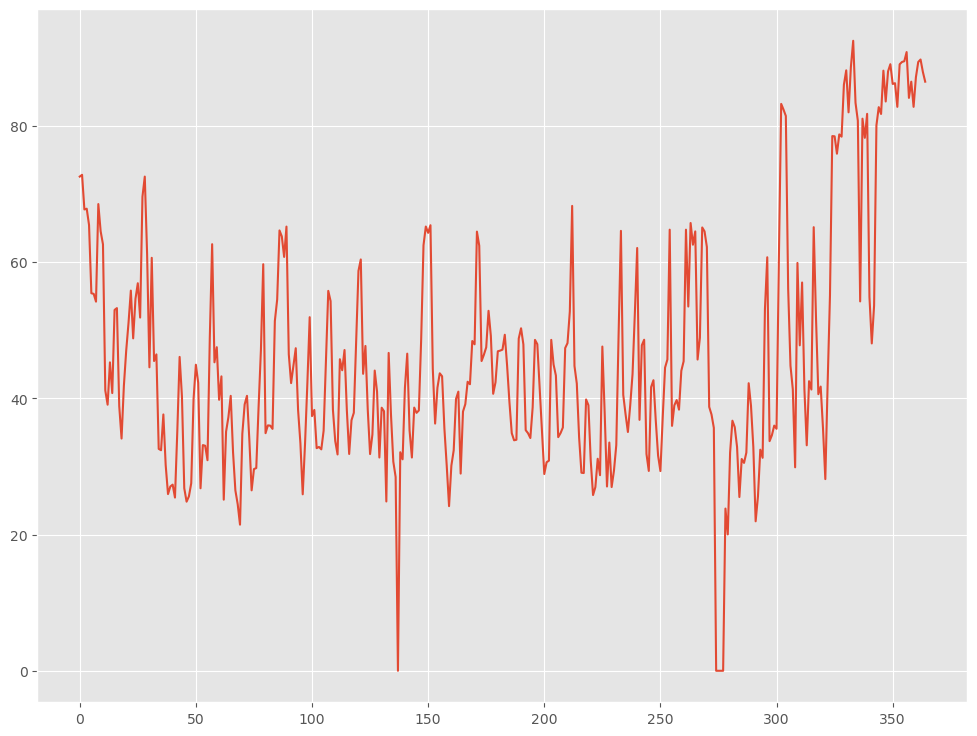

In [35]:
submit = pd.DataFrame({'datetime' : test_data.index, 'pred' : pred_lgb})

print(submit)

# 閉店時の予測値を0に置き換える
for i in test_data2[test_data2['close']==1].index:
    submit['pred'].iloc[i] = 0
    
# 予測値を描画
plt.plot(submit['pred'])

submit.columns = submit.iloc[0]
print(submit)
submit.to_csv('LGBM0909_1.csv', index=False)